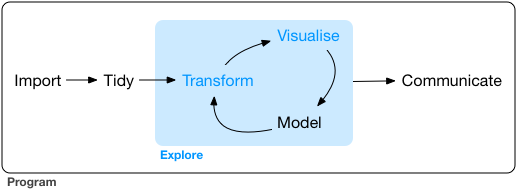

3 Data visualisation

3.1 Introduction

“The simple graph has brought more information to the data analyst’s mind than any other device.” — John Tukey

This chapter will teach you how to visualise your data using ggplot2. R has several systems for making graphs, but ggplot2 is one of the most elegant and most versatile. ggplot2 implements the grammar of graphics, a coherent system for describing and building graphs. With ggplot2, you can do more faster by learning one system and applying it in many places.

If you’d like to learn more about the theoretical underpinnings of ggplot2 before you start, I’d recommend reading “The Layered Grammar of Graphics”, http://vita.had.co.nz/papers/layered-grammar.pdf.

3.1.1 Prerequisites

This chapter focusses on ggplot2, one of the core members of the tidyverse. To access the datasets, help pages, and functions that we will use in this chapter, load the tidyverse by running this code:

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [9]:
mpg

manufacturer model              displ year cyl trans      drv cty hwy fl 
1   audi         a4                 1.8   1999 4   auto(l5)   f   18  29  p  
2   audi         a4                 1.8   1999 4   manual(m5) f   21  29  p  
3   audi         a4                 2.0   2008 4   manual(m6) f   20  31  p  
4   audi         a4                 2.0   2008 4   auto(av)   f   21  30  p  
5   audi         a4                 2.8   1999 6   auto(l5)   f   16  26  p  
6   audi         a4                 2.8   1999 6   manual(m5) f   18  26  p  
7   audi         a4                 3.1   2008 6   auto(av)   f   18  27  p  
8   audi         a4 quattro         1.8   1999 4   manual(m5) 4   18  26  p  
9   audi         a4 quattro         1.8   1999 4   auto(l5)   4   16  25  p  
10  audi         a4 quattro         2.0   2008 4   manual(m6) 4   20  28  p  
11  audi         a4 quattro         2.0   2008 4   auto(s6)   4   19  27  p  
12  audi         a4 quattro         2.8   1999 6   auto(l5)   4   15  25  p  
13  audi         a4 quattro         2.8   1999 6   manual(m5) 4   17  25  p  
14  audi         a4 quattro         3.1   2008 6   auto(s6)   4   17  25  p  
15  audi         a4 quattro         3.1   2008 6   manual(m6) 4   15  25  p  
16  audi         a6 quattro         2.8   1999 6   auto(l5)   4   15  24  p  
17  audi         a6 quattro         3.1   2008 6   auto(s6)   4   17  25  p  
18  audi         a6 quattro         4.2   2008 8   auto(s6)   4   16  23  p  
19  chevrolet    c1500 suburban 2wd 5.3   2008 8   auto(l4)   r   14  20  r  
20  chevrolet    c1500 suburban 2wd 5.3   2008 8   auto(l4)   r   11  15  e  
21  chevrolet    c1500 suburban 2wd 5.3   2008 8   auto(l4)   r   14  20  r  
22  chevrolet    c1500 suburban 2wd 5.7   1999 8   auto(l4)   r   13  17  r  
23  chevrolet    c1500 suburban 2wd 6.0   2008 8   auto(l4)   r   12  17  r  
24  chevrolet    corvette           5.7   1999 8   manual(m6) r   16  26  p  
25  chevrolet    corvette           5.7   1999 8   auto(l4)   r   15  23  p  
26  chevrolet    corvette           6.2   2008 8   manual(m6) r   16  26  p  
27  chevrolet    corvette           6.2   2008 8   auto(s6)   r   15  25  p  
28  chevrolet    corvette           7.0   2008 8   manual(m6) r   15  24  p  
29  chevrolet    k1500 tahoe 4wd    5.3   2008 8   auto(l4)   4   14  19  r  
30  chevrolet    k1500 tahoe 4wd    5.3   2008 8   auto(l4)   4   11  14  e  
... ...          ...                ...   ...  ... ...        ... ... ... ...
205 toyota       toyota tacoma 4wd  3.4   1999 6   auto(l4)   4   15  19  r  
206 toyota       toyota tacoma 4wd  4.0   2008 6   manual(m6) 4   15  18  r  
207 toyota       toyota tacoma 4wd  4.0   2008 6   auto(l5)   4   16  20  r  
208 volkswagen   gti                2.0   1999 4   manual(m5) f   21  29  r  
209 volkswagen   gti                2.0   1999 4   auto(l4)   f   19  26  r  
210 volkswagen   gti                2.0   2008 4   manual(m6) f   21  29  p  
211 volkswagen   gti                2.0   2008 4   auto(s6)   f   22  29  p  
212 volkswagen   gti                2.8   1999 6   manual(m5) f   17  24  r  
213 volkswagen   jetta              1.9   1999 4   manual(m5) f   33  44  d  
214 volkswagen   jetta              2.0   1999 4   manual(m5) f   21  29  r  
215 volkswagen   jetta              2.0   1999 4   auto(l4)   f   19  26  r  
216 volkswagen   jetta              2.0   2008 4   auto(s6)   f   22  29  p  
217 volkswagen   jetta              2.0   2008 4   manual(m6) f   21  29  p  
218 volkswagen   jetta              2.5   2008 5   auto(s6)   f   21  29  r  
219 volkswagen   jetta              2.5   2008 5   manual(m5) f   21  29  r  
220 volkswagen   jetta              2.8   1999 6   auto(l4)   f   16  23  r  
221 volkswagen   jetta              2.8   1999 6   manual(m5) f   17  24  r  
222 volkswagen   new beetle         1.9   1999 4   manual(m5) f   35  44  d  
223 volkswagen   new beetle         1.9   1999 4   auto(l4)   f   29  41  d  
224 volkswagen   new beetl

In [10]:
?mpg

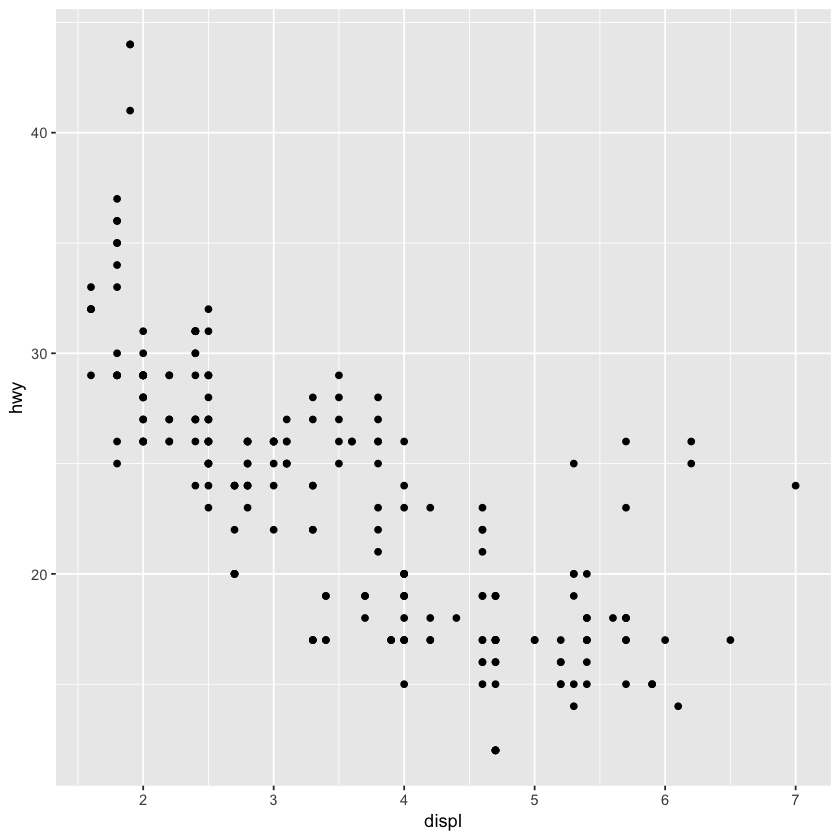

In [14]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy))

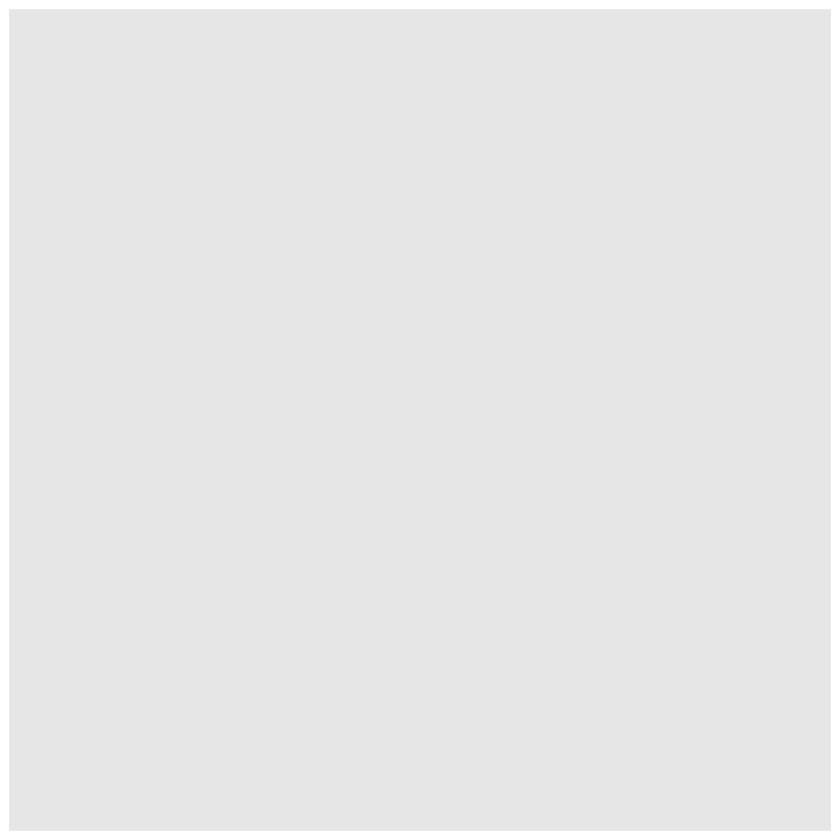

In [15]:
ggplot(data = mpg)

In [17]:
?mpg

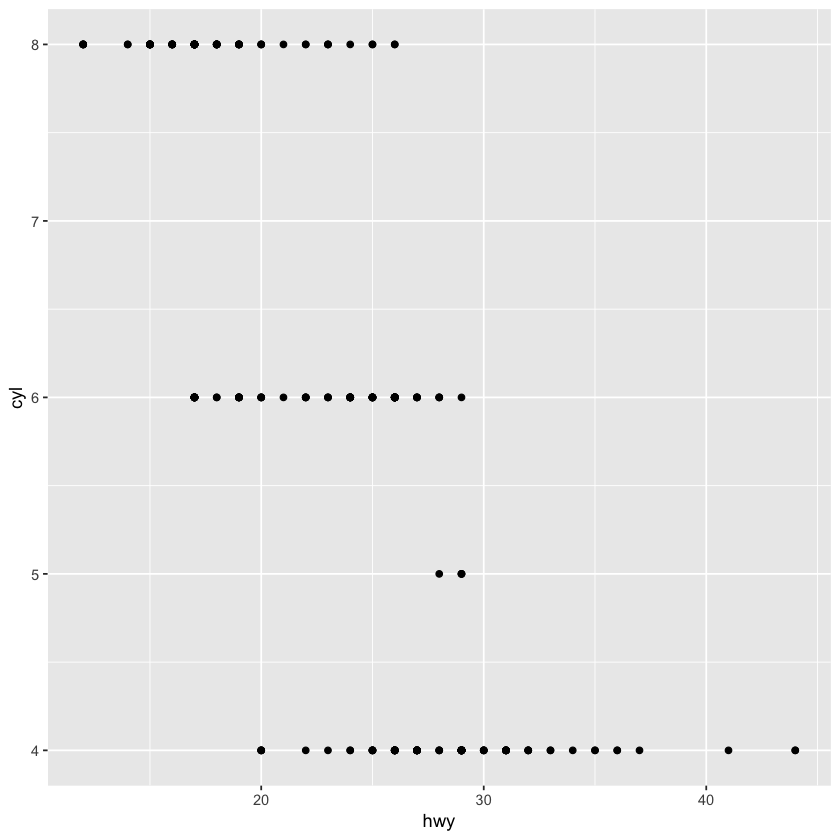

In [18]:
ggplot(data = mpg) + geom_point(mapping = aes(x = hwy, y = cyl))

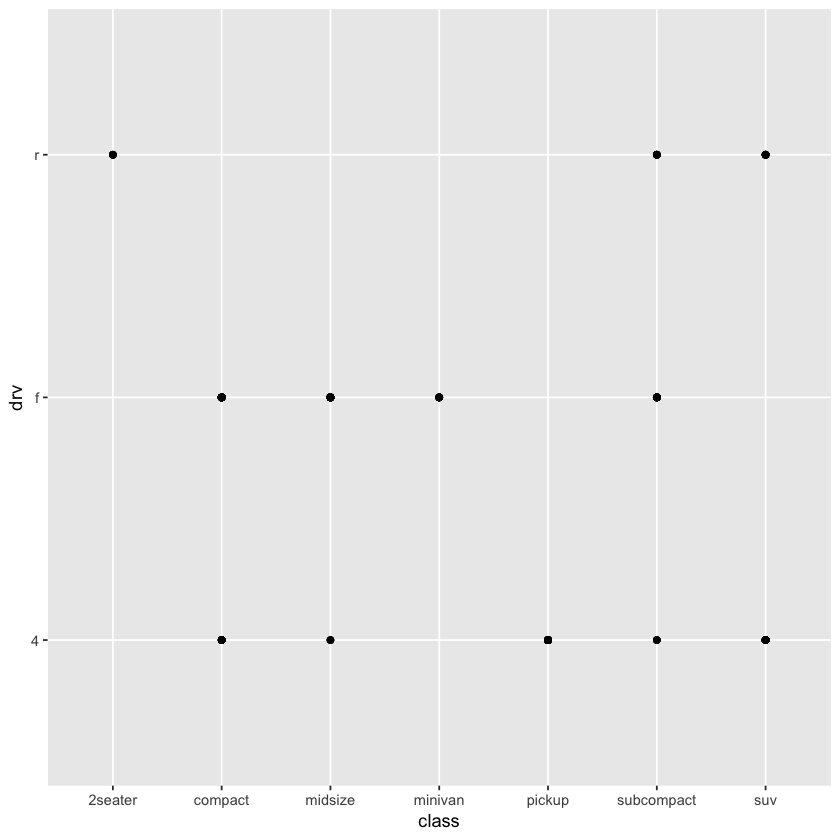

In [20]:
ggplot(data = mpg) + geom_point(mapping = aes(x = class, y = drv))

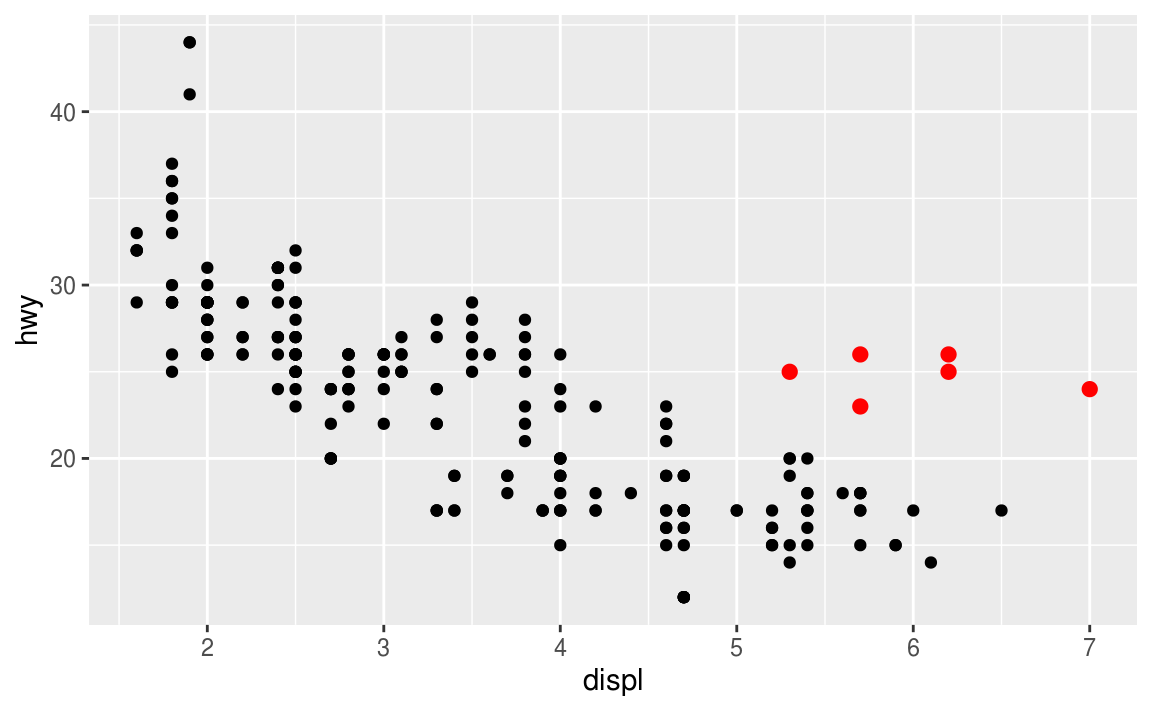

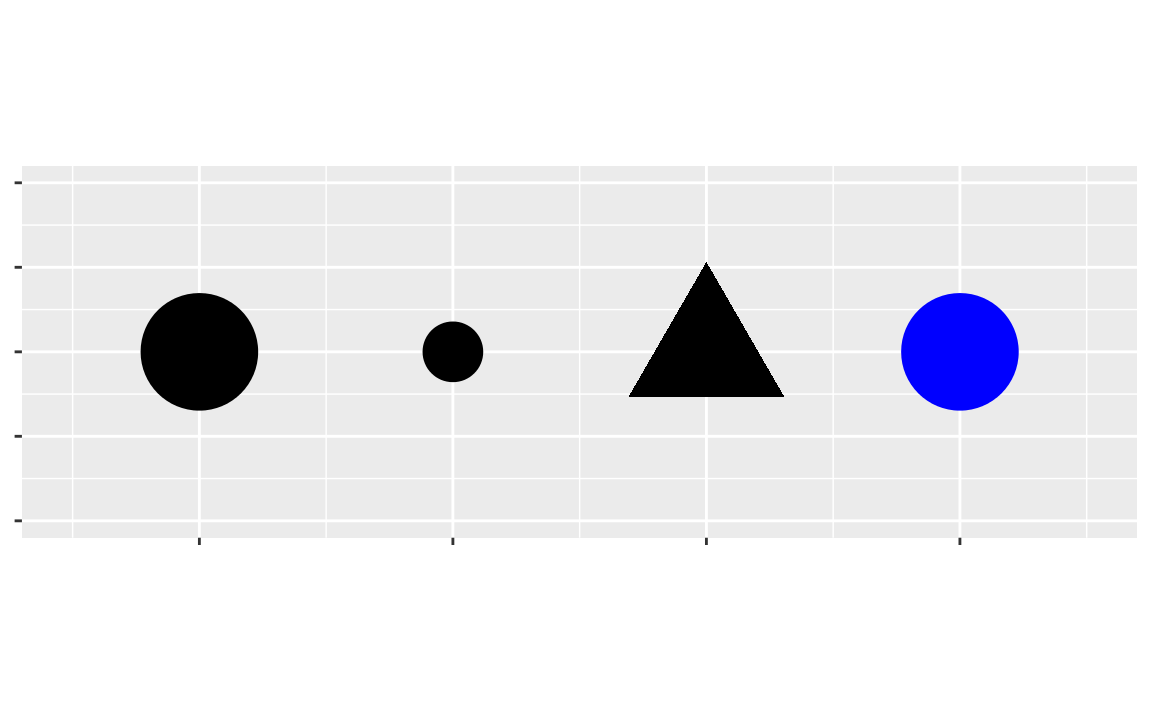

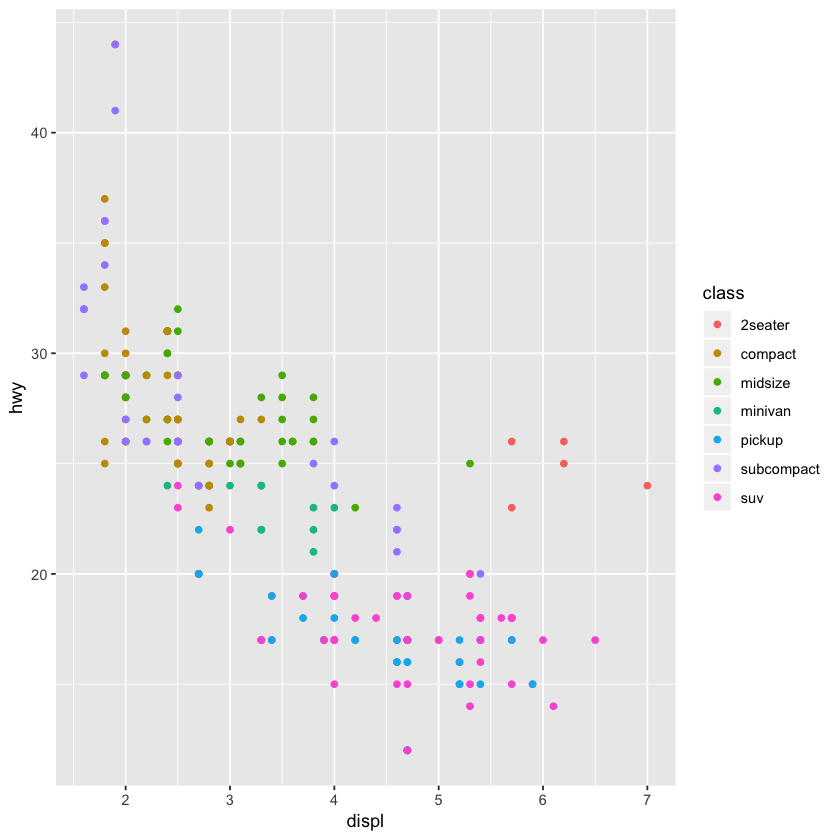

In [21]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

In [22]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = class))

Warning message:
“Using size for a discrete variable is not advised.”

Warning message:
“Using alpha for a discrete variable is not advised.”Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

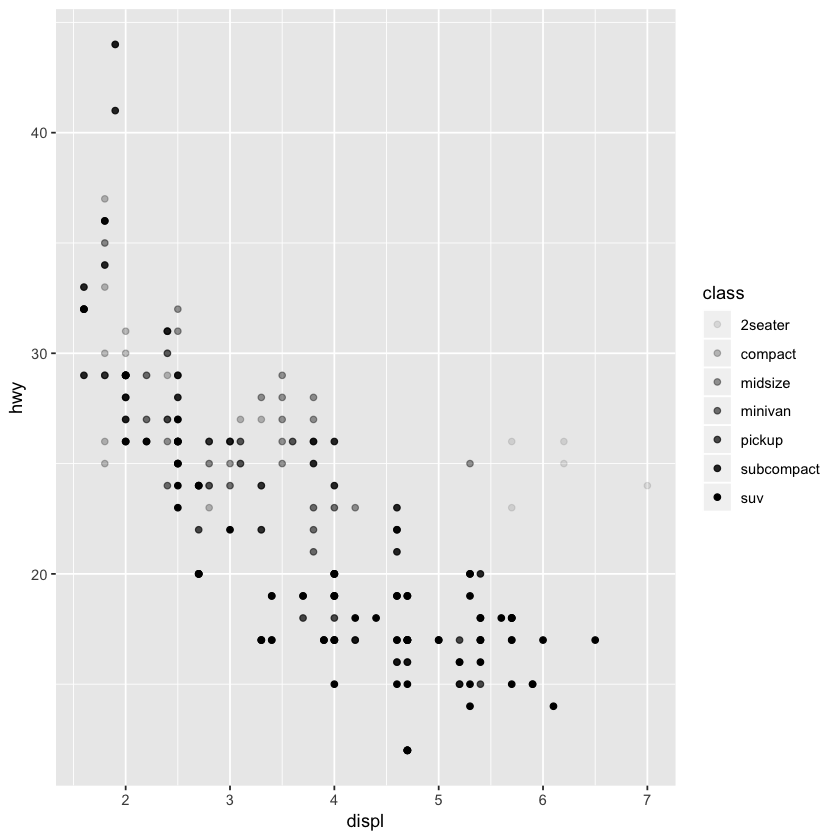

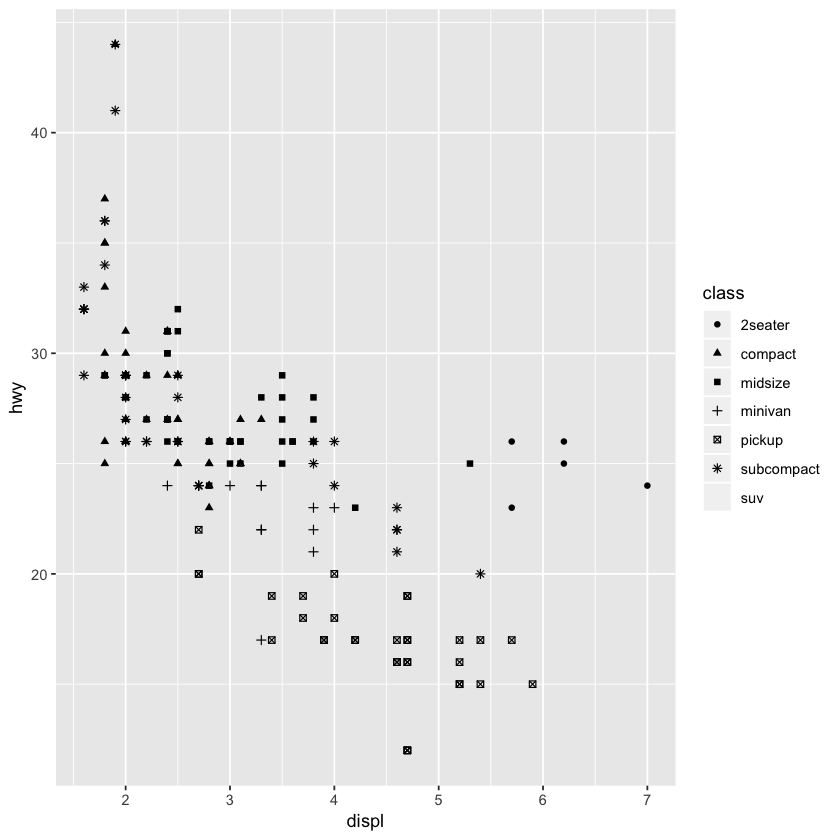

In [23]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

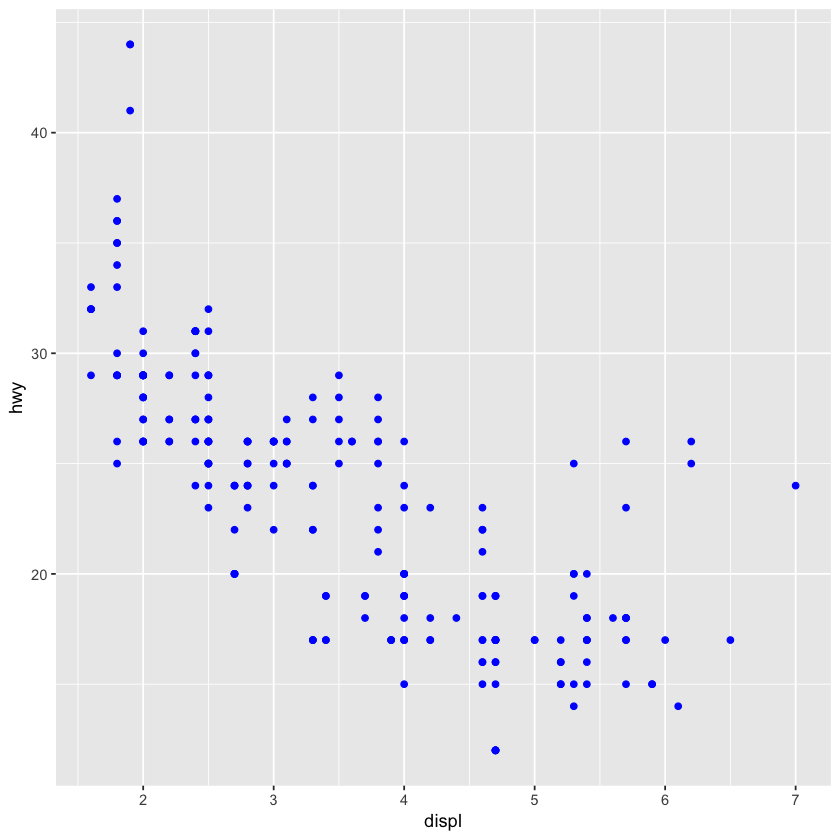

In [26]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy), color = 'blue')

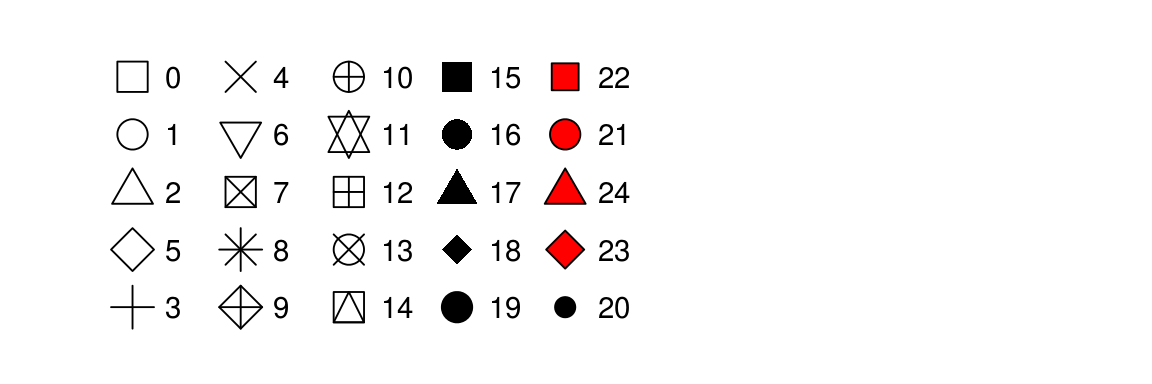

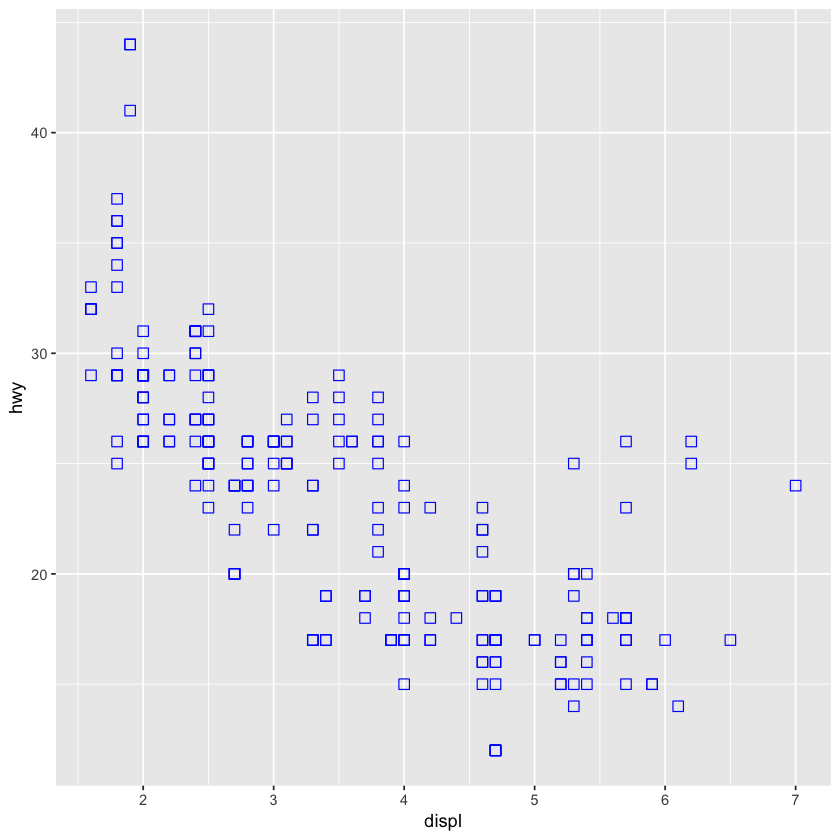

In [29]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy), color = 'blue', size = 3, shape = 22)

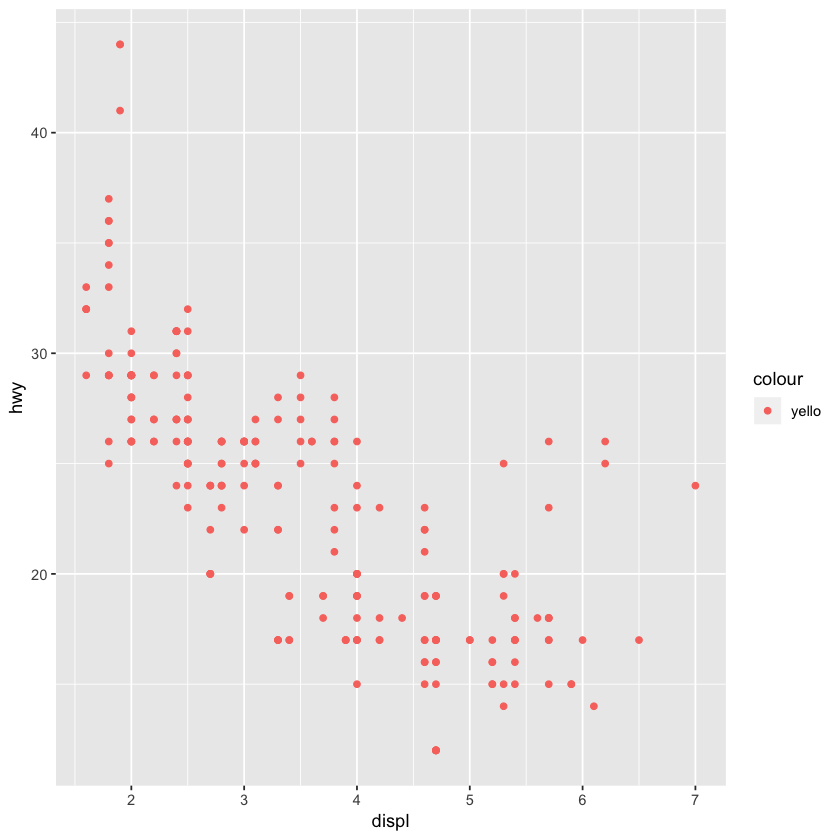

In [34]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))

In [35]:
?mpg

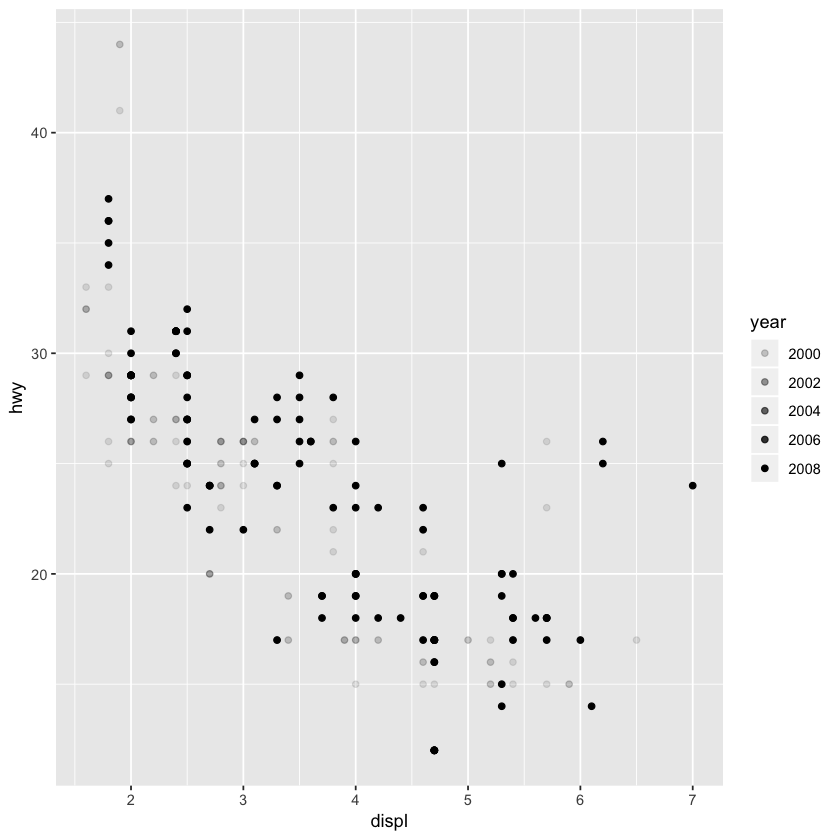

ERROR while rich displaying an object: Error: A continuous variable can not be mapped to shape

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. past

In [36]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = year))

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = year))

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = year))

Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

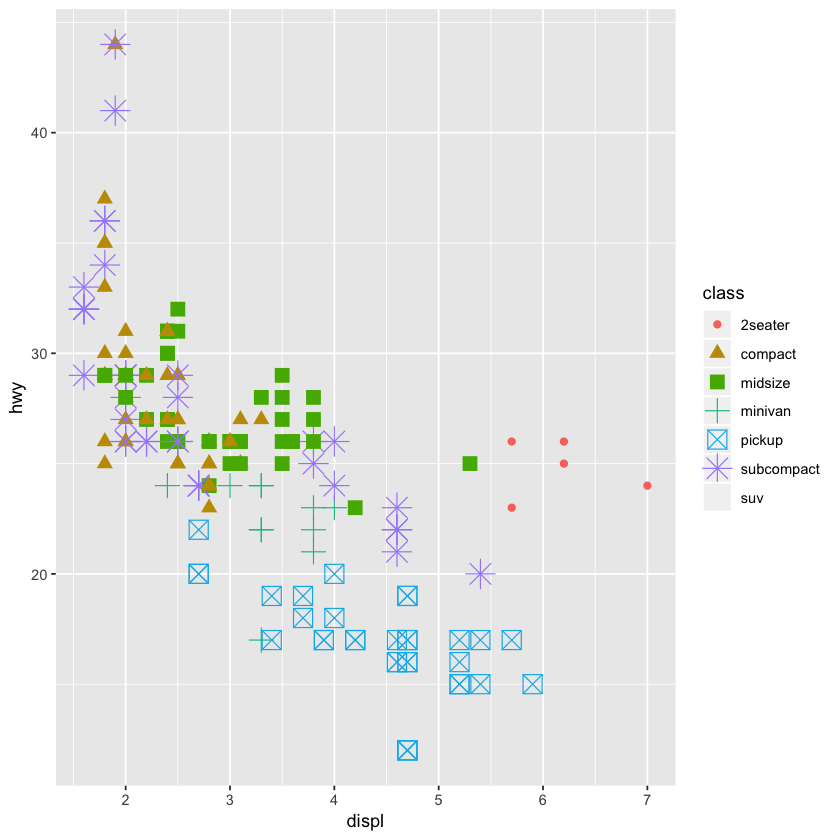

In [38]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class, color = class, size = class))

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

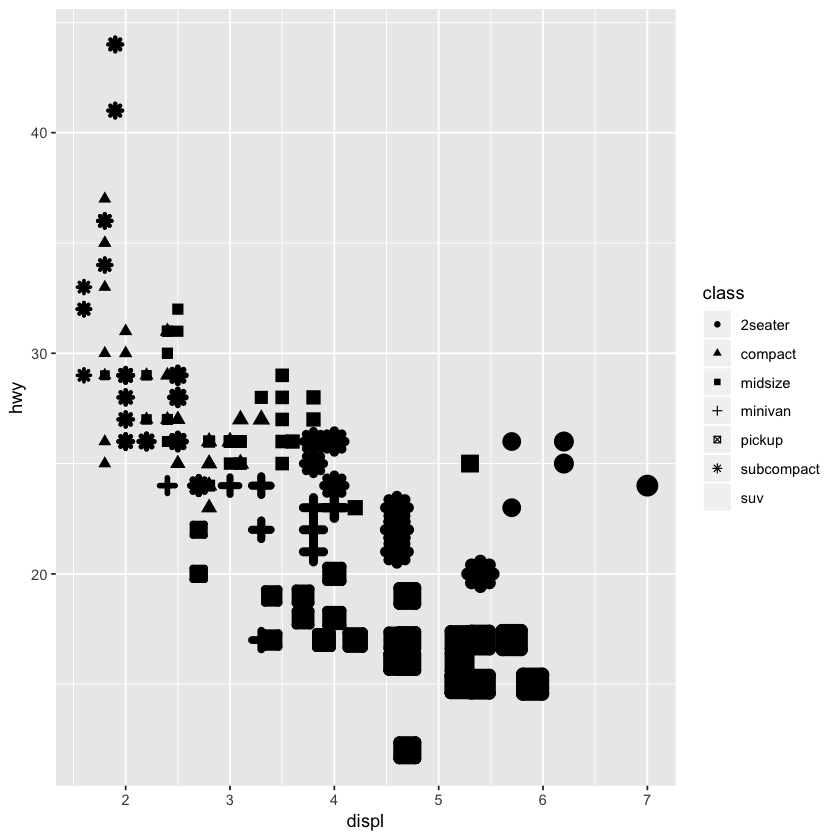

In [52]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class, stroke = displ))

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

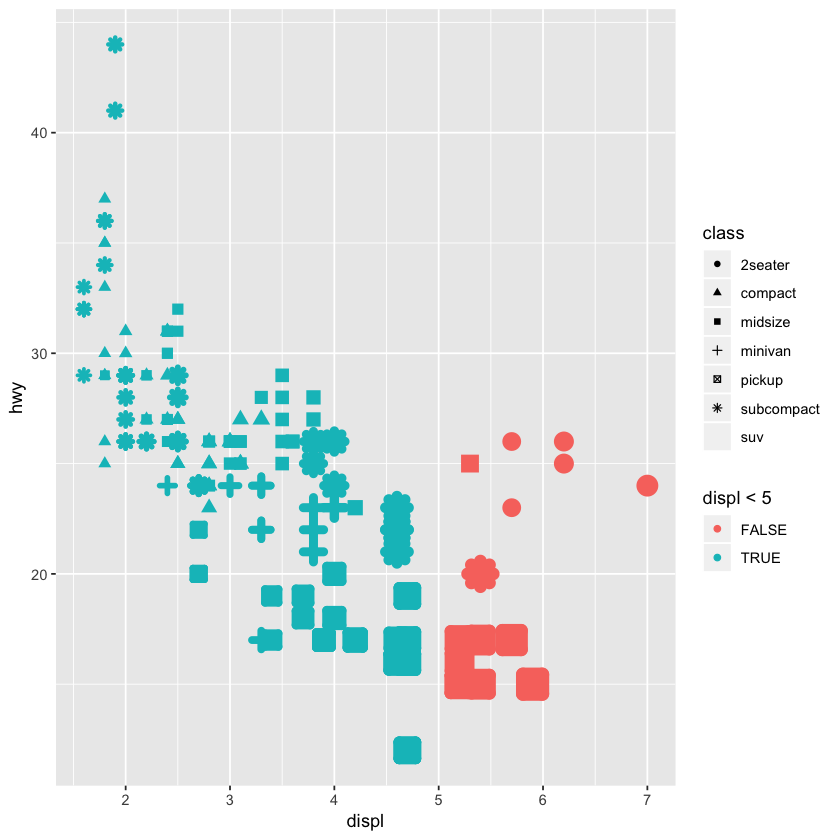

In [53]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class, stroke = displ, colour = displ < 5))

ERROR: Error: Cannot use `+.gg()` with a single argument. Did you accidentally put + on a new line?


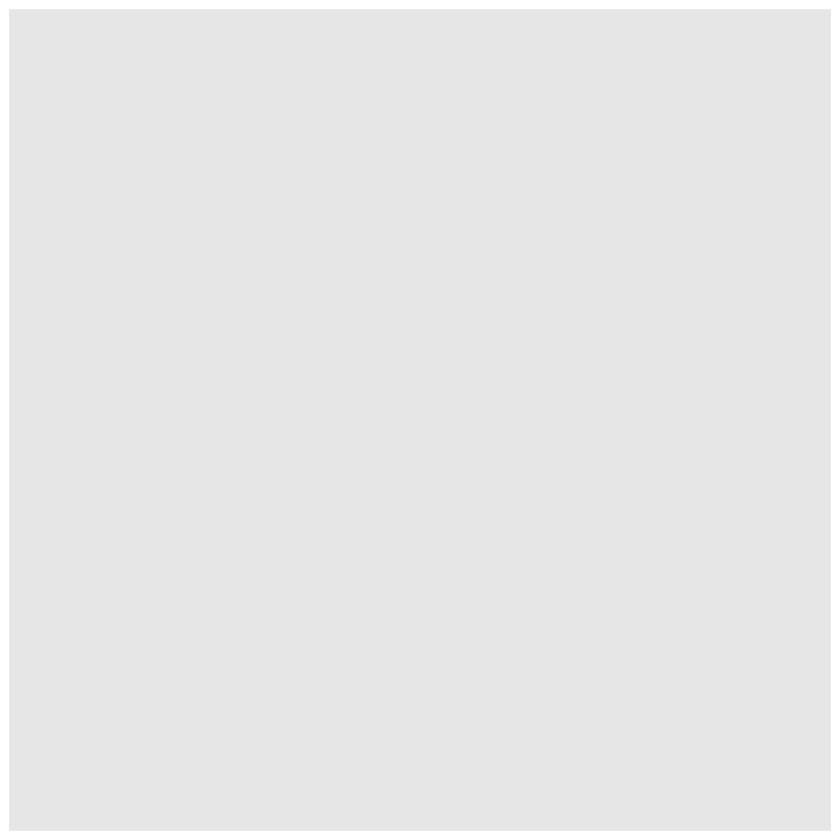

In [54]:
ggplot(data = mpg) 
+ geom_point(mapping = aes(x = displ, y = hwy))

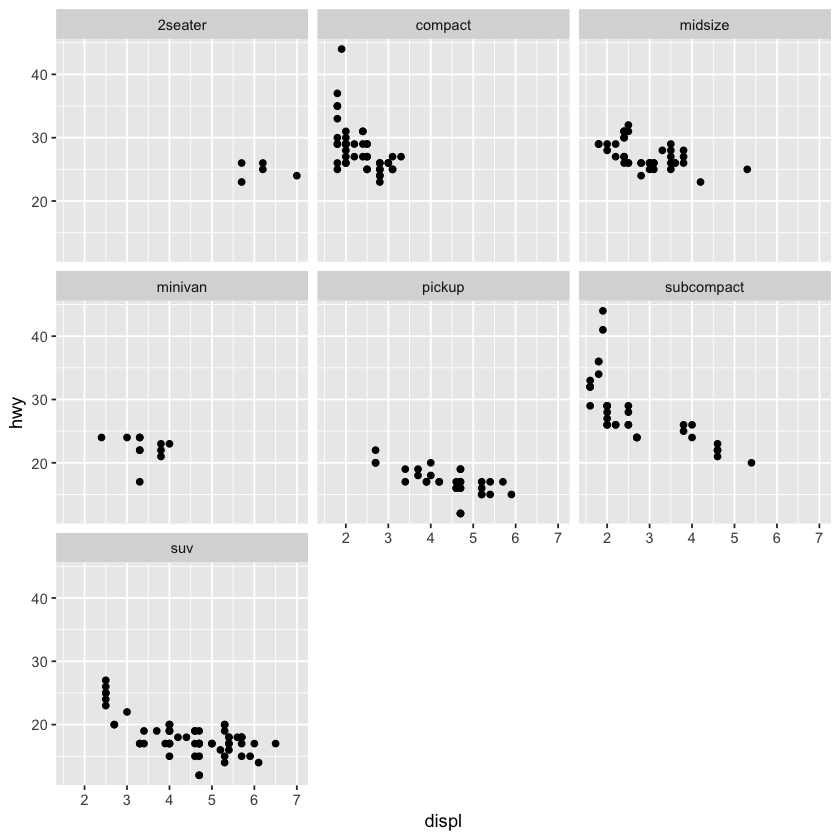

In [57]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 3)

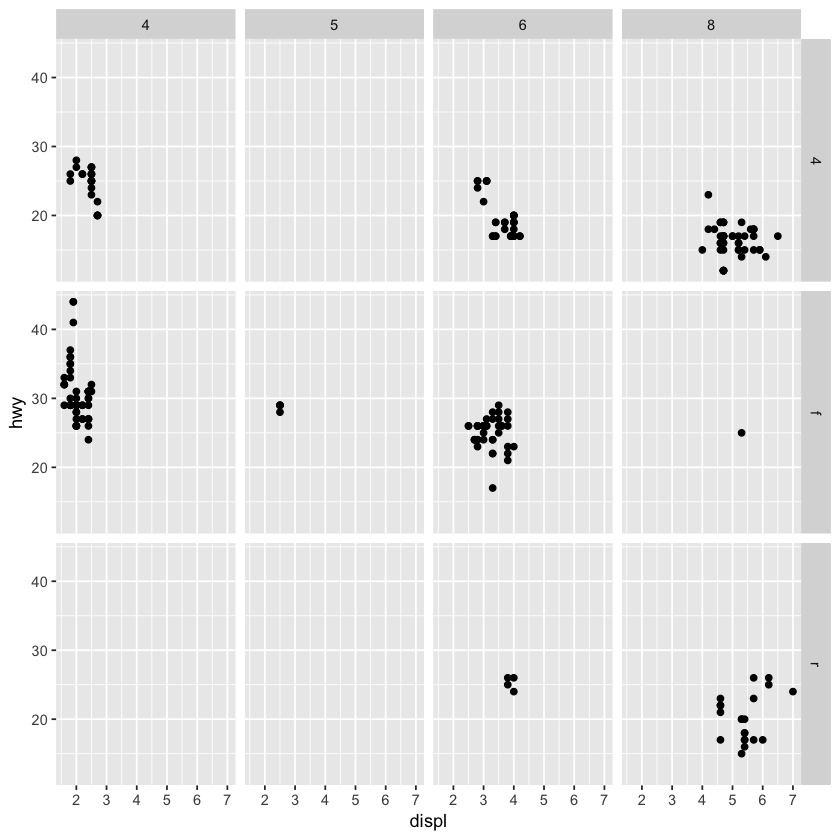

In [58]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)

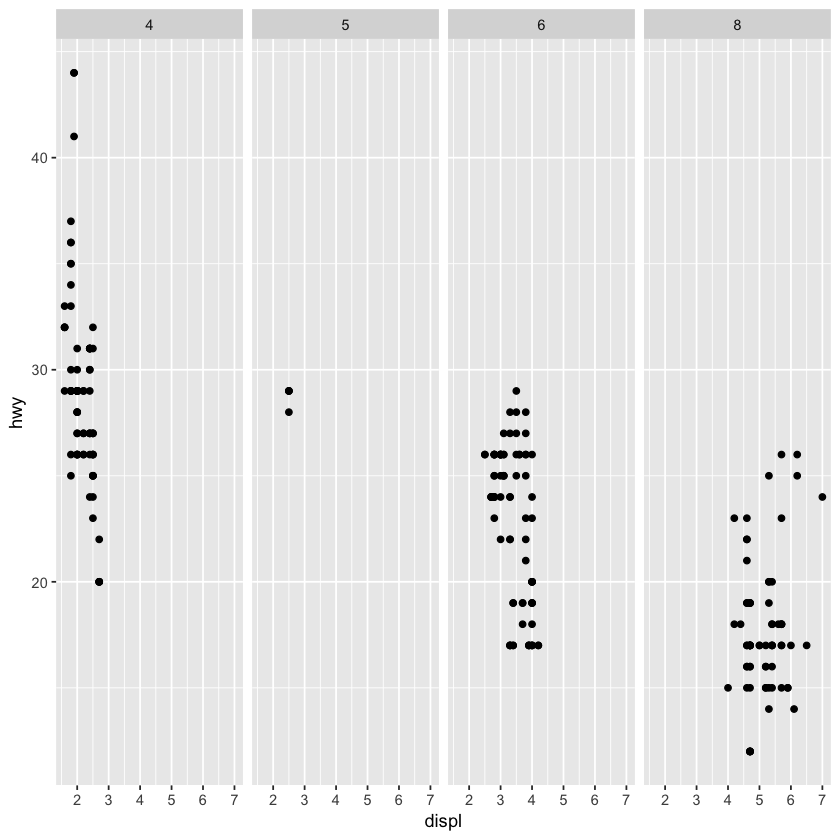

In [59]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(. ~ cyl)

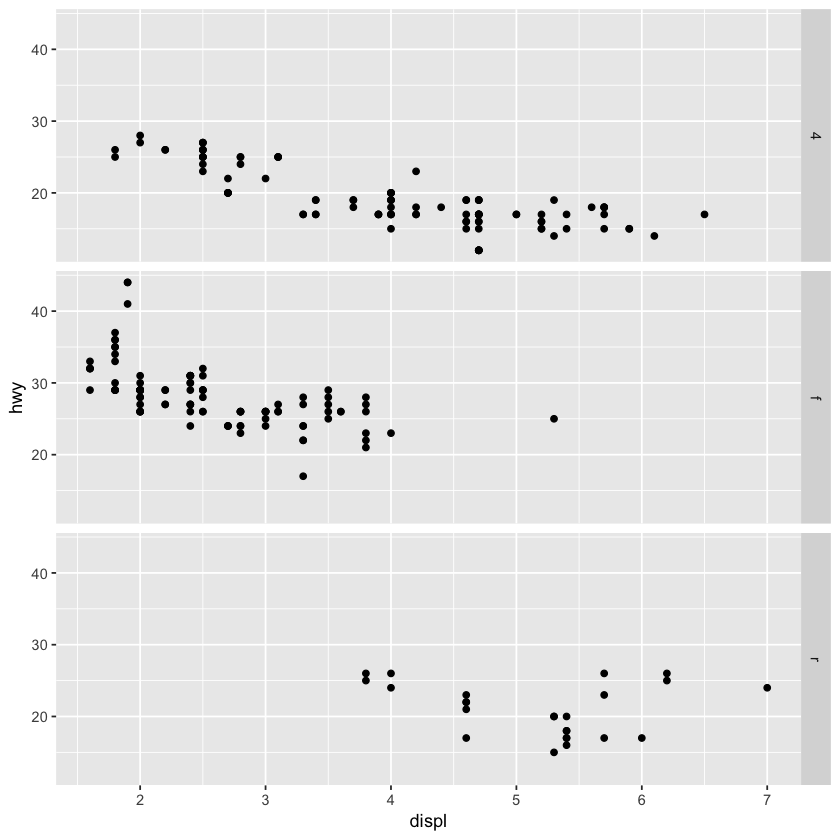

In [60]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ .)

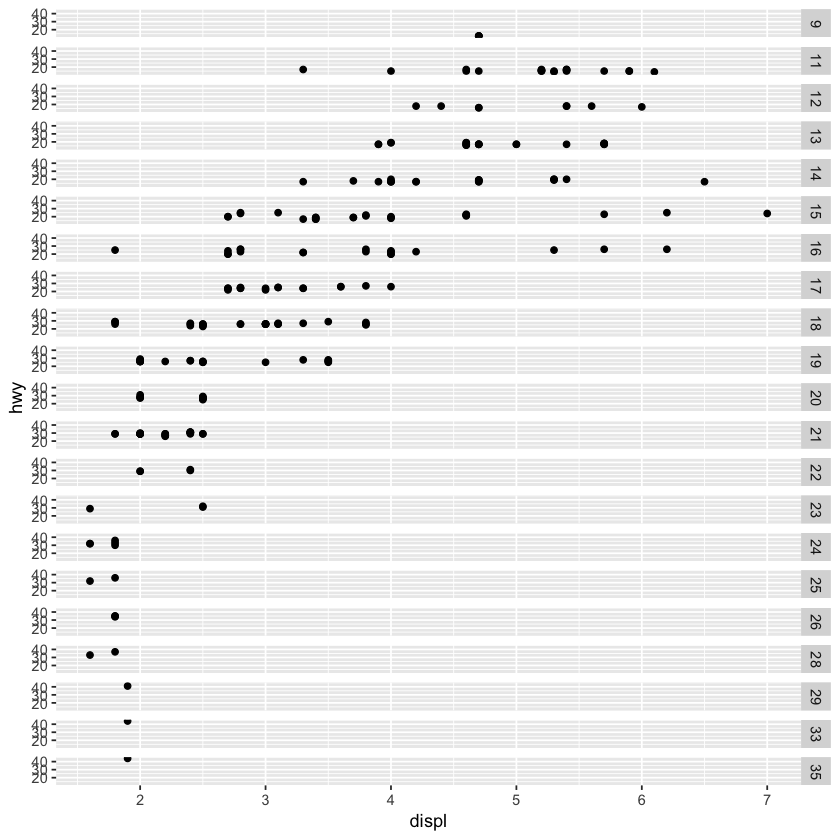

In [61]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(cty ~ .)

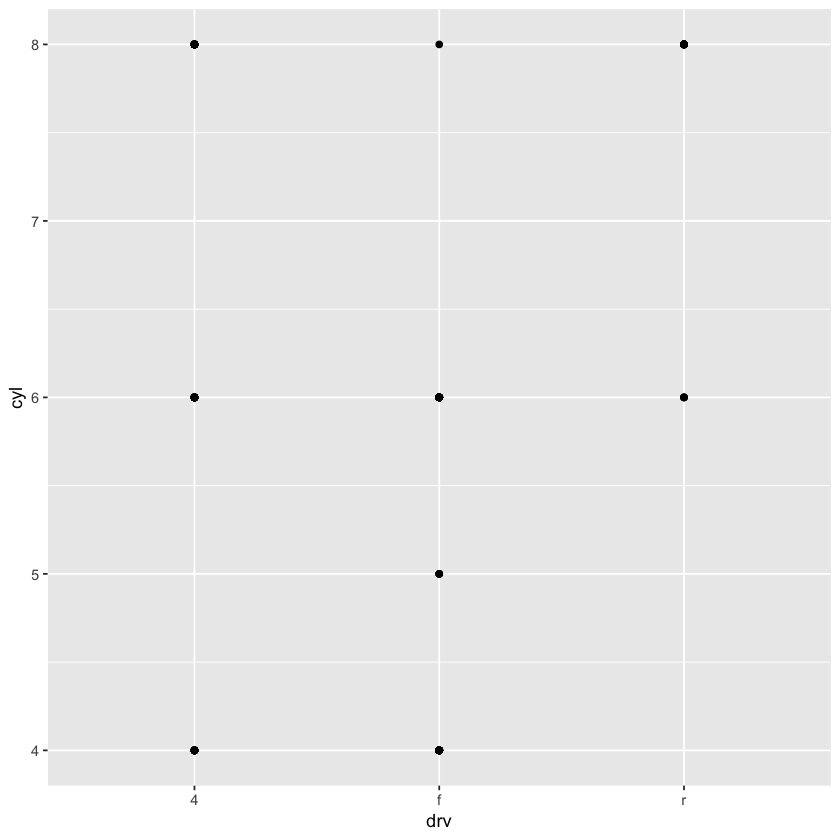

In [62]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = drv, y = cyl))

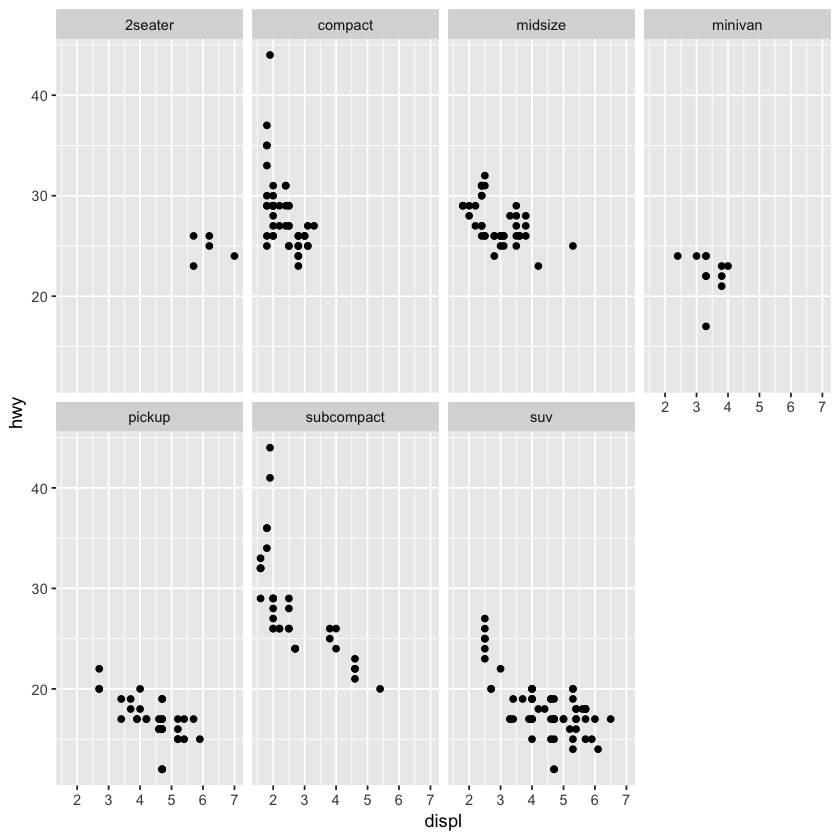

In [63]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)

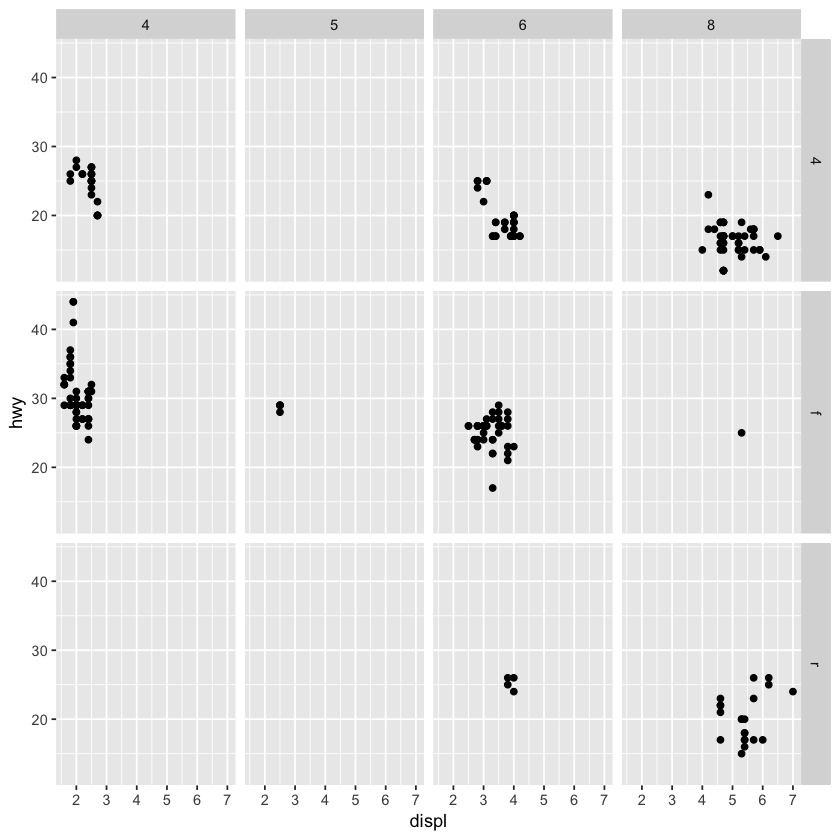

In [66]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)

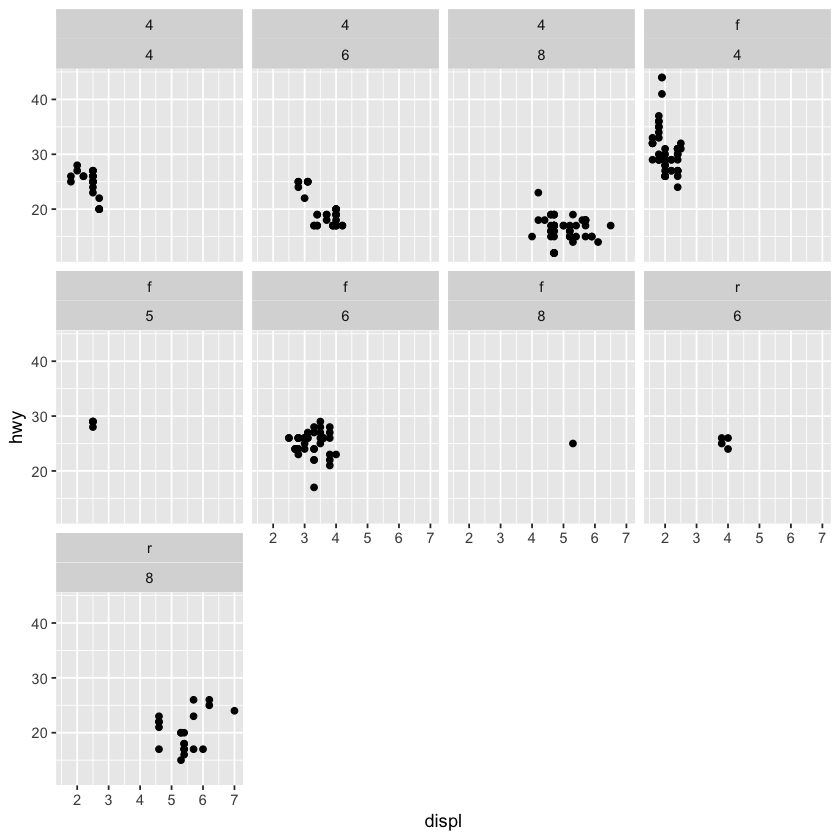

In [74]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(drv ~ cyl, nrow = 3, ncol = 4)

In [72]:
?facet_grid
?facet_wrap

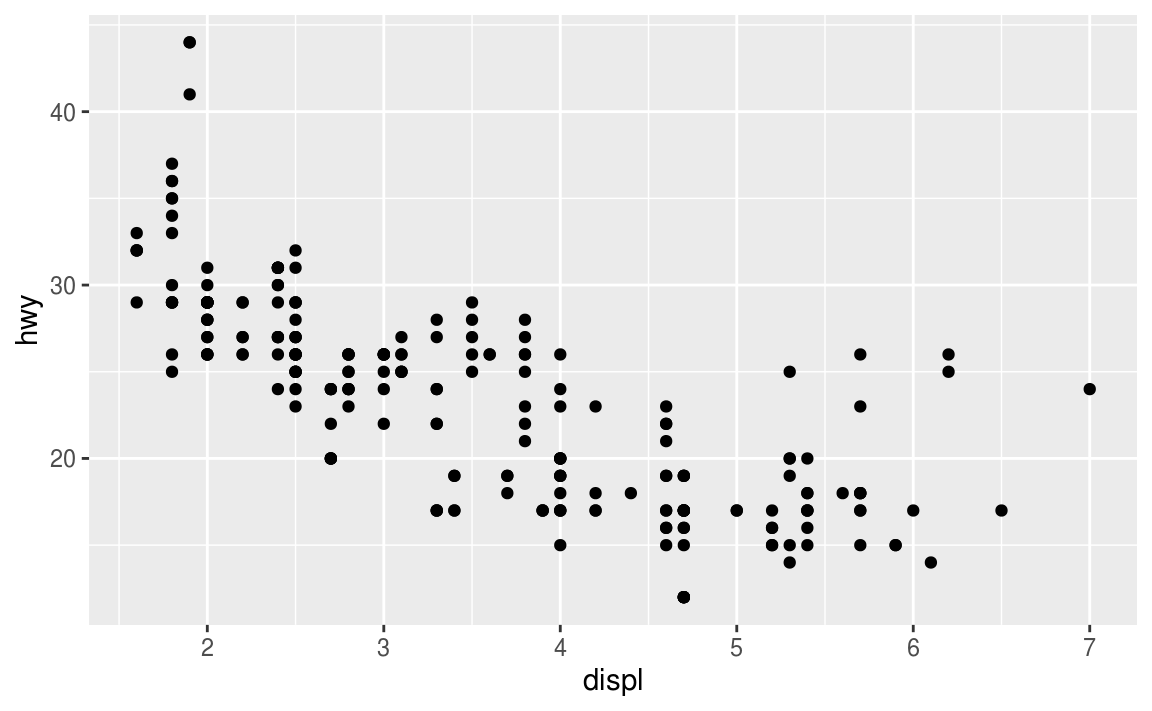
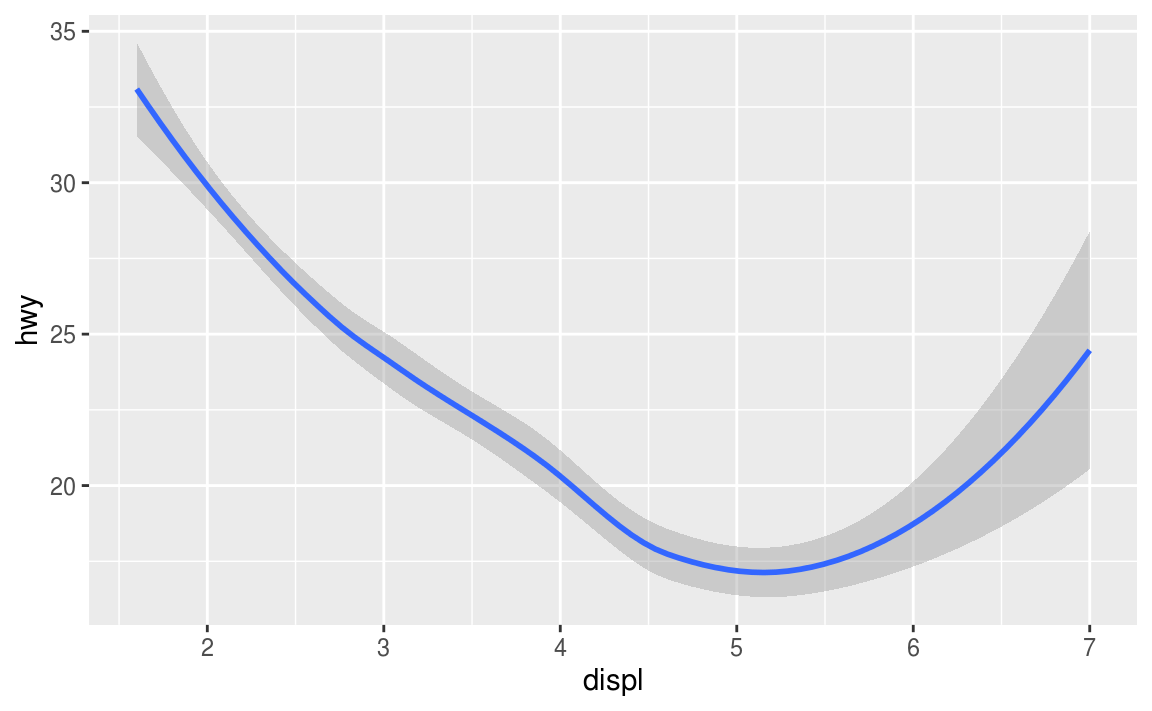

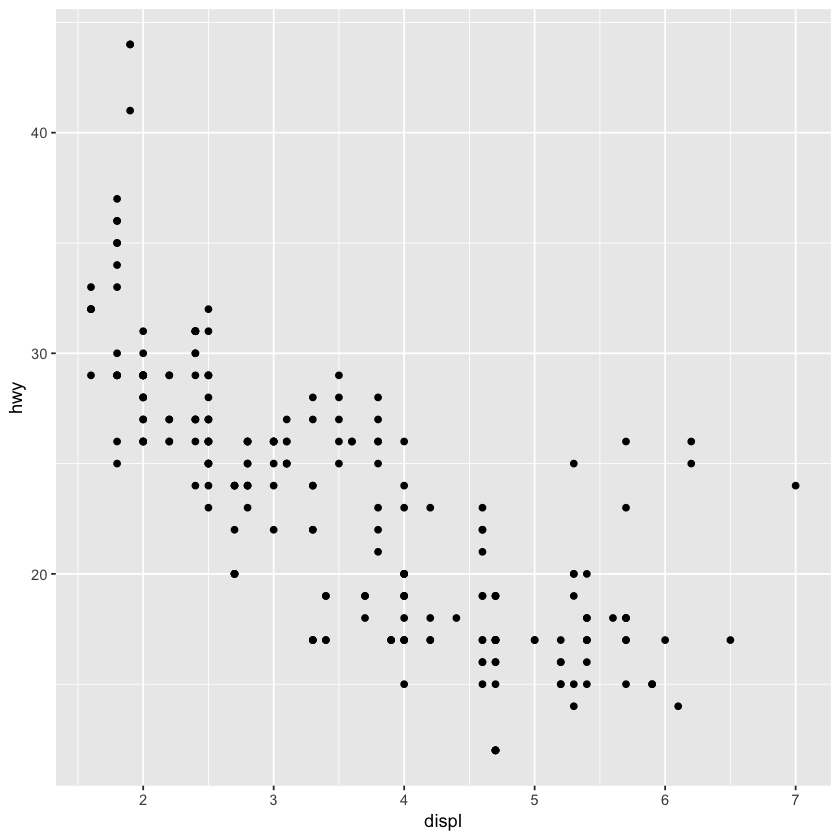

In [75]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


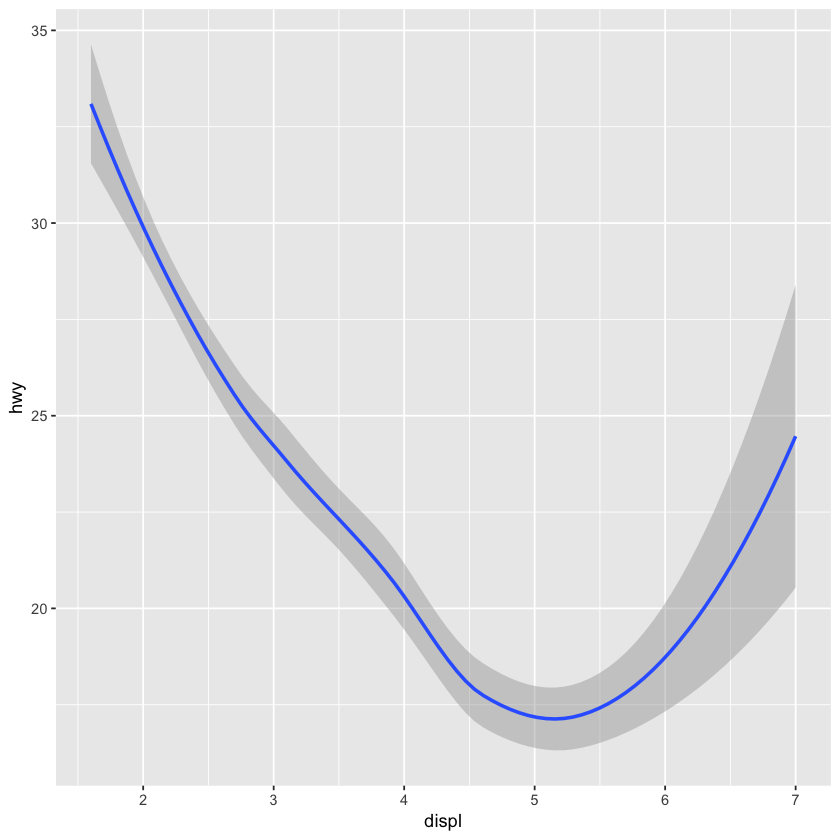

In [76]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


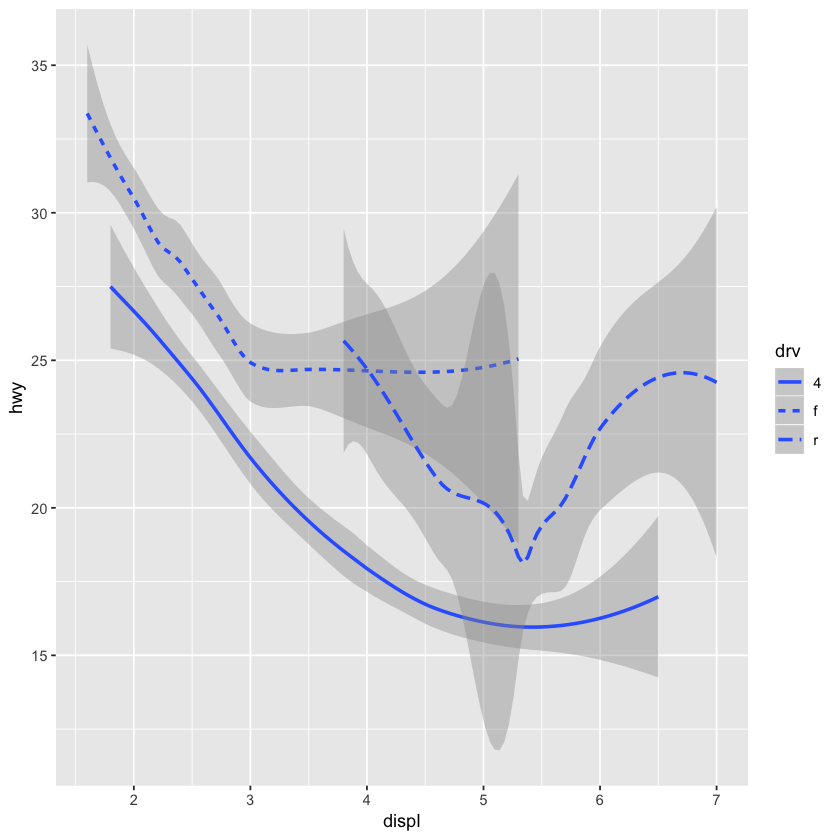

In [77]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


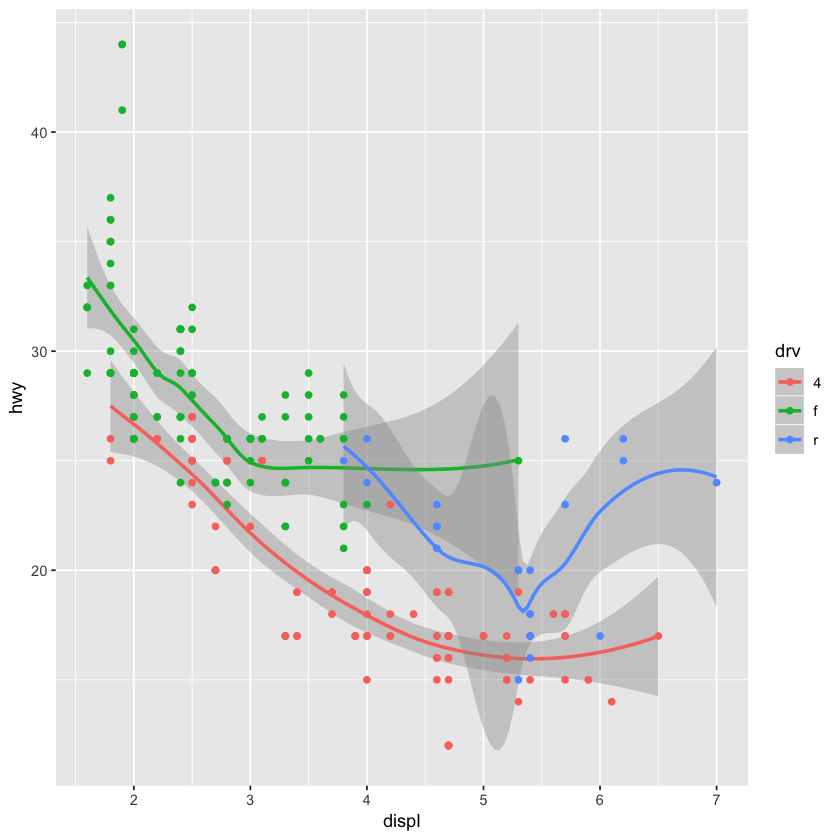

In [89]:
ggplot(data = mpg) + 
    geom_smooth(mapping = aes(x = displ, y = hwy, color = drv)) +
    geom_point(mapping = aes(x = displ, y = hwy, color = drv))

Notice that this plot contains two geoms in the same graph! If this makes you excited, buckle up. We will learn how to place multiple geoms in the same plot very soon.

ggplot2 provides over 30 geoms, and extension packages provide even more (see https://www.ggplot2-exts.org for a sampling). The best way to get a comprehensive overview is the ggplot2 cheatsheet, which you can find at http://rstudio.com/cheatsheets. To learn more about any single geom, use help: ?geom_smooth.

Many geoms, like geom_smooth(), use a single geometric object to display multiple rows of data. For these geoms, you can set the group aesthetic to a categorical variable to draw multiple objects. ggplot2 will draw a separate object for each unique value of the grouping variable. In practice, ggplot2 will automatically group the data for these geoms whenever you map an aesthetic to a discrete variable (as in the linetype example). It is convenient to rely on this feature because the group aesthetic by itself does not add a legend or distinguishing features to the geoms.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


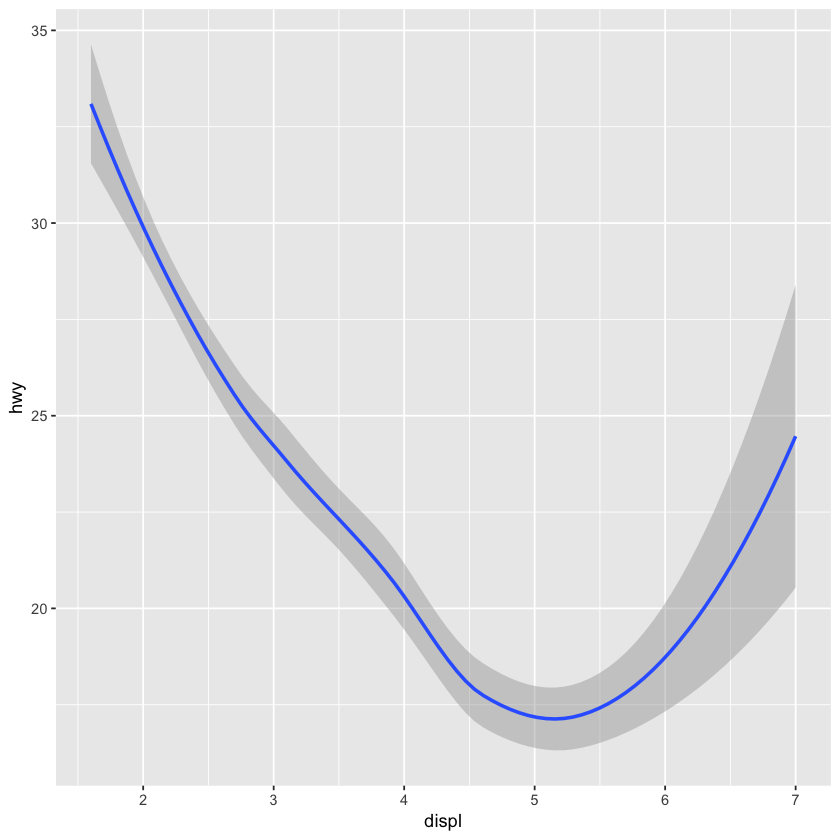

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


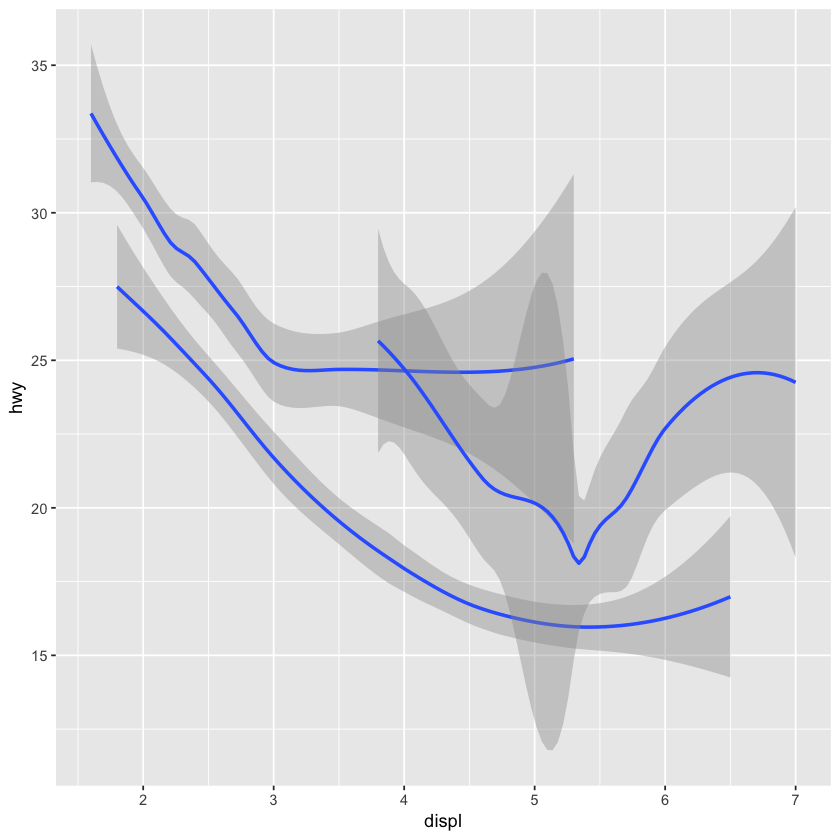

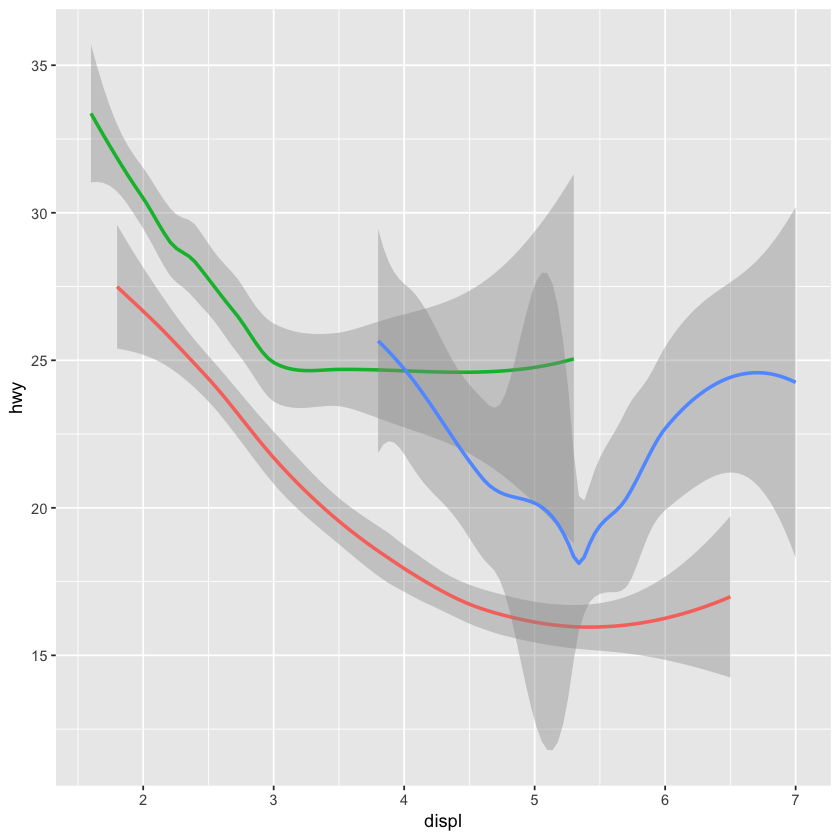

In [83]:
ggplot(data = mpg) + geom_smooth(mapping = aes(x = displ, y = hwy))
ggplot(data = mpg) + geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))
ggplot(data = mpg) + geom_smooth(mapping = aes(x = displ, y = hwy, color = drv), show.legend = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


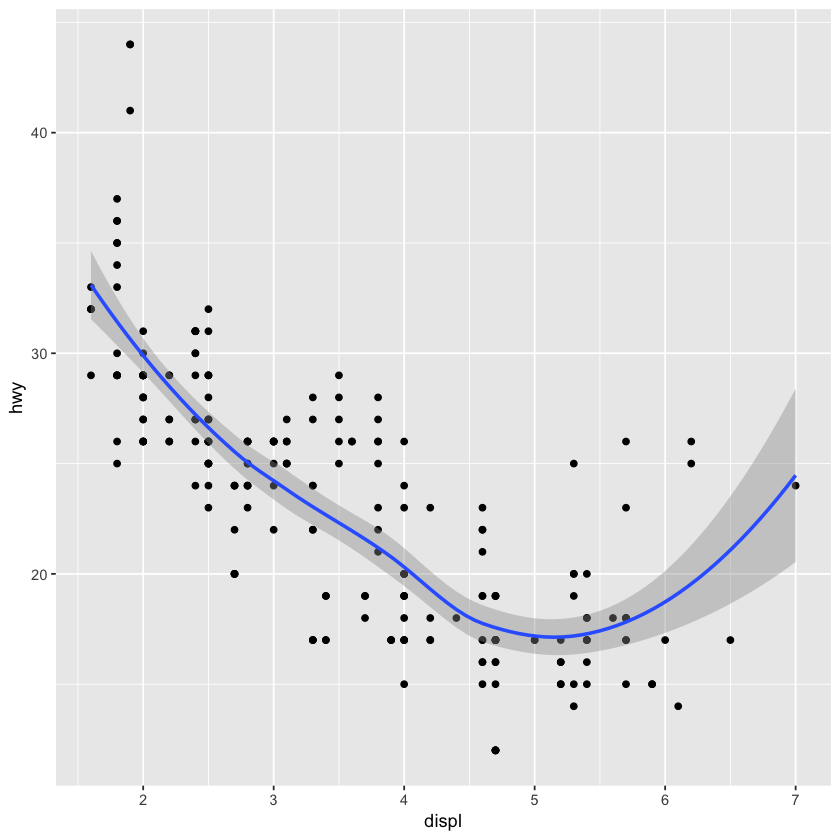

In [90]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


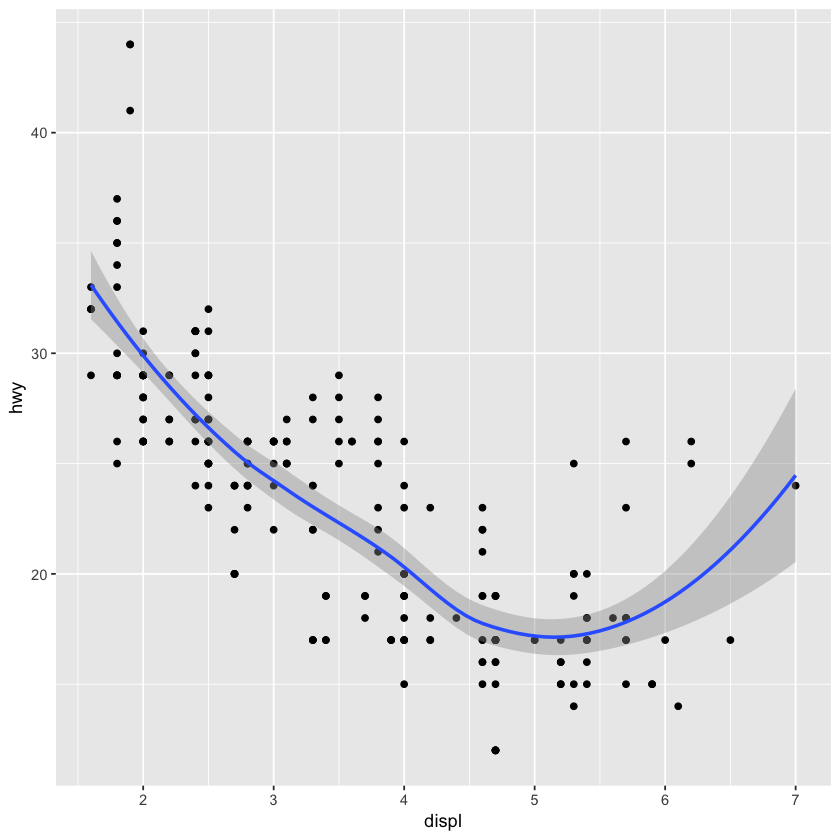

In [91]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


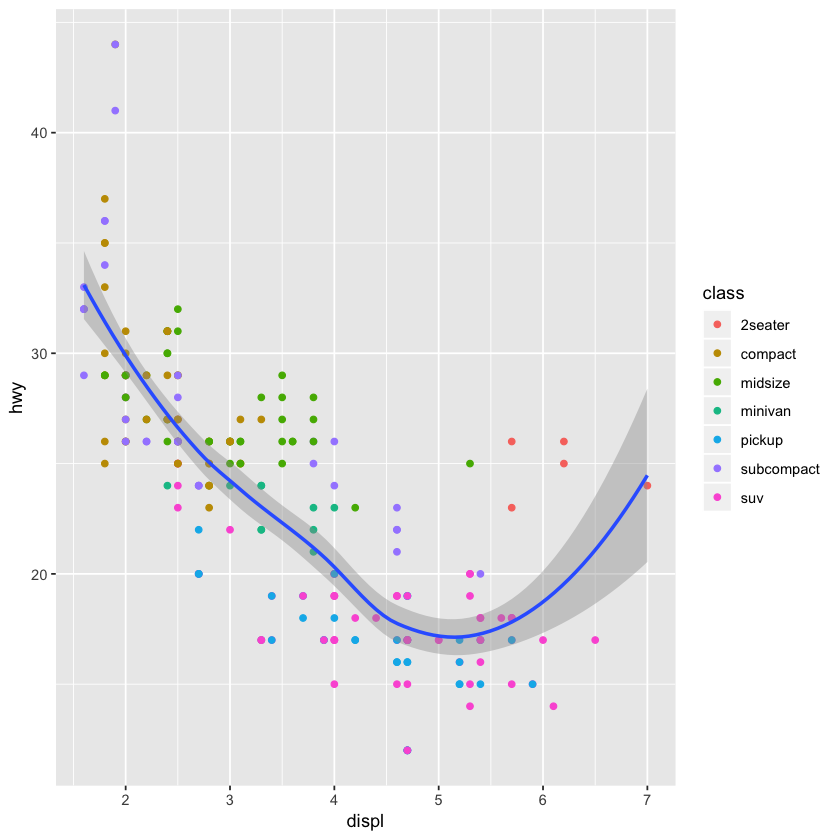

In [92]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


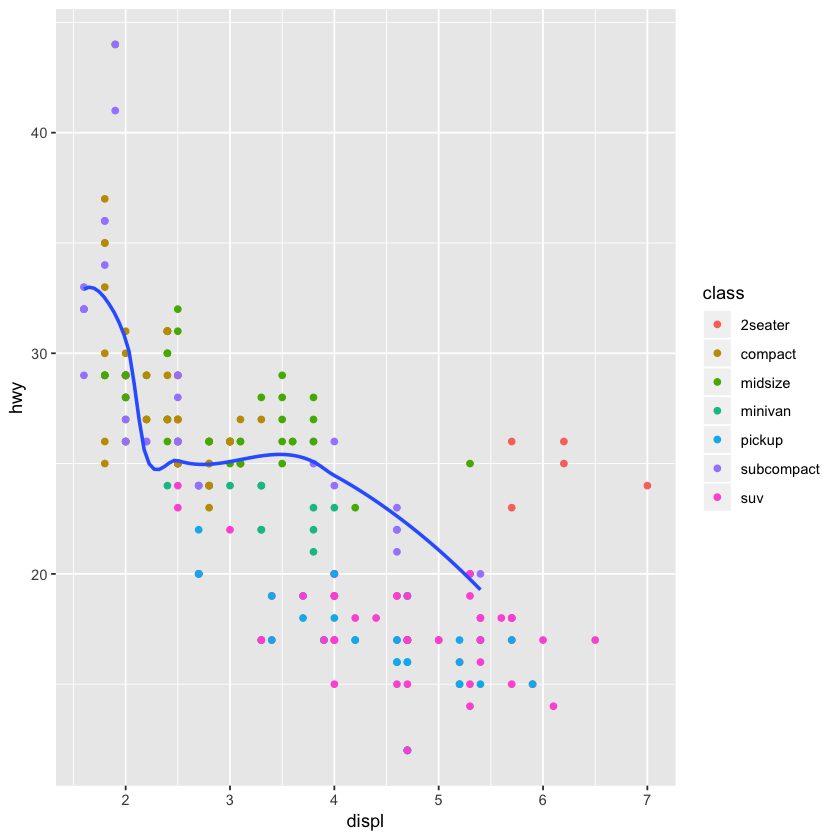

In [95]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth(data = filter(mpg, class == "subcompact"), se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


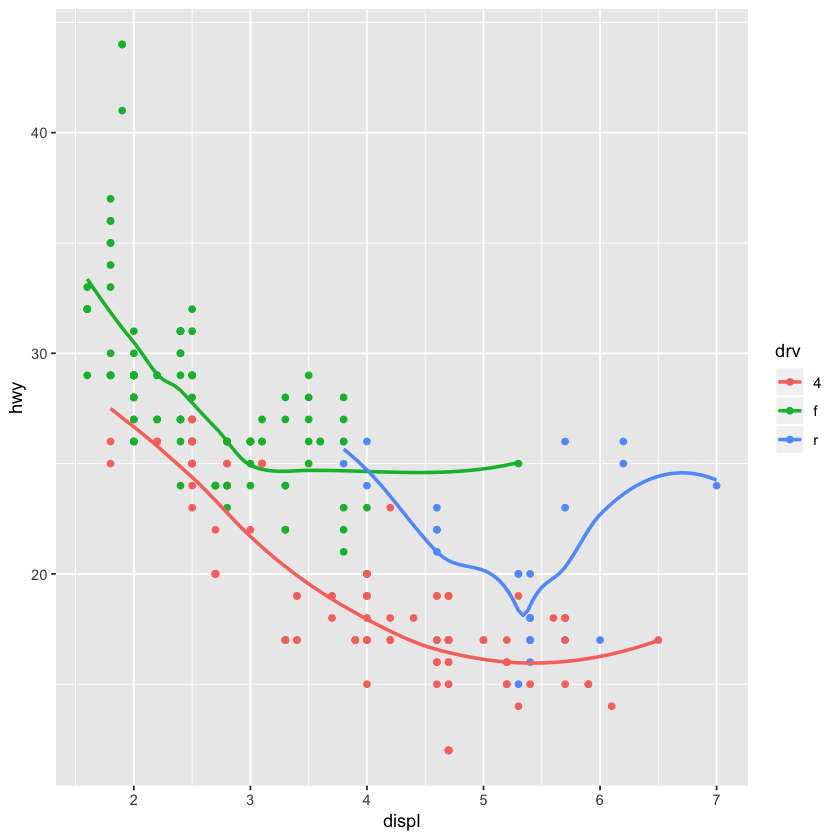

In [96]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) + 
  geom_point() + 
  geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


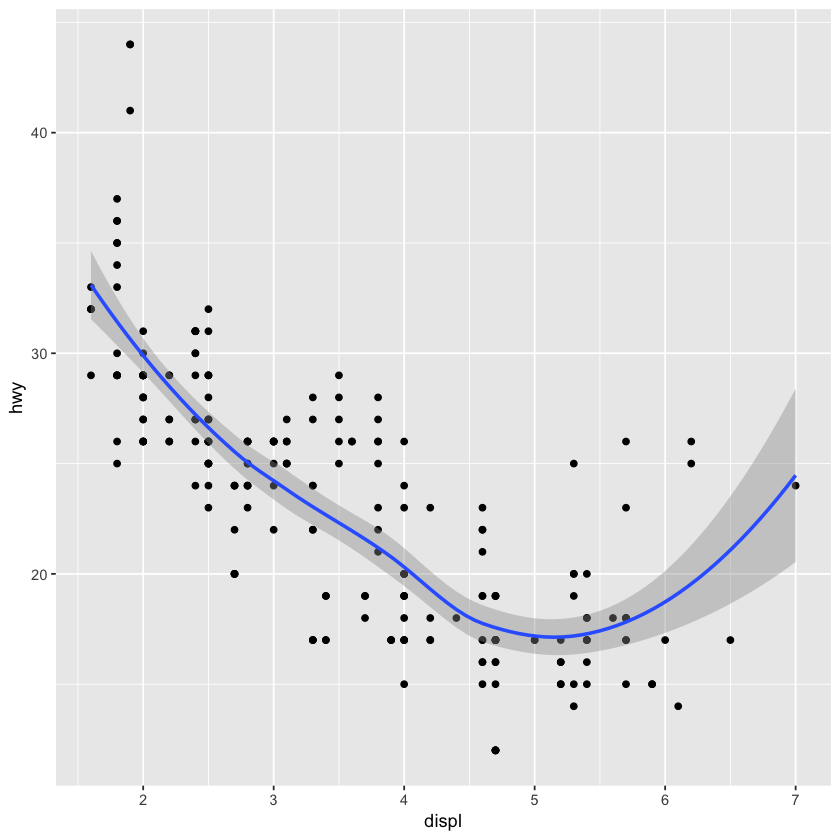

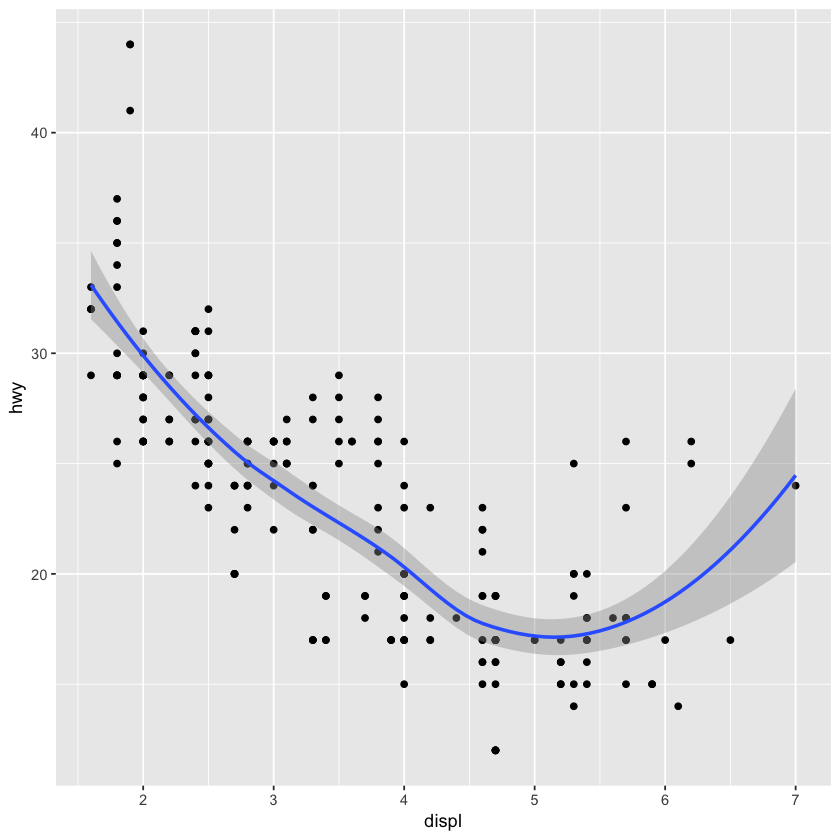

In [97]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_smooth()

ggplot() + 
  geom_point(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_smooth(data = mpg, mapping = aes(x = displ, y = hwy))


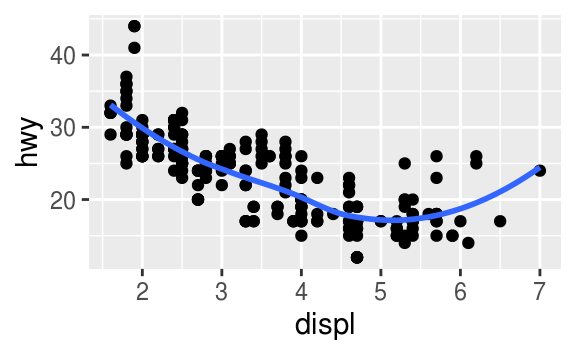

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


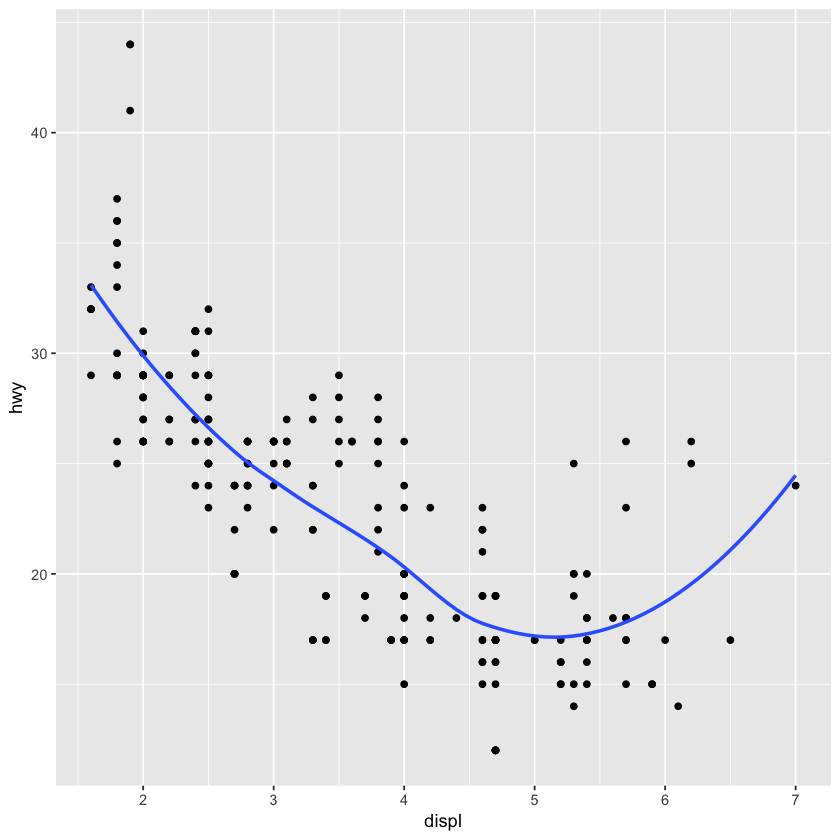

In [102]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() +
  geom_smooth(se = FALSE)

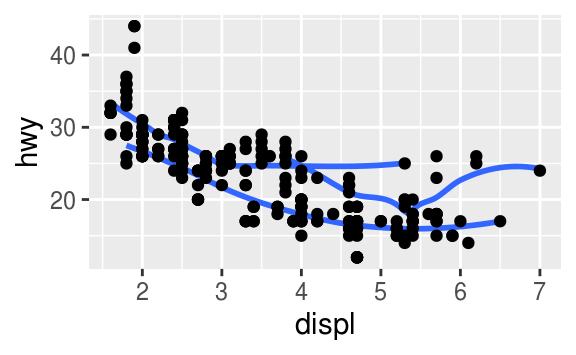

In [108]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, group = drv)) + 
  geom_point() + 
  geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


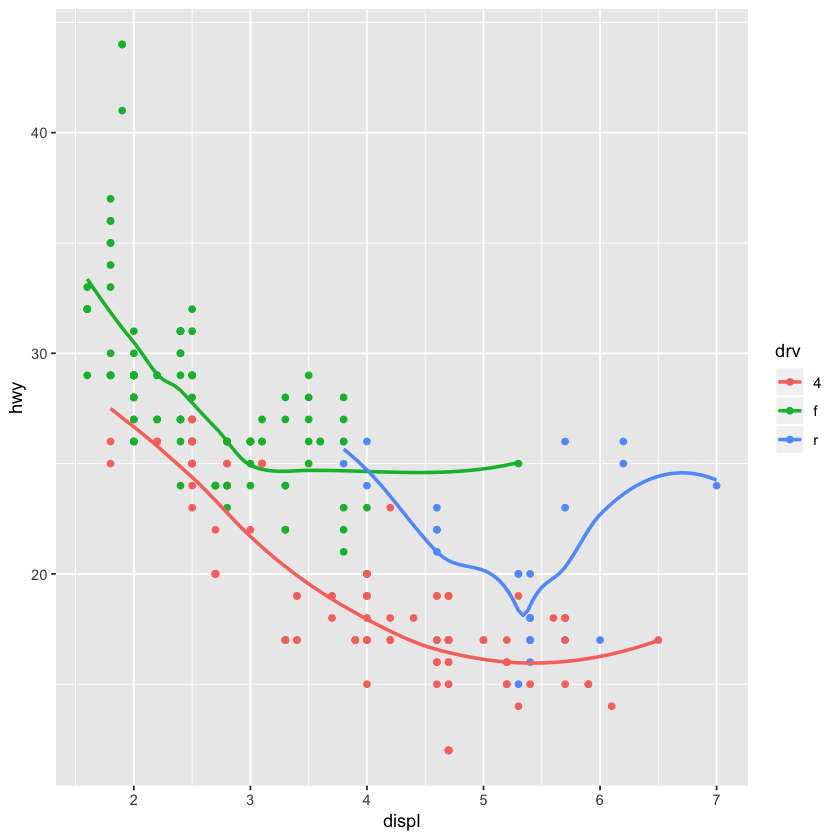

In [109]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) + 
  geom_point() + 
  geom_smooth(se = FALSE)

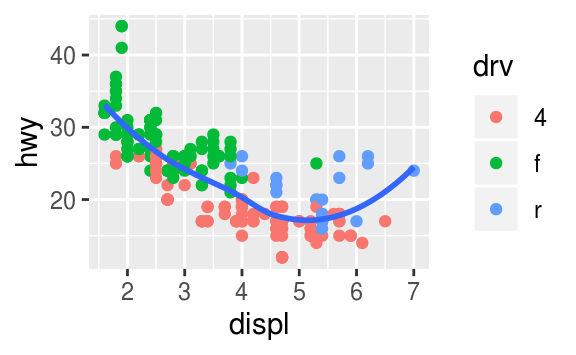

In [111]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(data = mpg, mapping = aes(color = drv)) + 
  geom_smooth(se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


In [113]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(data = mpg, mapping = aes(color = drv)) + 
  geom_smooth(data = mpg, mapping = aes(linetype = drv), se = FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


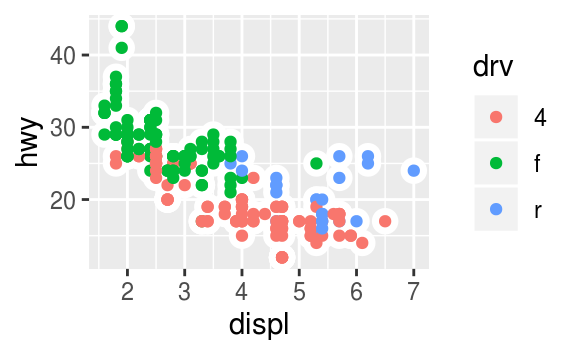

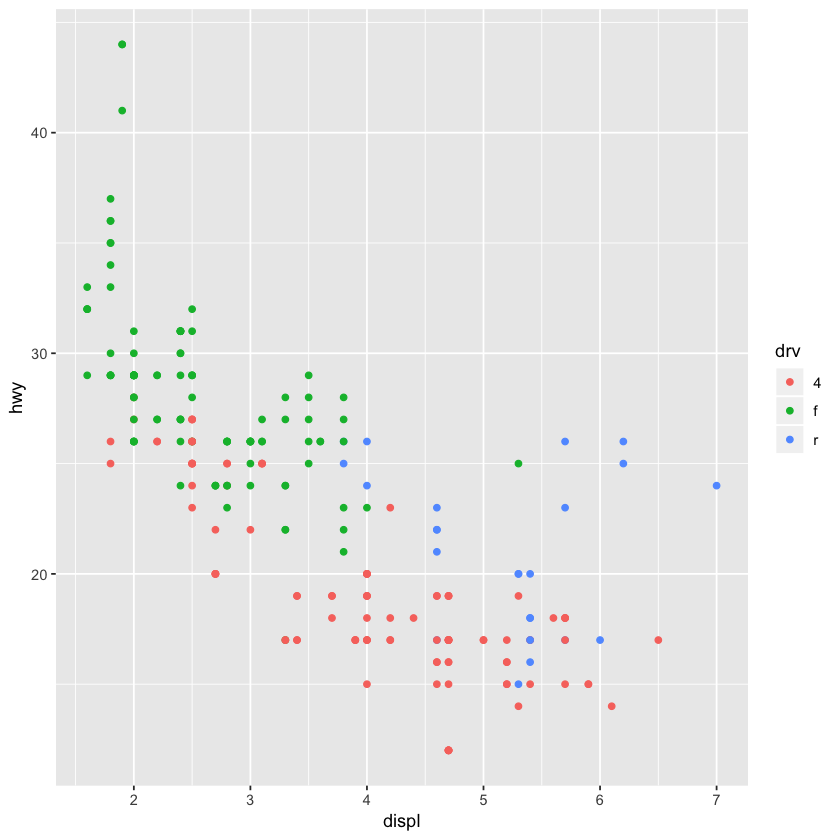

In [114]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(data = mpg, mapping = aes(color = drv)) 

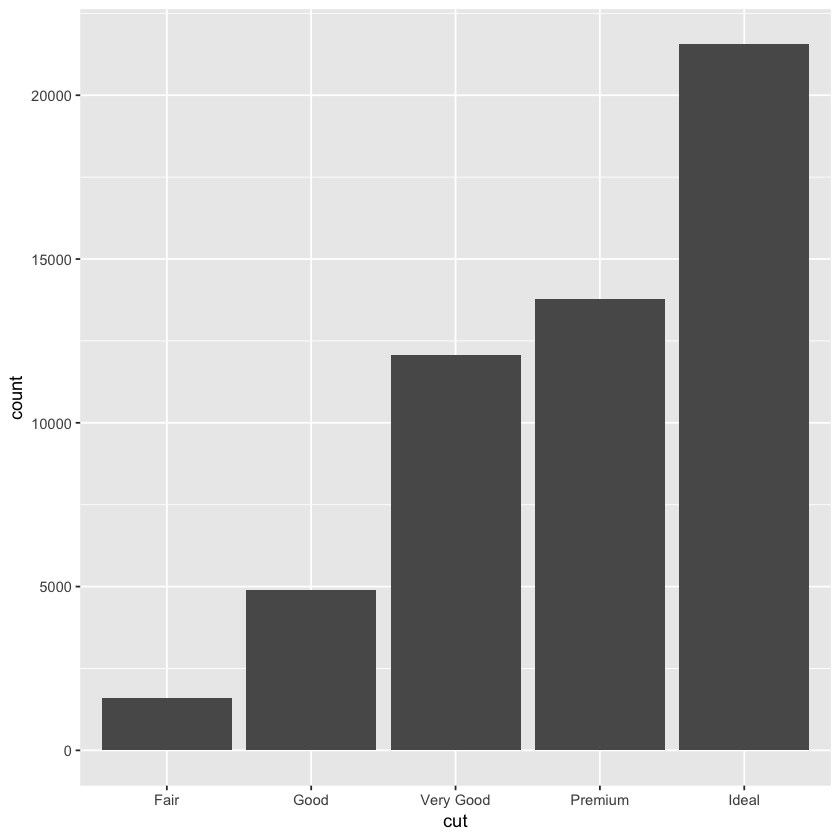

In [115]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut))

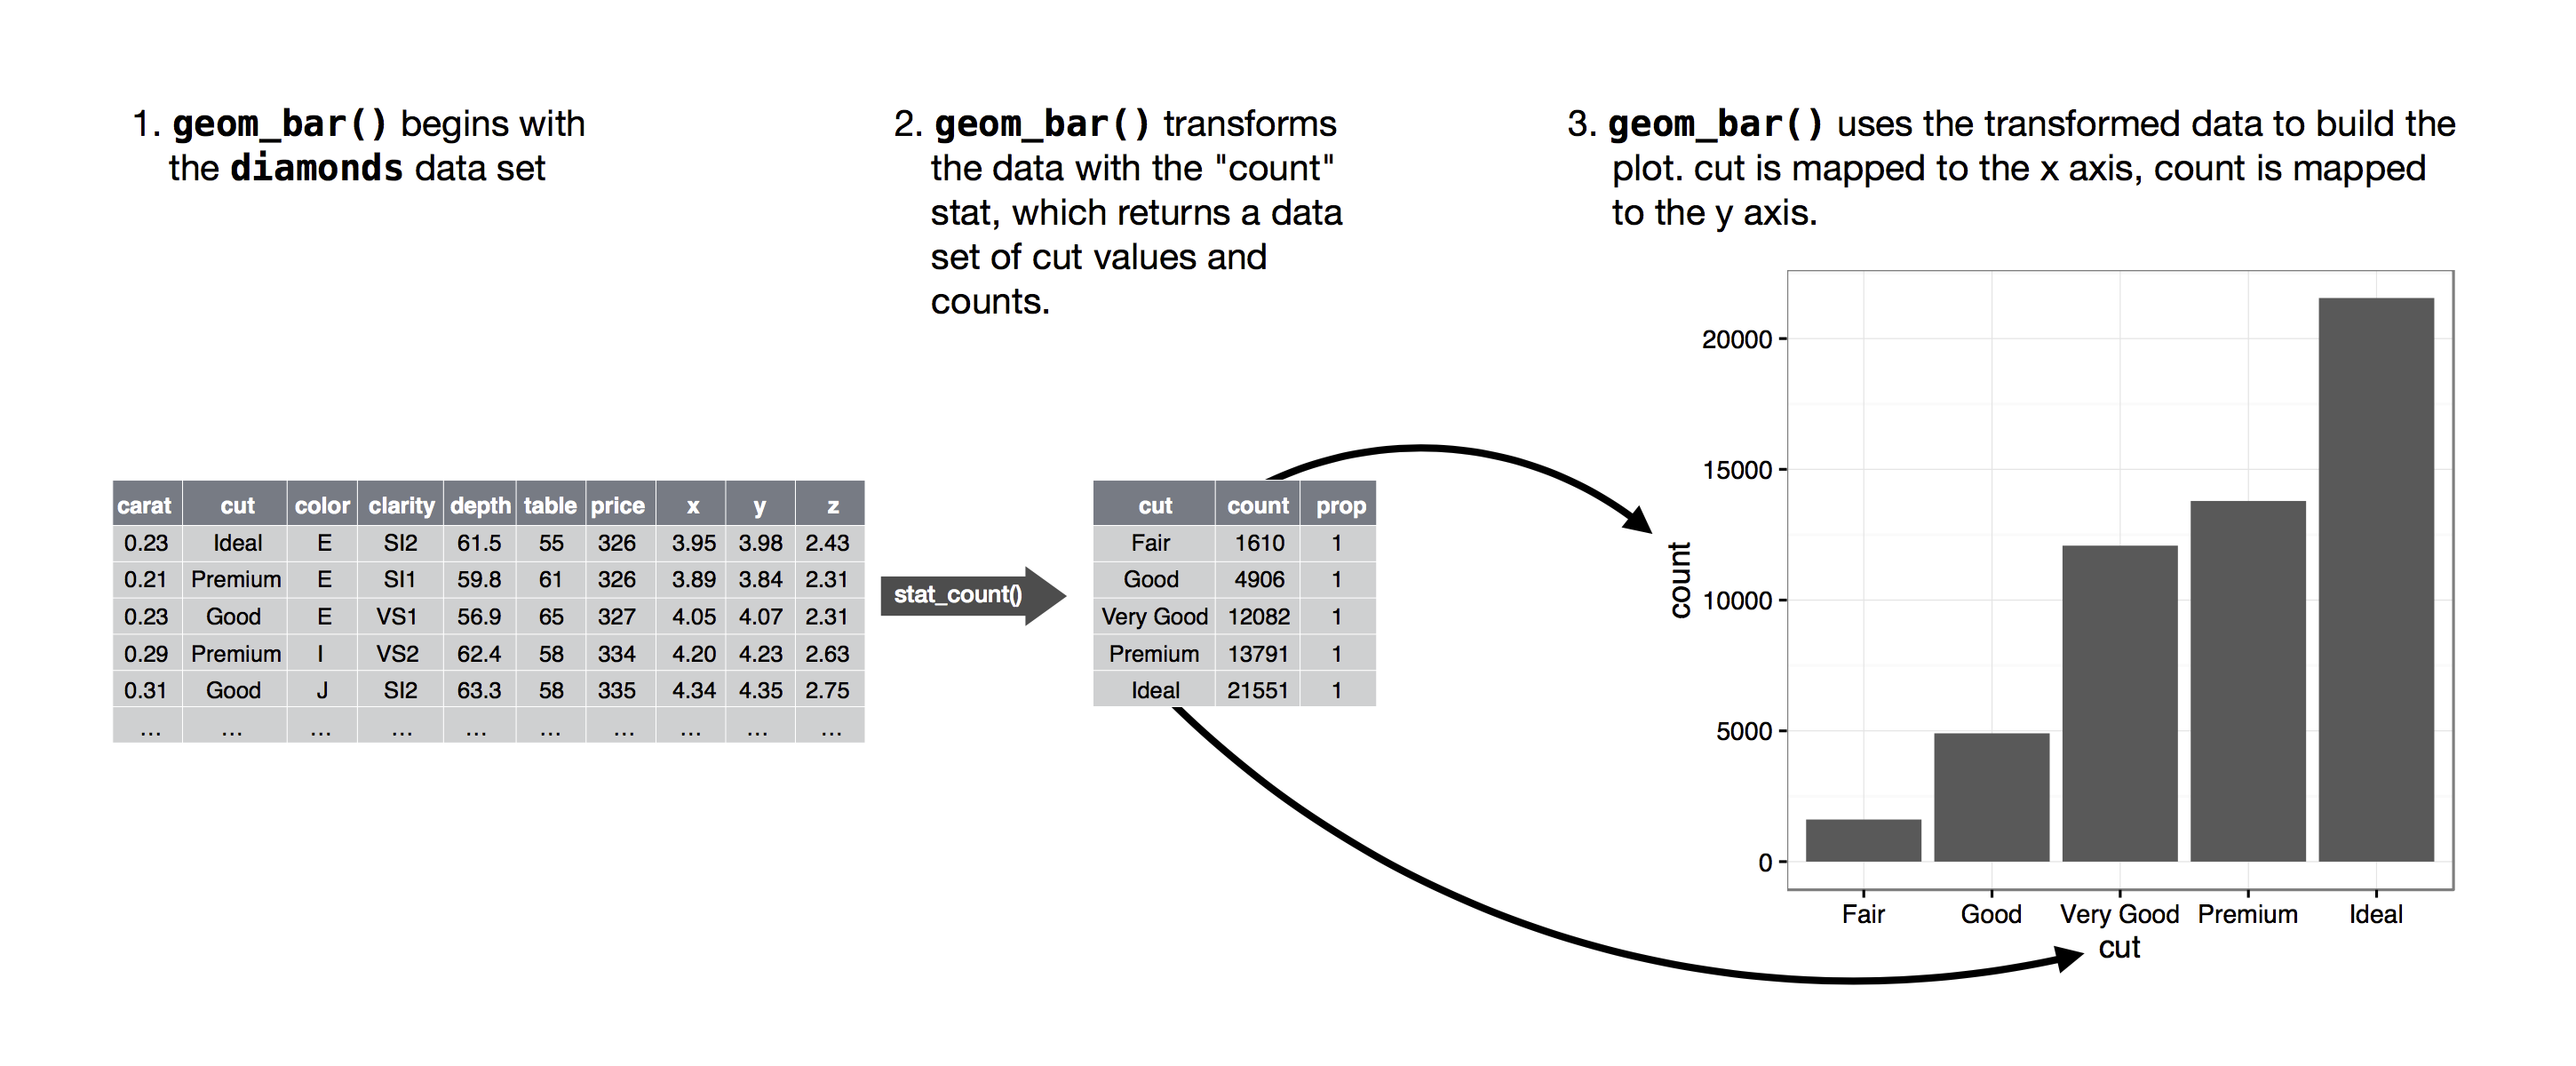

In [116]:
?geom_bar

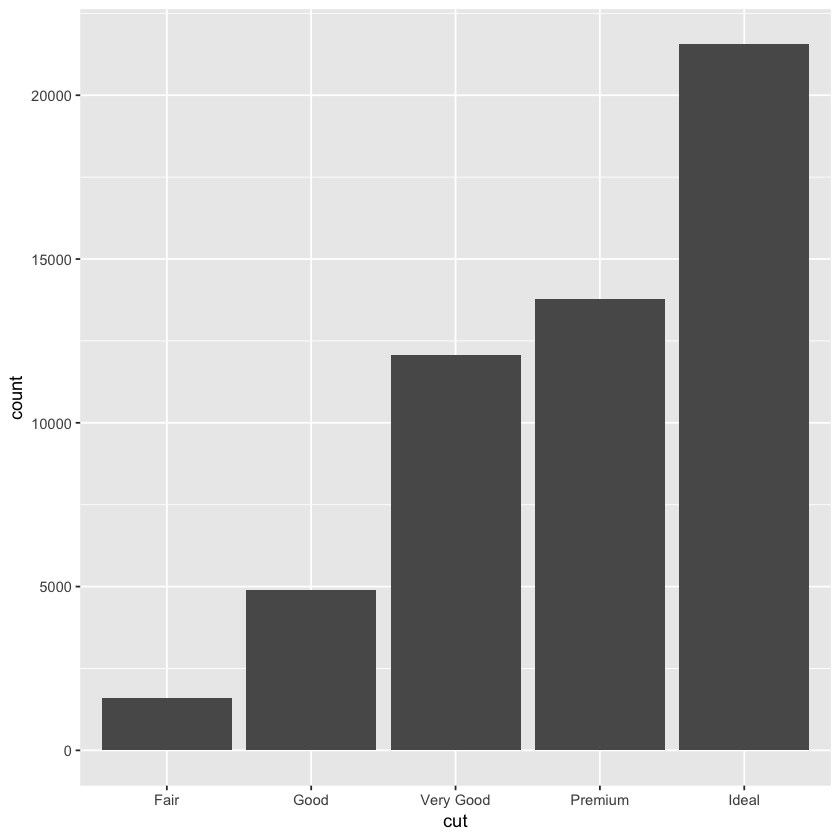

In [117]:
ggplot(data = diamonds) + 
  stat_count(mapping = aes(x = cut))

In [118]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)

ggplot(data = demo) +
  geom_bar(mapping = aes(x = cut, y = freq), stat = "identity")

In [121]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop.., group = 1))

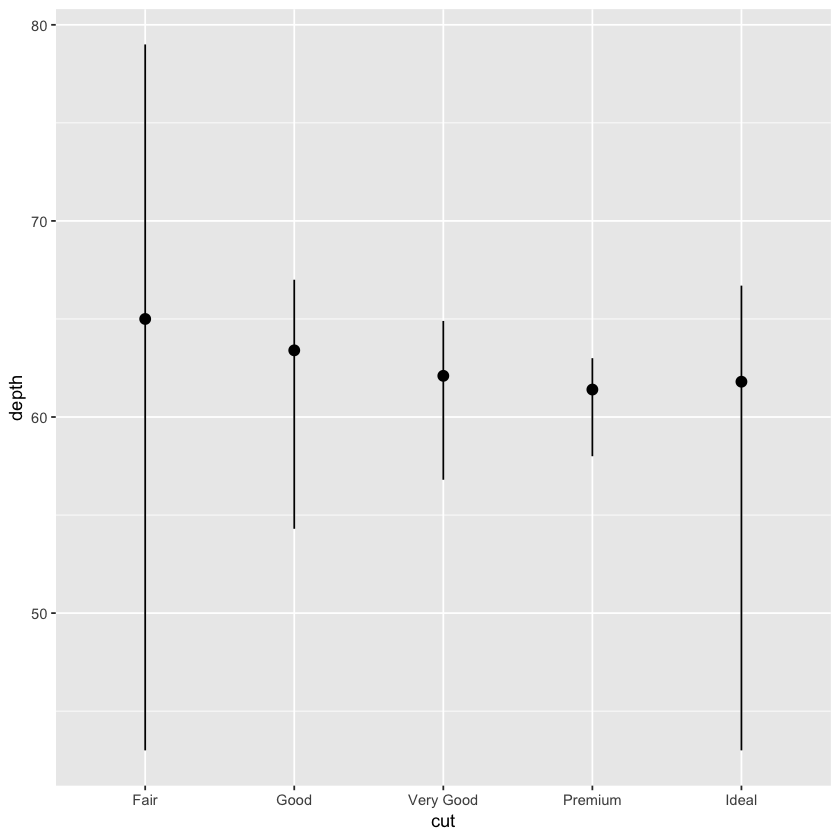

In [140]:
ggplot(data = diamonds) + 
  stat_summary(
    mapping = aes(x = cut, y = depth),
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
  )

In [133]:
?stat_bin

In [135]:
?stat_summary

In [138]:
ggplot(data = diamonds) +
  geom_pointrange(
    mapping = aes(x = cut, y = depth),
    stat = "summary"
  )

No summary function supplied, defaulting to `mean_se()


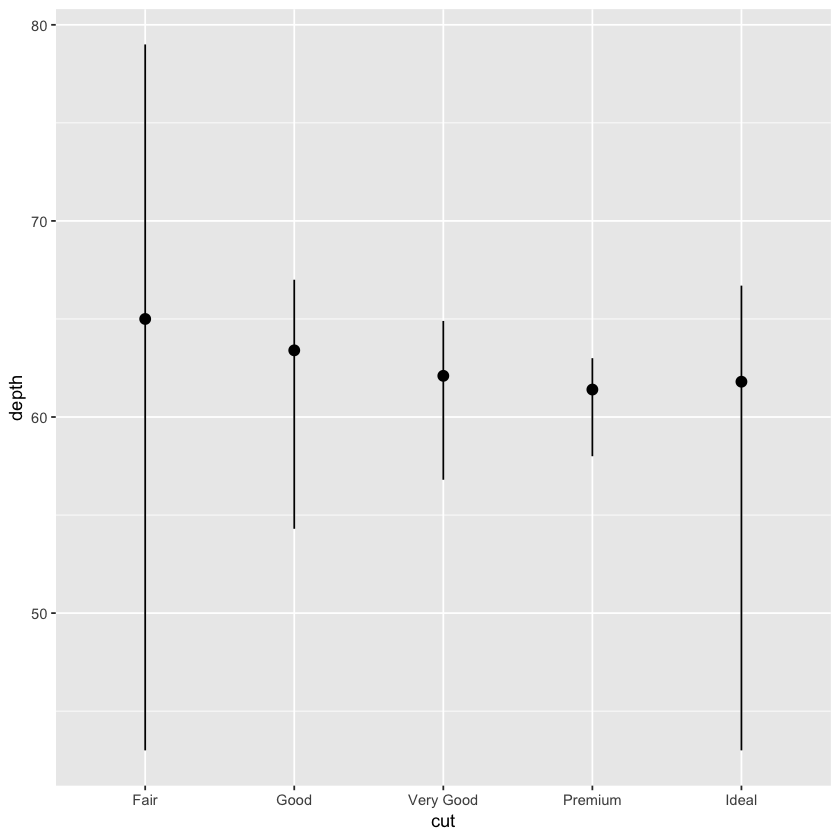

In [139]:
ggplot(data = diamonds) +
  geom_pointrange(
    mapping = aes(x = cut, y = depth),
    stat = "summary",
    fun.ymin = min,
    fun.ymax = max,
    fun.y = median
  )

In [137]:
?geom_col

The following tables lists the pairs of geoms and stats that are almost always used in concert.

Complementary geoms and stats
geom	            stat
geom_bar()	        stat_count()
geom_bin2d()	    stat_bin_2d()
geom_boxplot()	    stat_boxplot()
geom_contour()	    stat_contour()
geom_count()	    stat_sum()
geom_density()	    stat_density()
geom_density_2d()	stat_density_2d()
geom_hex()	        stat_hex()
geom_freqpoly()	    stat_bin()
geom_histogram()	stat_bin()
geom_qq_line()	    stat_qq_line()
geom_qq()	        stat_qq()
geom_quantile()	    stat_quantile()
geom_smooth()	    stat_smooth()
geom_violin()	    stat_violin()
geom_sf()	        stat_sf()

They tend to have their names in common, stat_smooth() and geom_smooth(). However, this is not always the case, with geom_bar() and stat_count() and geom_histogram() and geom_bin() as notable counter-examples. Also, the pairs of geoms and stats that are used in concert almost always have each other as the default stat (for a geom) or geom (for a stat).

The following tables contain the geoms and stats in ggplot2.

ggplot2 geom layers and their default stats.
geom	            default stat	shared docs
geom_abline()		
geom_hline()		
geom_vline()		
geom_bar()	        stat_count()	x
geom_col()		
geom_bin2d()  	    stat_bin_2d()	x
geom_blank()		
geom_boxplot()	    stat_boxplot()	x
geom_countour()	    stat_countour()	x
geom_count()	    stat_sum()	x
geom_density()	    stat_density()	x
geom_density_2d()	stat_density_2d()	x
geom_dotplot()		
geom_errorbarh()		
geom_hex()	        stat_hex()	x
geom_freqpoly()	    stat_bin()	x
geom_histogram()	stat_bin()	x
geom_crossbar()		
geom_errorbar()		
geom_linerange()		
geom_pointrange()		
geom_map()		
geom_point()		
geom_map()		
geom_path()		
geom_line()		
geom_step()		
geom_point()		
geom_polygon()		
geom_qq_line()	    stat_qq_line()	x
geom_qq()	        stat_qq()	x
geom_quantile()	    stat_quantile()	x
geom_ribbon()		
geom_area()		
geom_rug()		
geom_smooth()	    stat_smooth()	x
geom_spoke()		
geom_label()		
geom_text()		
geom_raster()		
geom_rect()		
geom_tile()		
geom_violin()	    stat_ydensity()	x
geom_sf()	        stat_sf()	x

ggplot2 stat layers and their default geoms.
stat	            default geom	shared docs
stat_ecdf()	geom_step()	
stat_ellipse()	    geom_path()	
stat_function()	    geom_path()	
stat_identity()	    geom_point()	
stat_summary_2d()	geom_tile()	
stat_summary_hex()	geom_hex()	
stat_summary_bin()	geom_pointrange()	
stat_summary()	    geom_pointrange()	
stat_unique()	    geom_point()	
stat_count()	    geom_bar()	x
stat_bin_2d()	    geom_tile()	x
stat_boxplot()	    geom_boxplot()	x
stat_countour()	    geom_contour()	x
stat_sum()	        geom_point()	x
stat_density()	    geom_area()	x
stat_density_2d()	geom_density_2d()	x
stat_bin_hex()	    geom_hex()	x
stat_bin()	        geom_bar()	x
stat_qq_line()	    geom_path()	x
stat_qq()	        geom_point()	x
stat_quantile()	    geom_quantile()	x
stat_smooth()	    geom_smooth()	x
stat_ydensity()	    geom_violin()	x
stat_sf()	        geom_rect()	x


In [141]:
?stat_smooth

In [145]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop..))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = color, y = ..prop..))


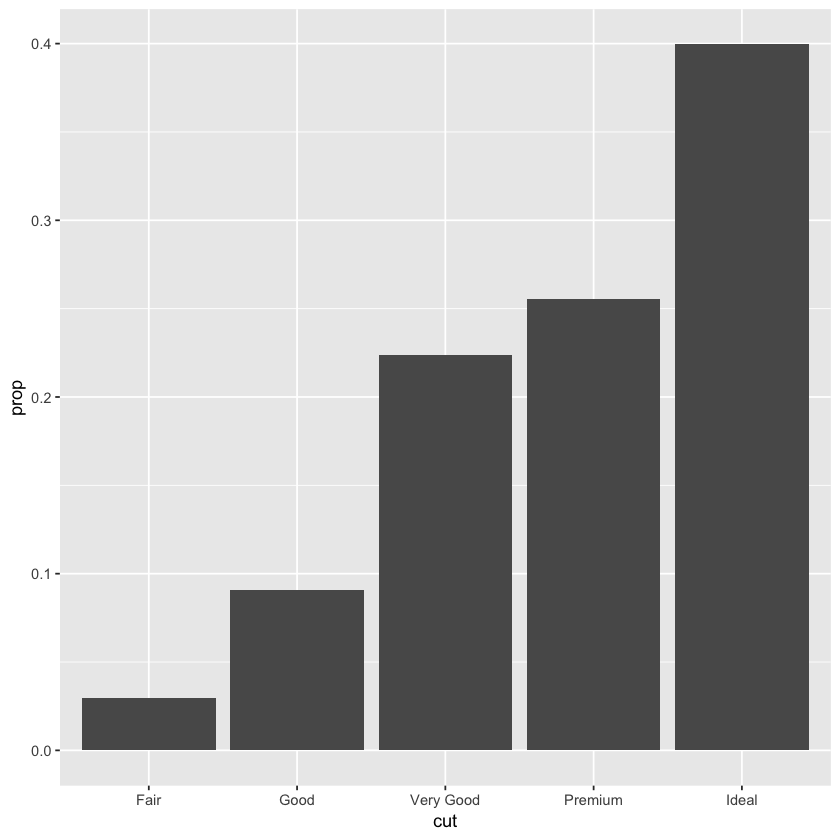

In [146]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, y = ..prop.., group = 1))

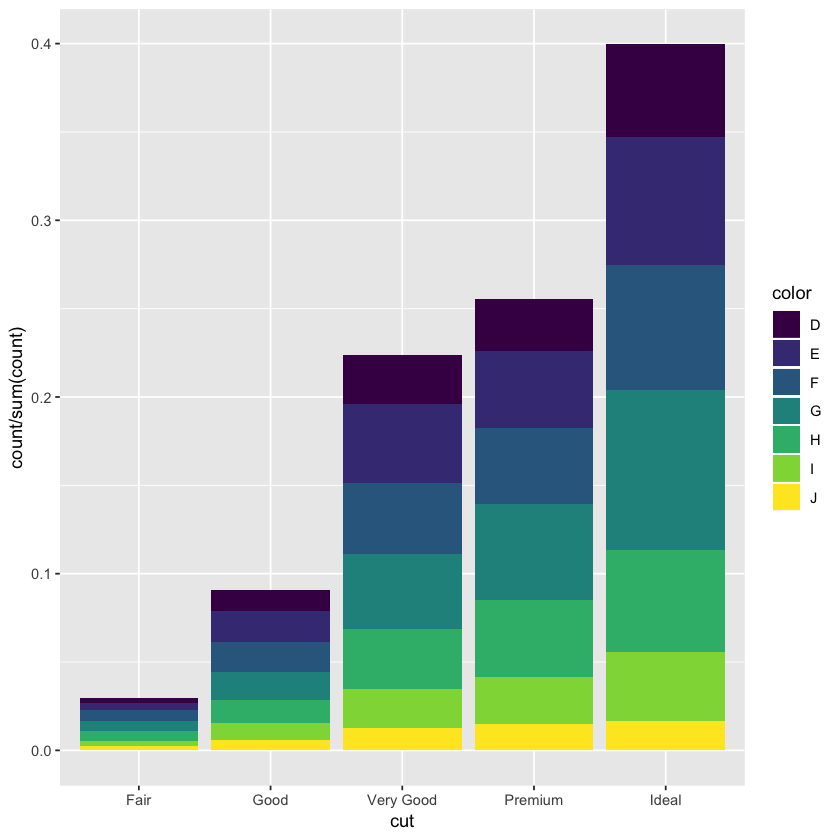

In [147]:
ggplot(data = diamonds) +
  geom_bar(aes(x = cut, y = ..count.. / sum(..count..), fill = color))

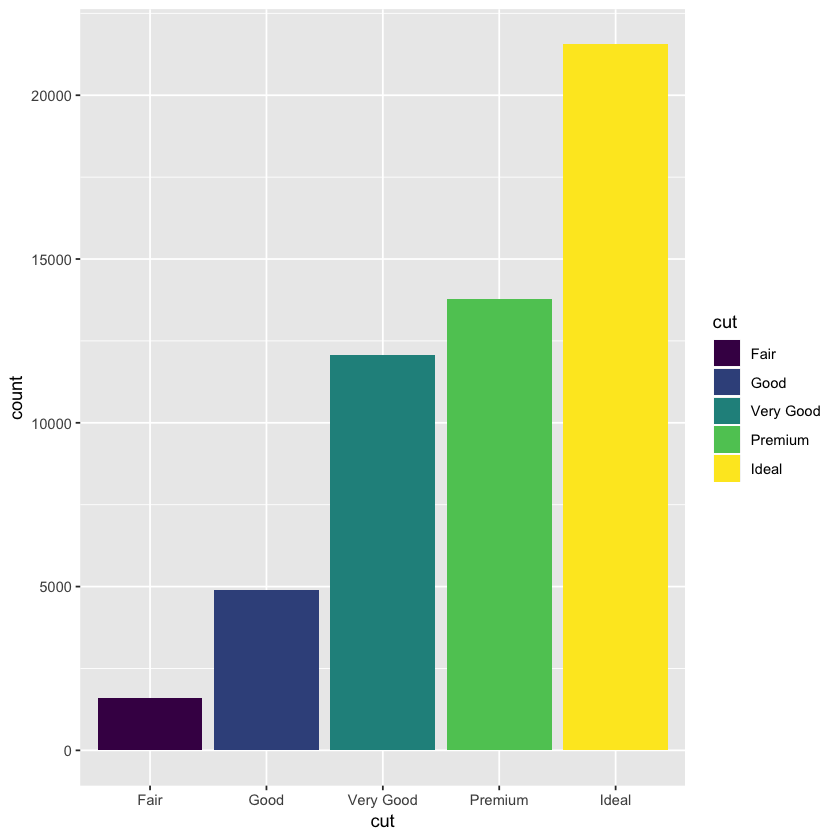

In [148]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

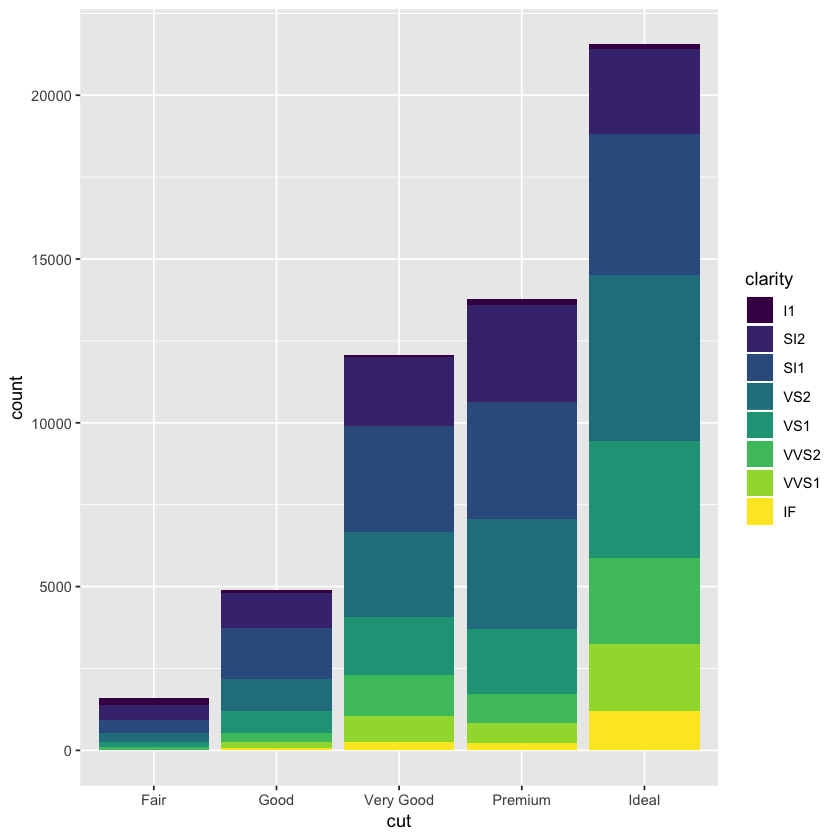

In [152]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity))

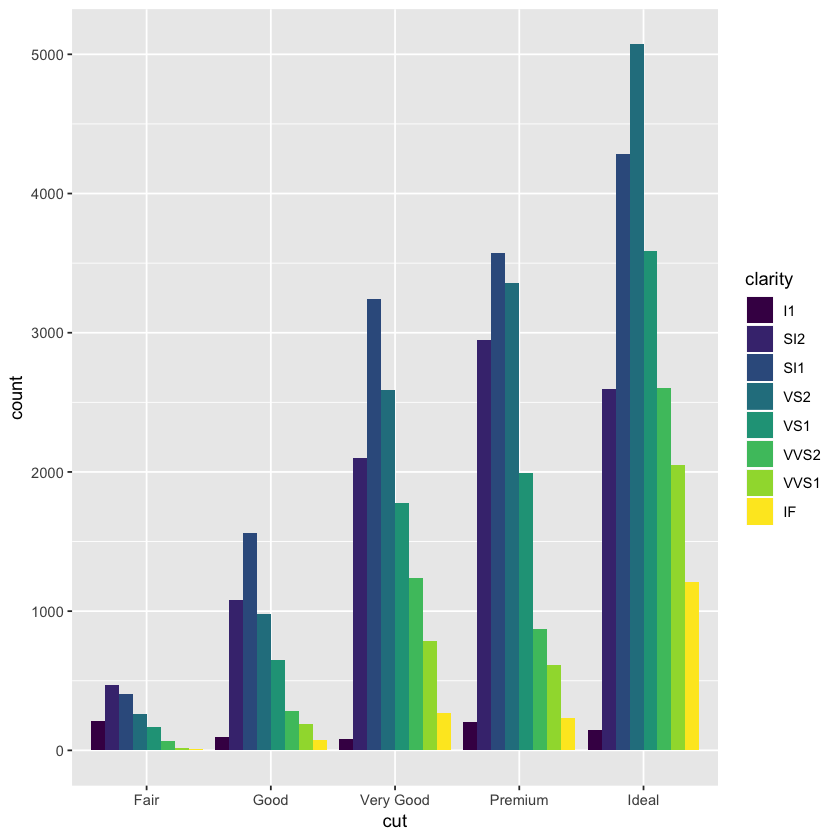

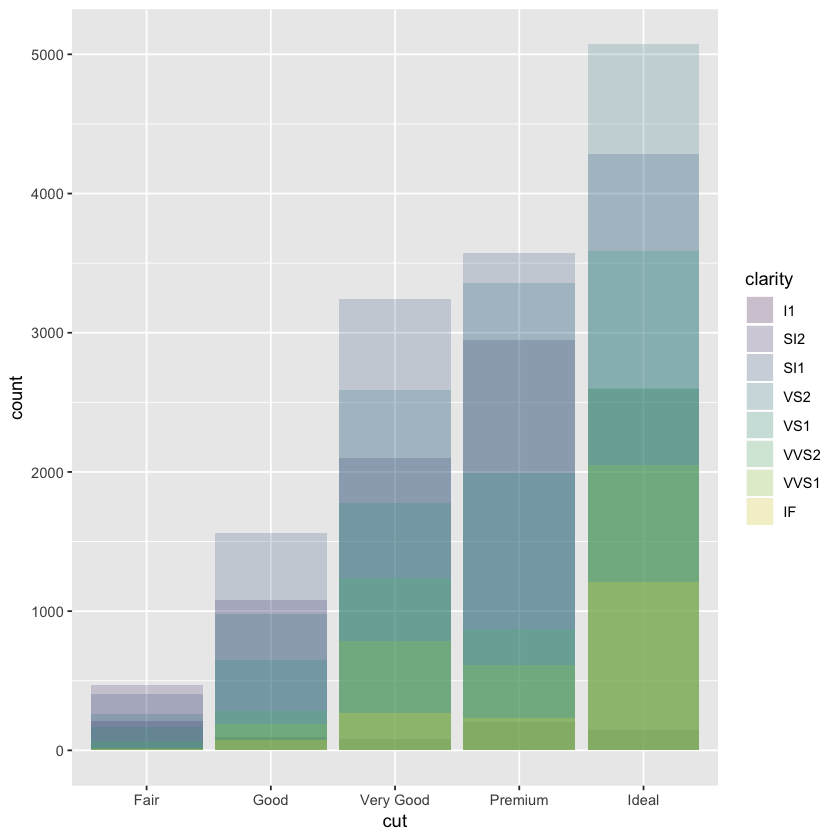

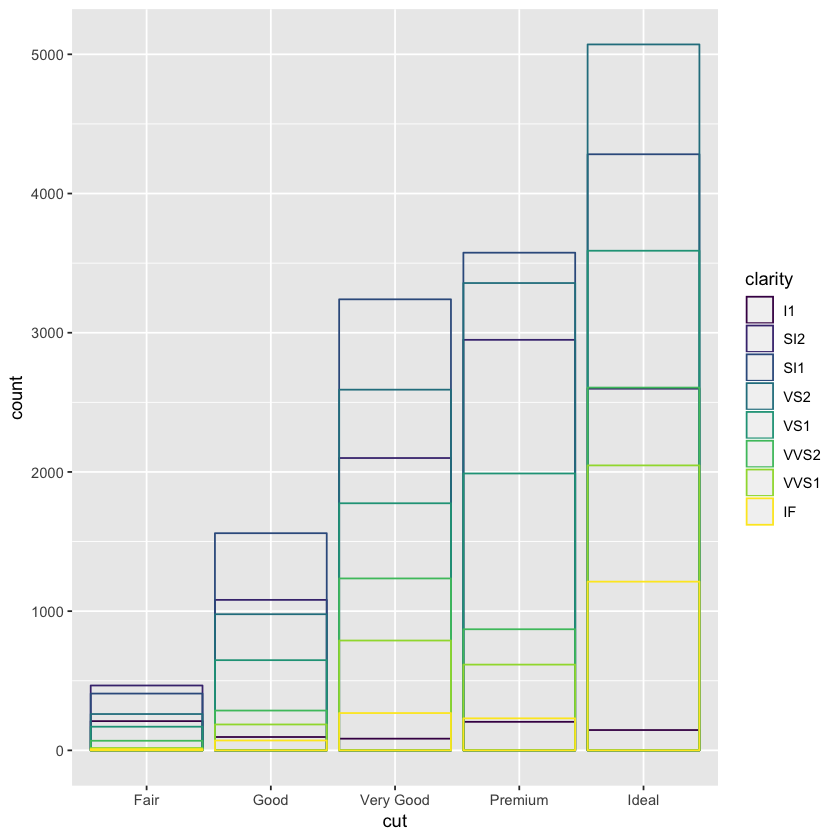

In [156]:
ggplot(data = diamonds, mapping = aes(x = cut, fill = clarity)) + 
  geom_bar(position = "stack")
ggplot(data = diamonds, mapping = aes(x = cut, fill = clarity)) + 
  geom_bar(alpha = 1/5, position = "identity")
ggplot(data = diamonds, mapping = aes(x = cut, colour = clarity)) + 
  geom_bar(fill = NA, position = "identity")

In [157]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

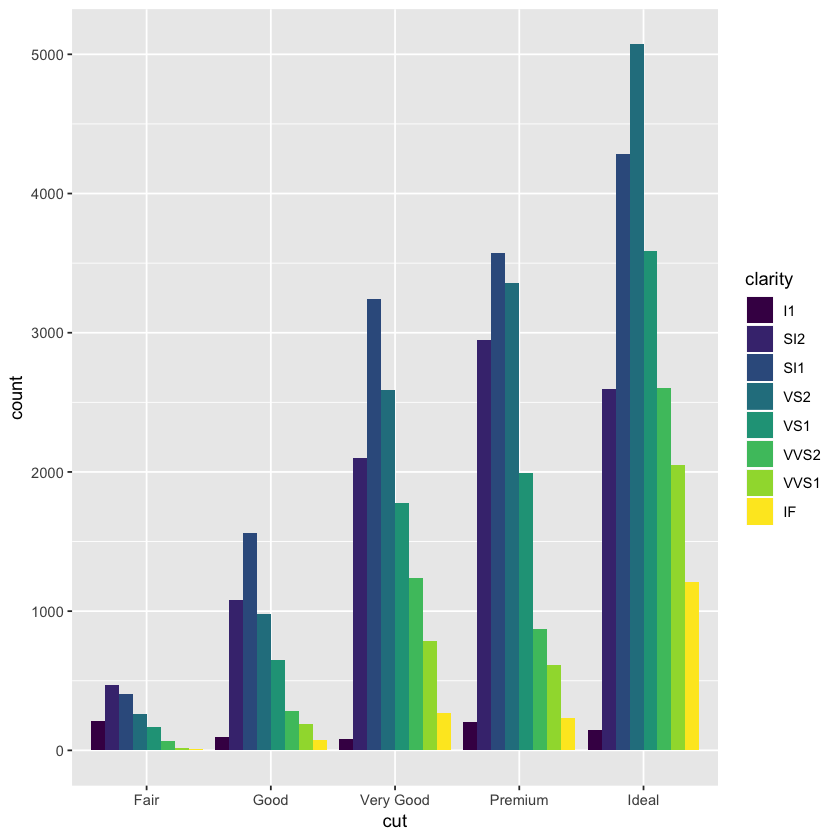

In [158]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

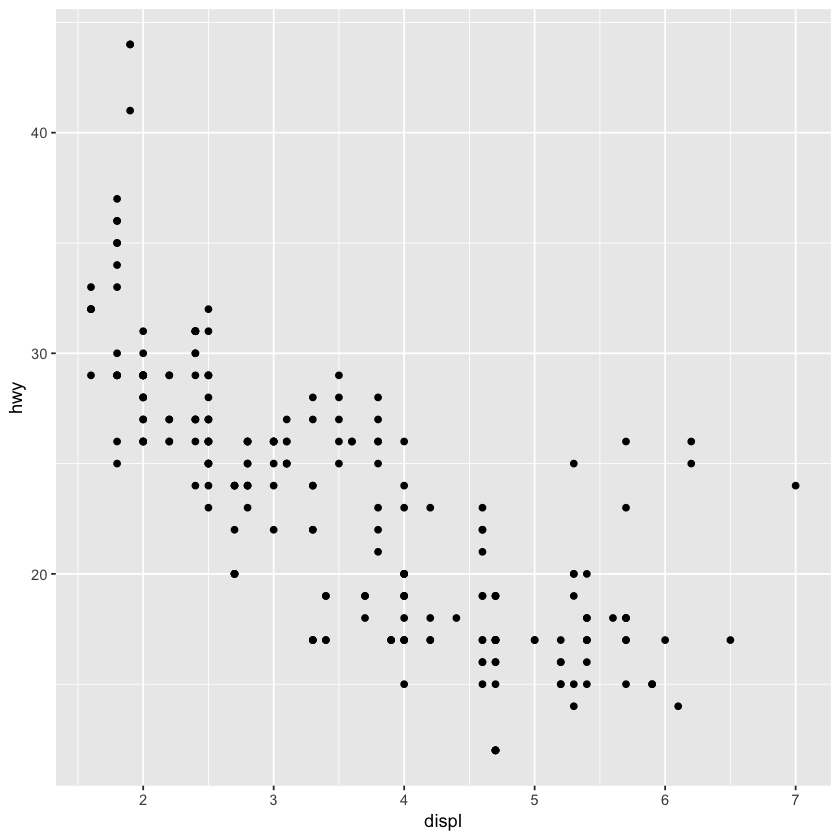

In [159]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

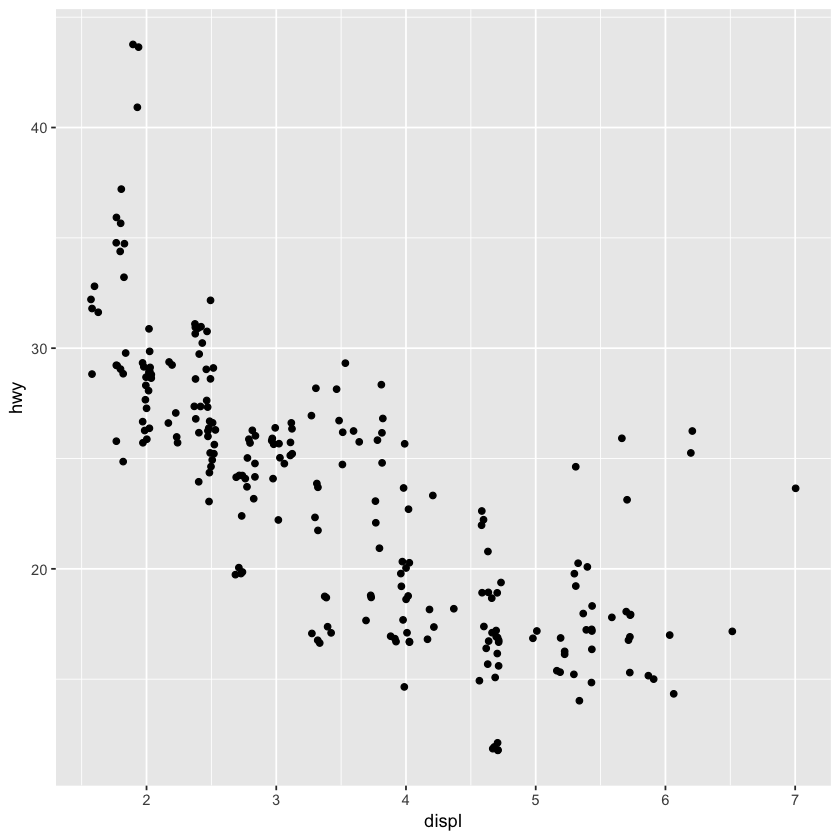

In [160]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")

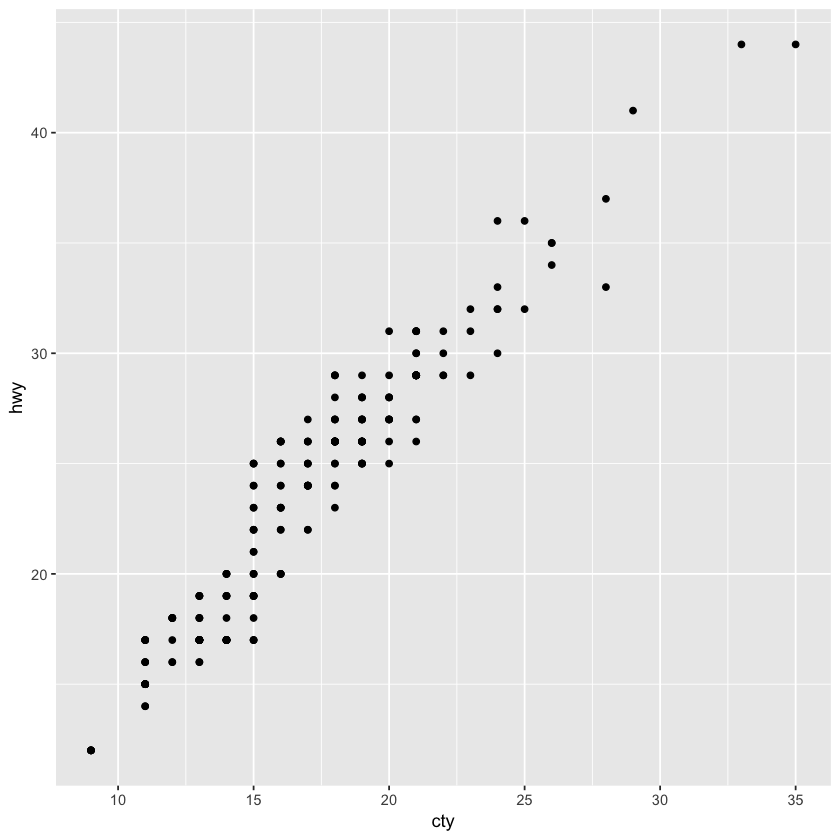

In [161]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + 
  geom_point()

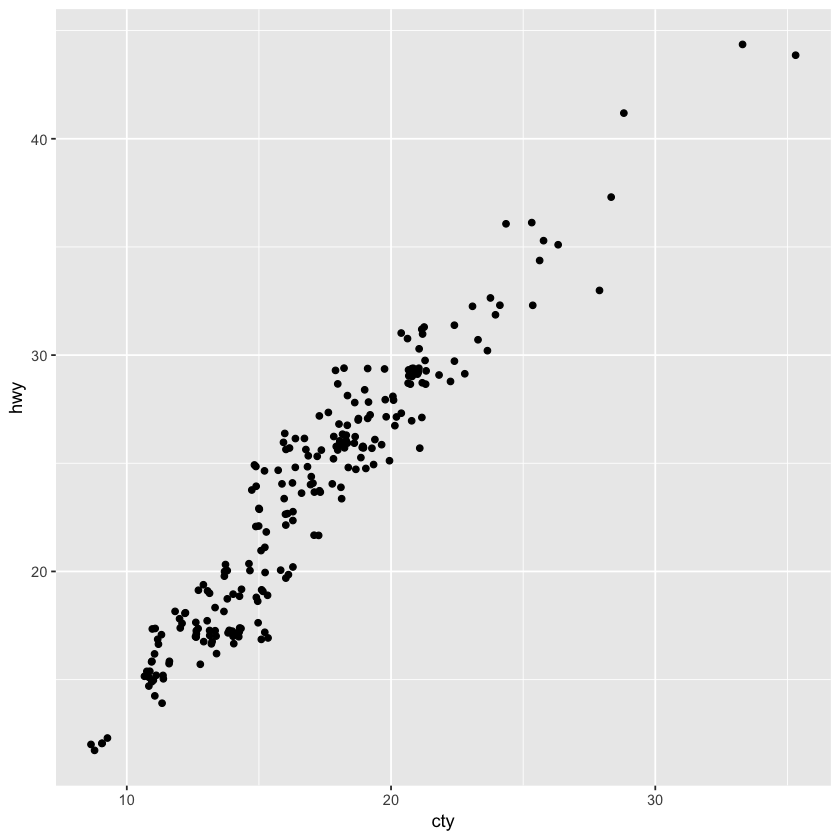

In [162]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point(position = "jitter")

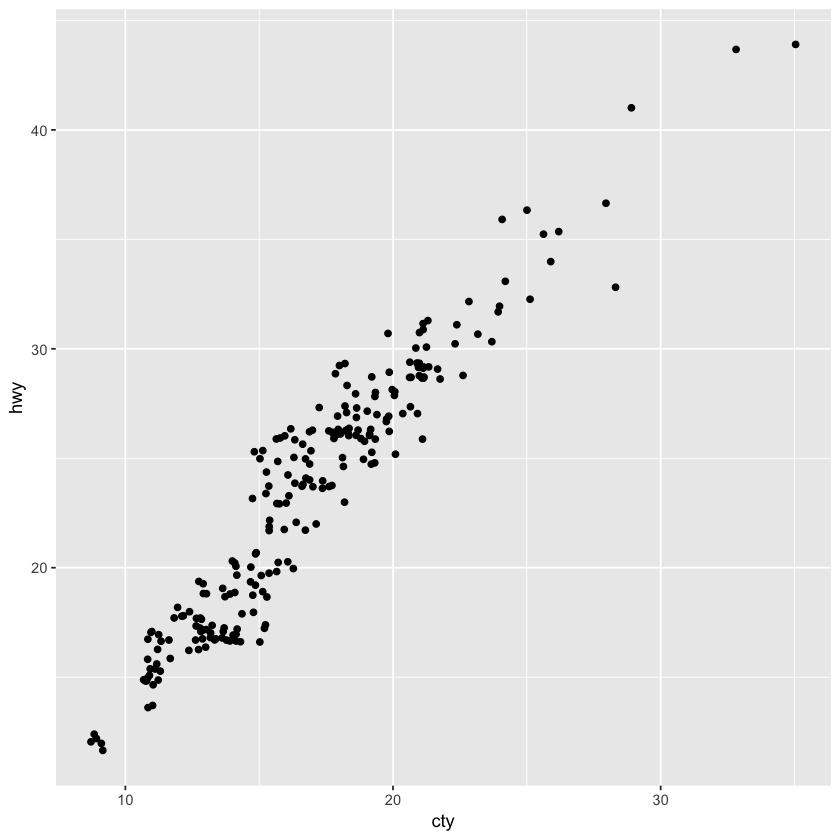

In [163]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
    geom_jitter()

In [164]:
?geom_jitter()

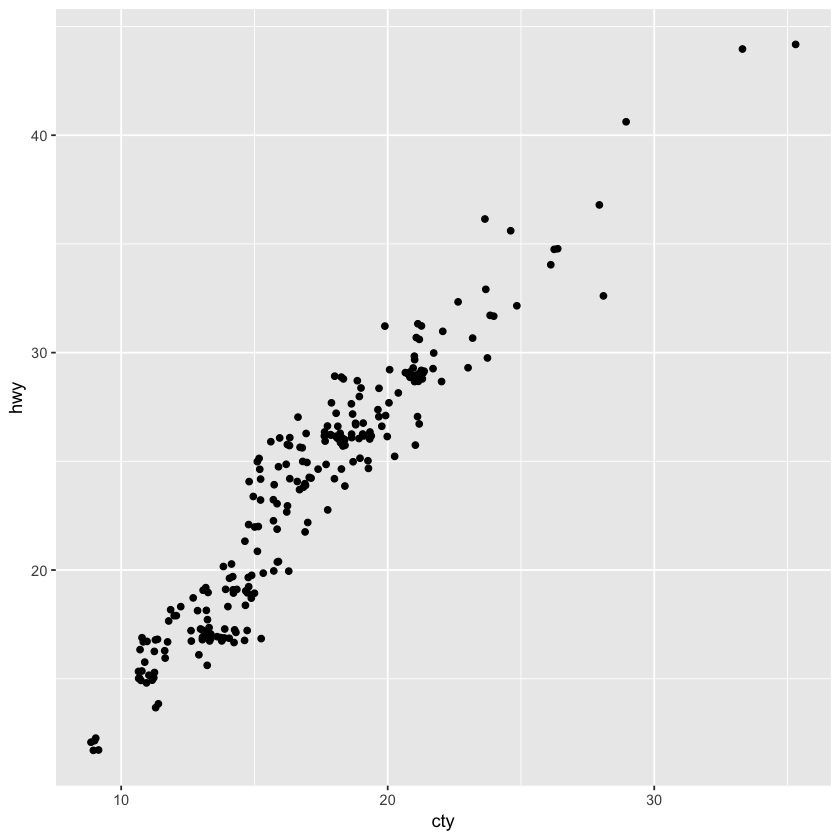

In [165]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point(position = position_jitter())

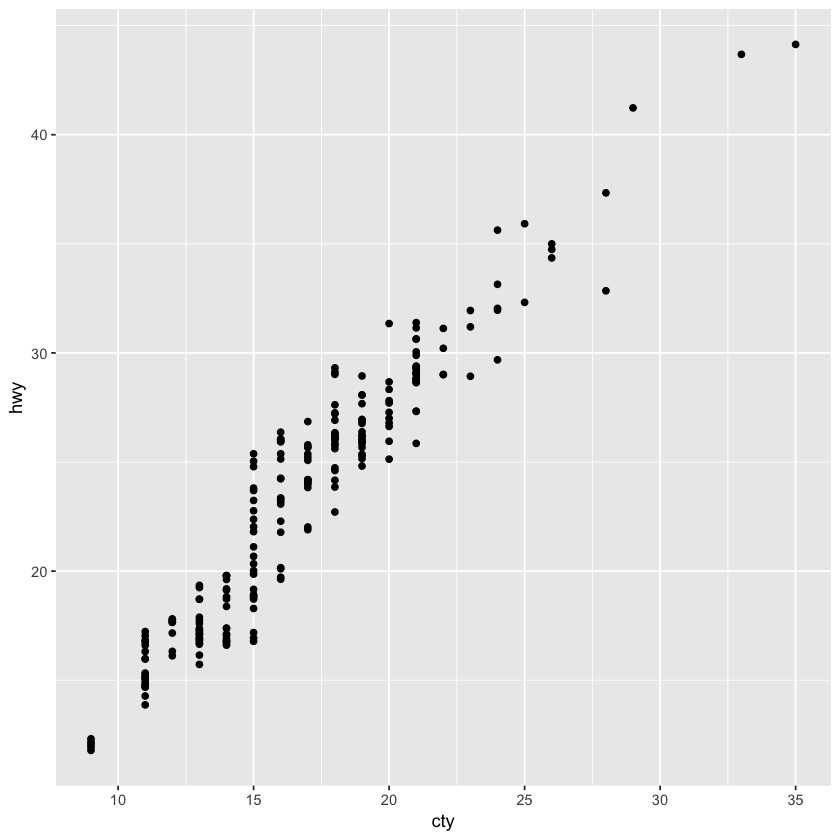

In [166]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_jitter(width = 0)

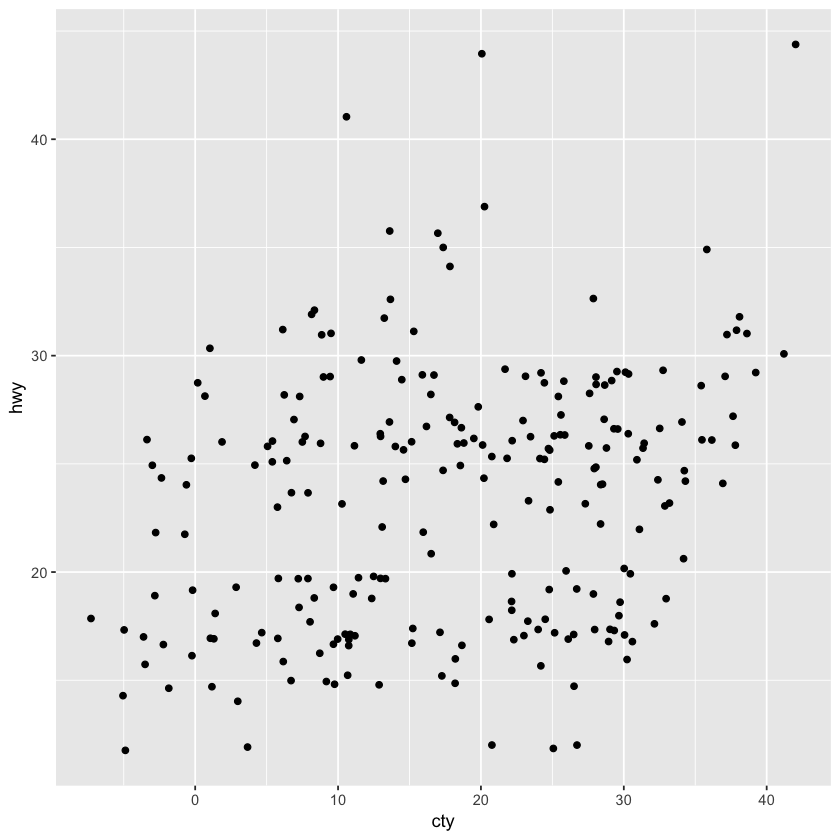

In [167]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_jitter(width = 20)

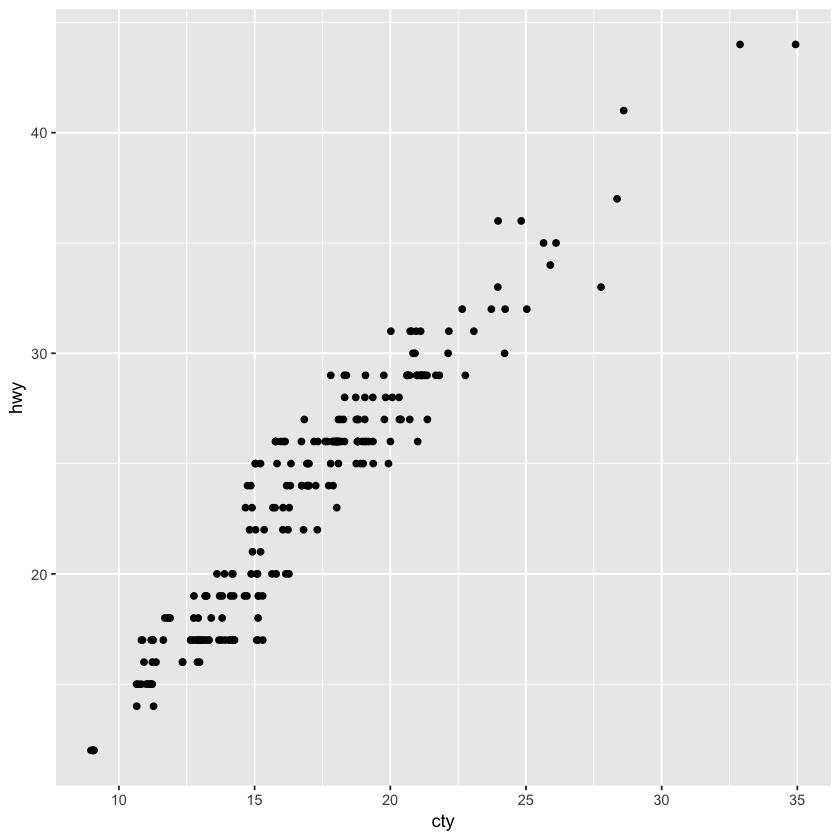

In [168]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_jitter(height = 0)

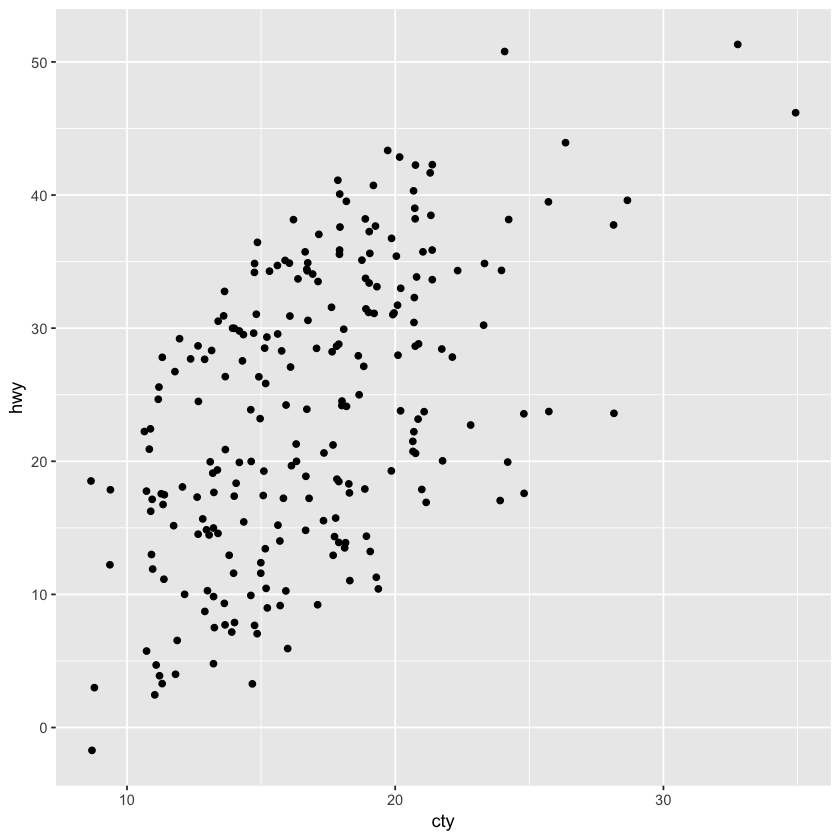

In [172]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_jitter(height = 15)

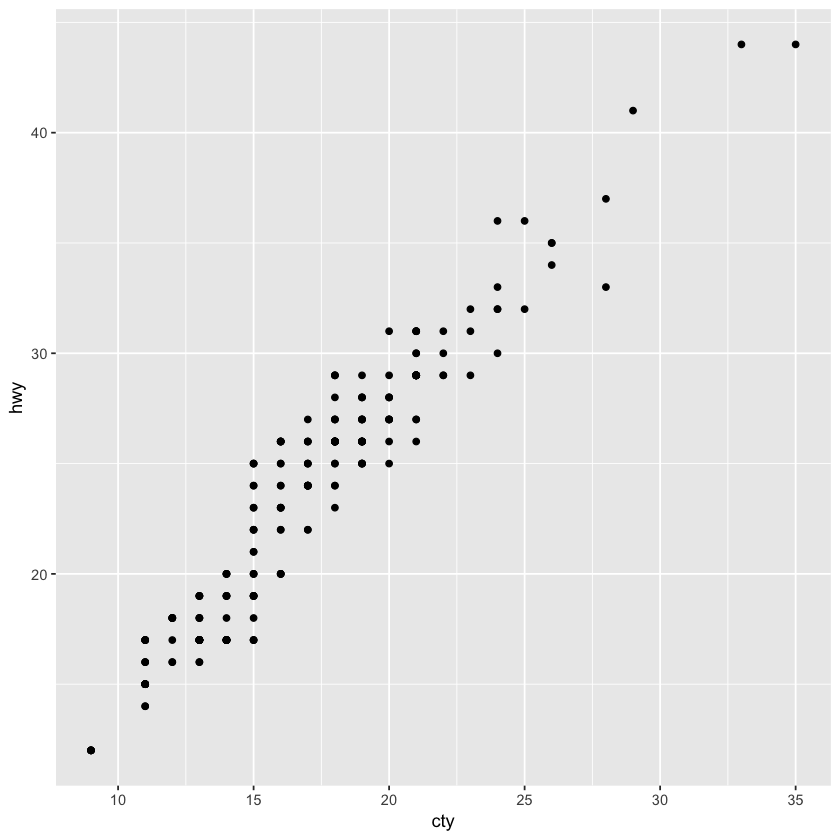

In [173]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_jitter(height = 0, width = 0)

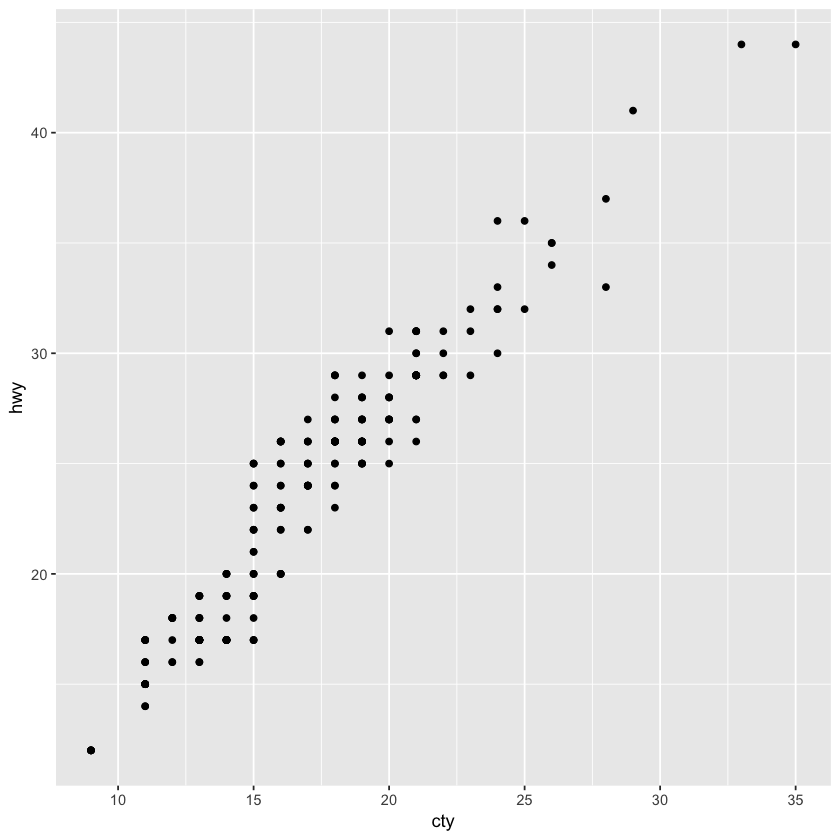

In [171]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) + geom_point()

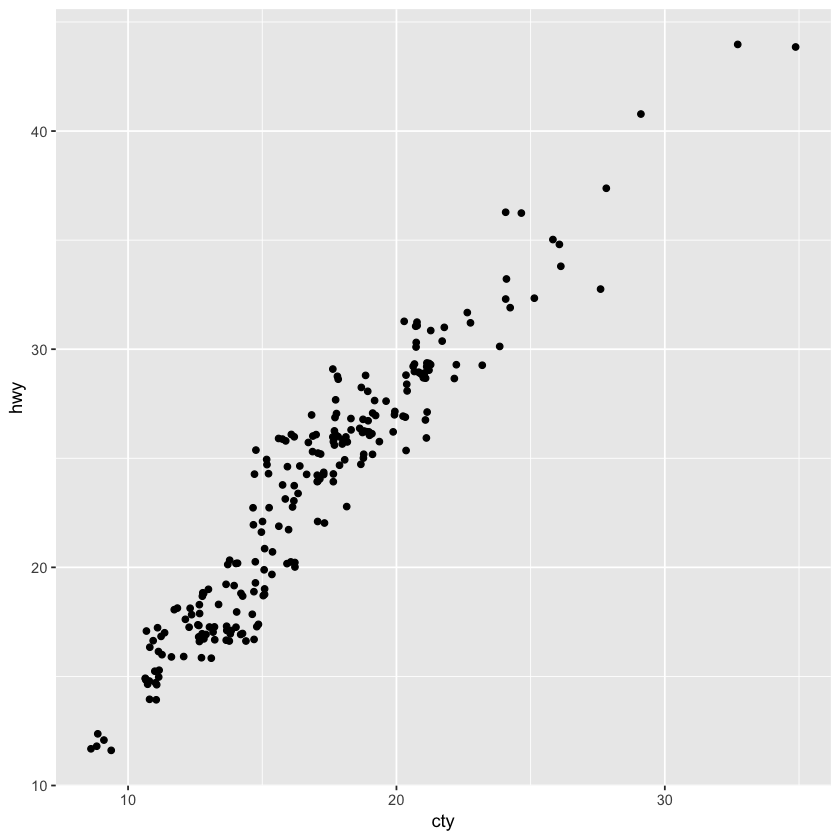

In [174]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_jitter()

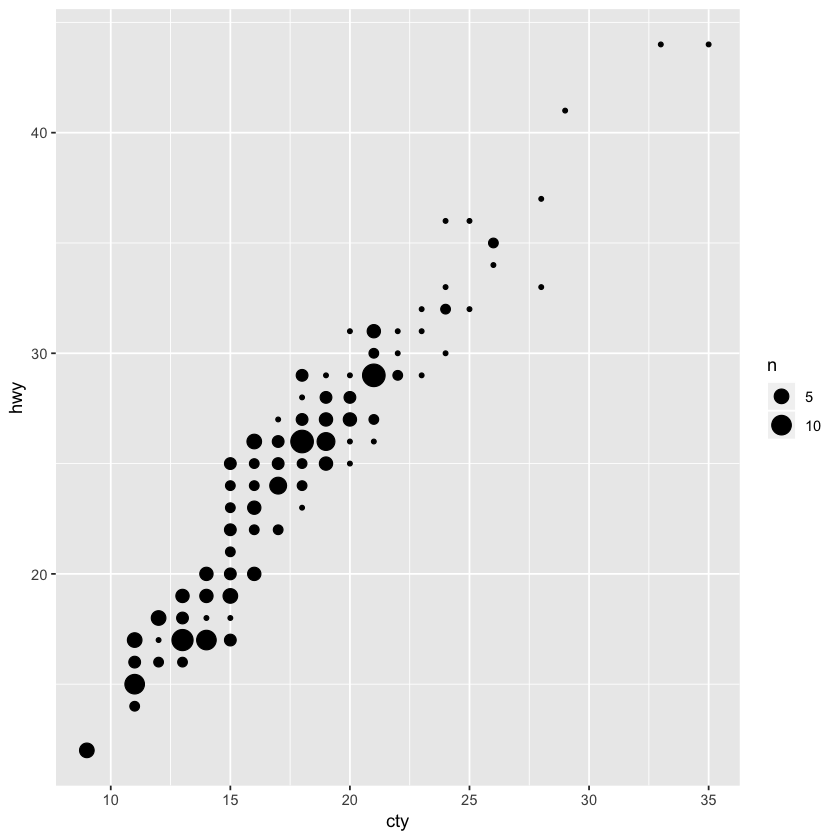

In [175]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_count()

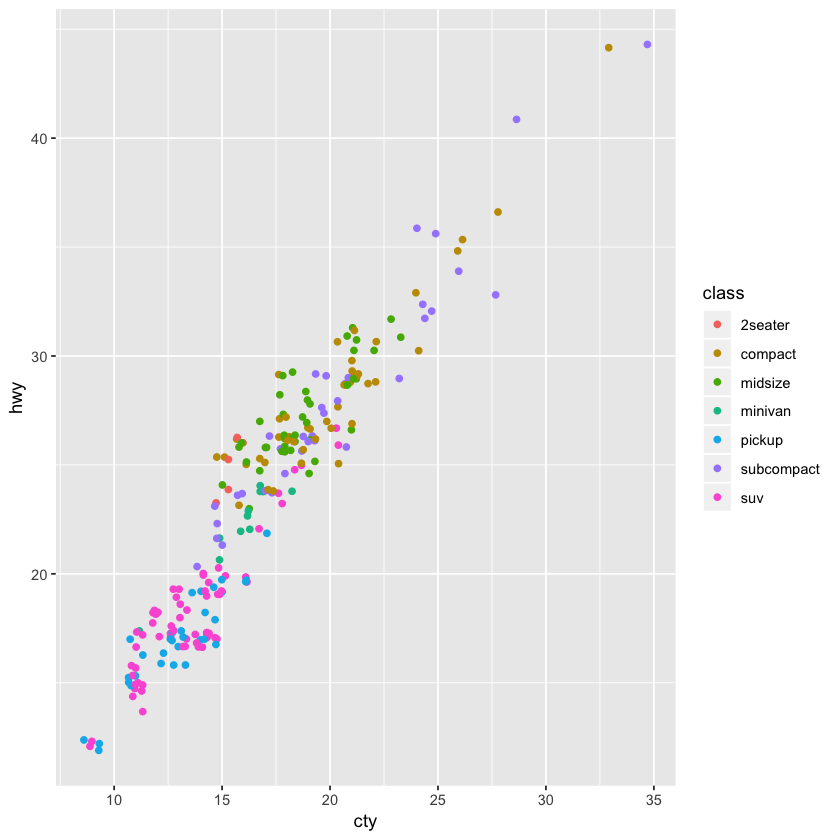

In [176]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy, color = class)) +
  geom_jitter()

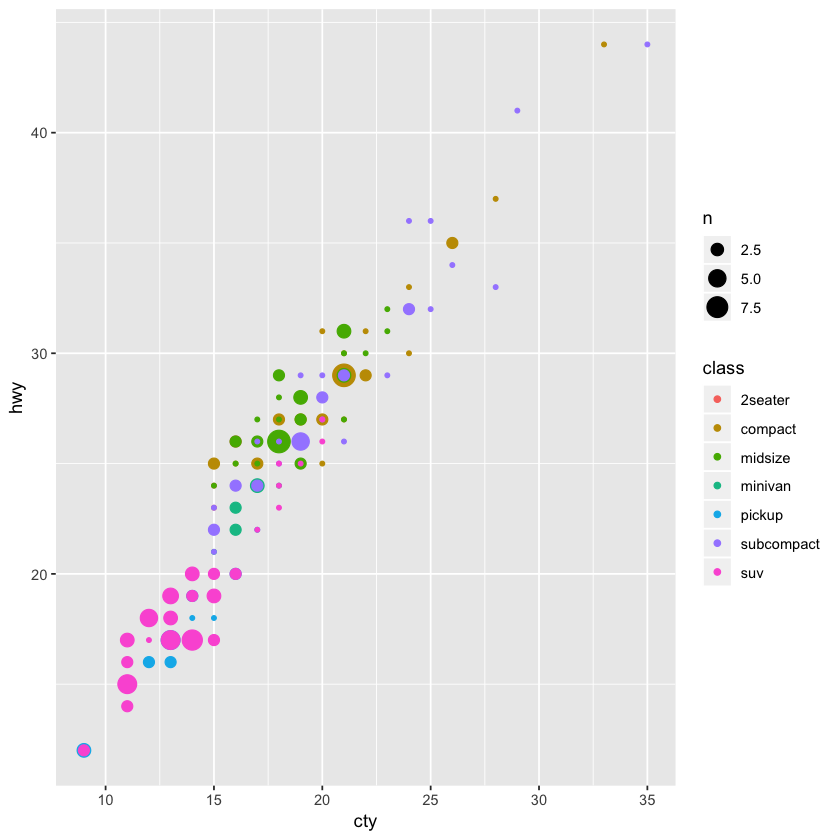

In [177]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy, color = class)) +
  geom_count()

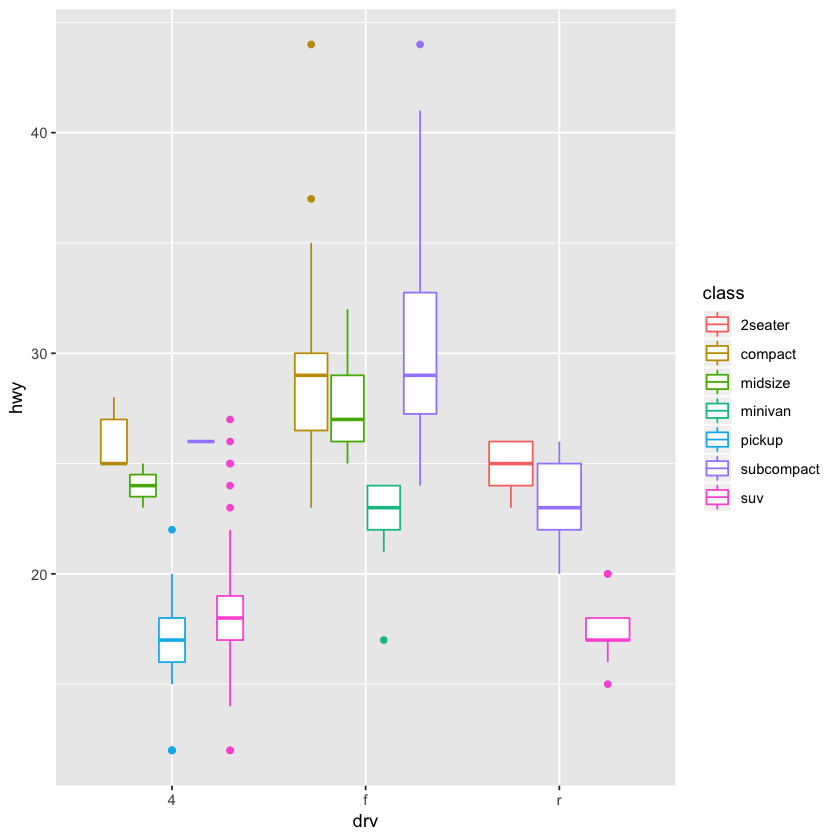

In [178]:
ggplot(data = mpg, aes(x = drv, y = hwy, colour = class)) +
  geom_boxplot()

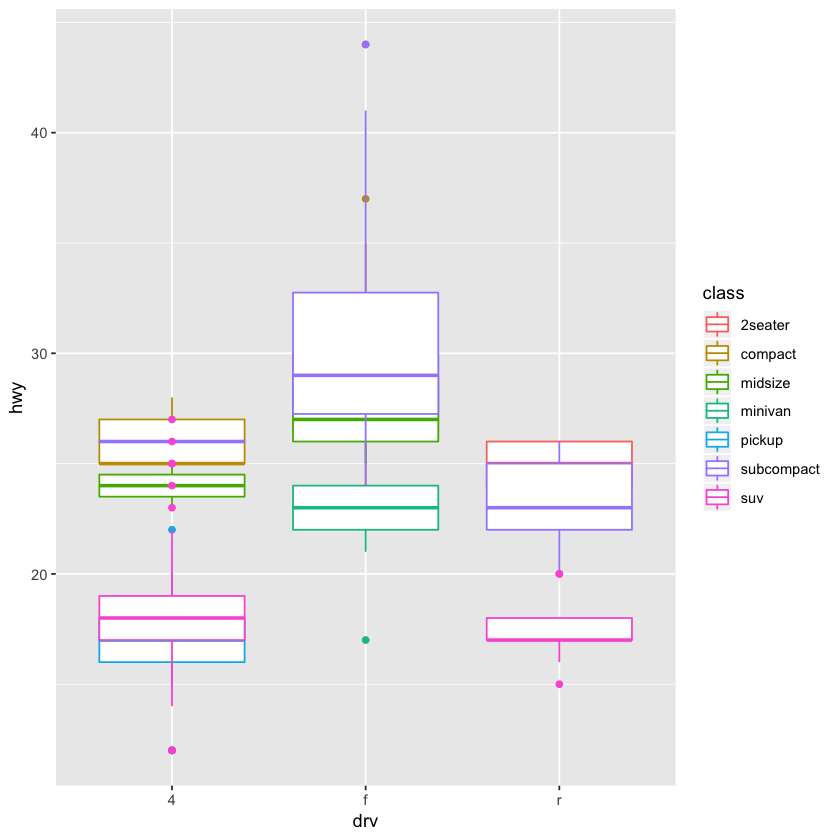

In [179]:
ggplot(data = mpg, aes(x = drv, y = hwy, colour = class)) +
  geom_boxplot(position = "identity")

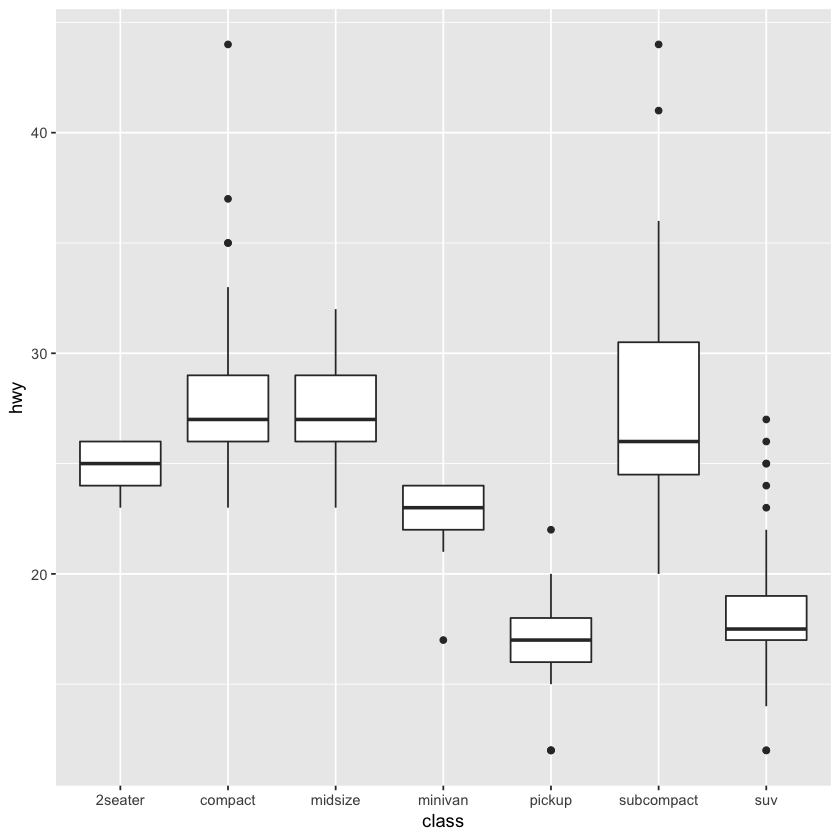

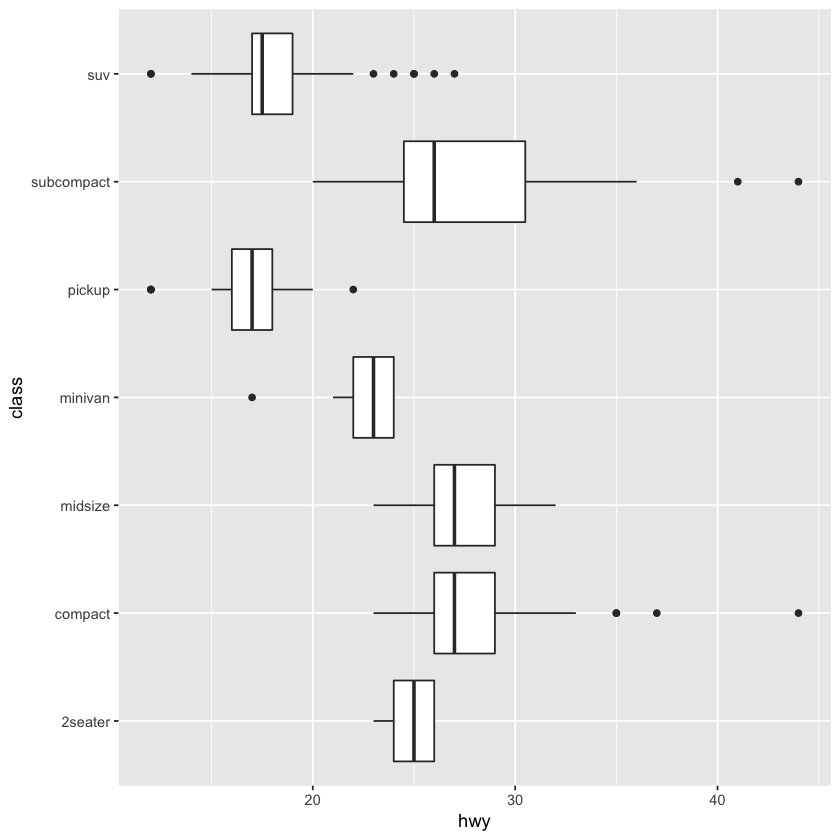

In [180]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot()
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot() +
  coord_flip()


Attaching package: ‘maps’

The following object is masked from ‘package:purrr’:

    map



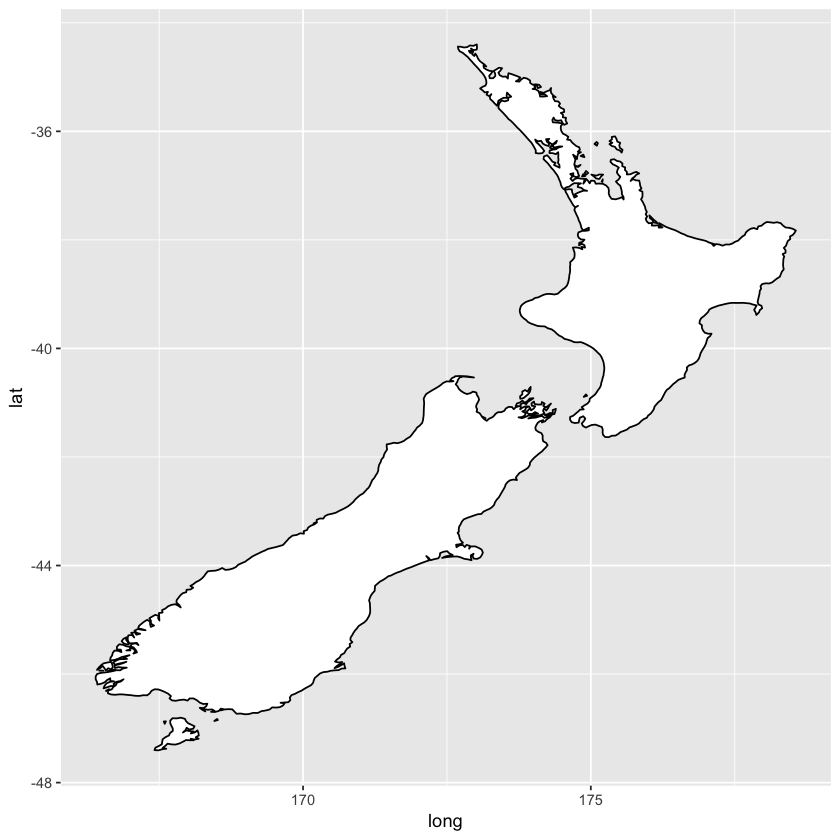

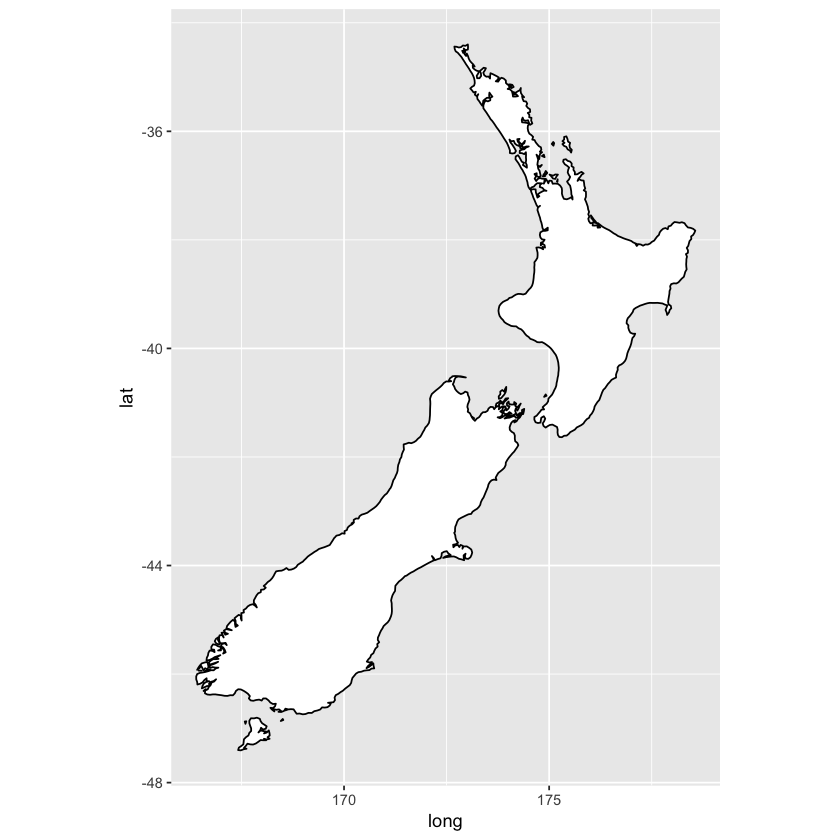

In [181]:
nz <- map_data("nz")

ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(fill = "white", colour = "black")

ggplot(nz, aes(long, lat, group = group)) +
  geom_polygon(fill = "white", colour = "black") +
  coord_quickmap()

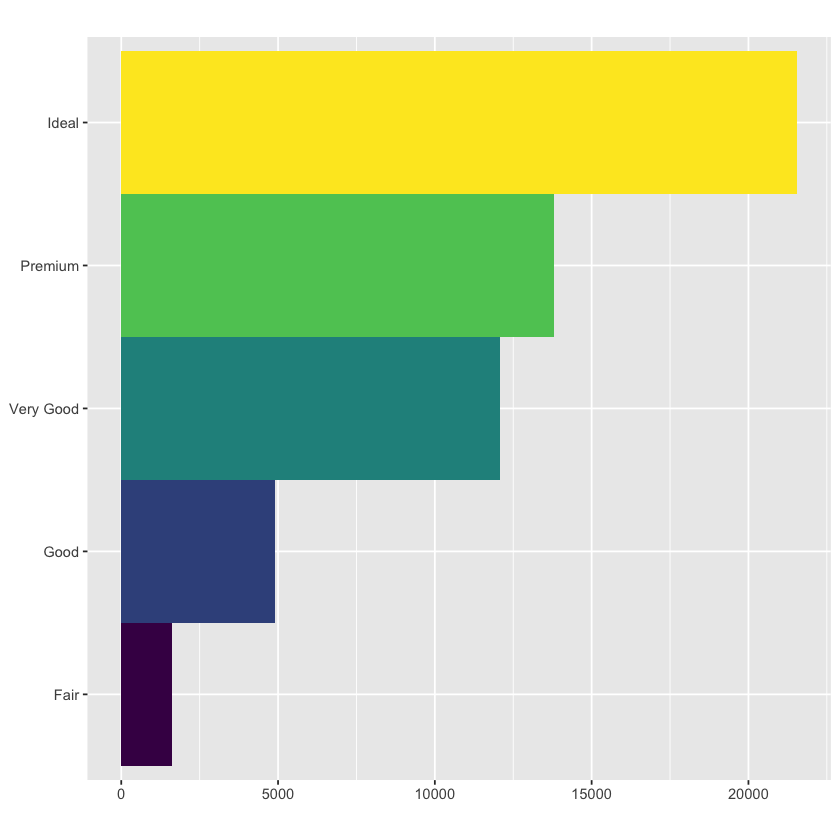

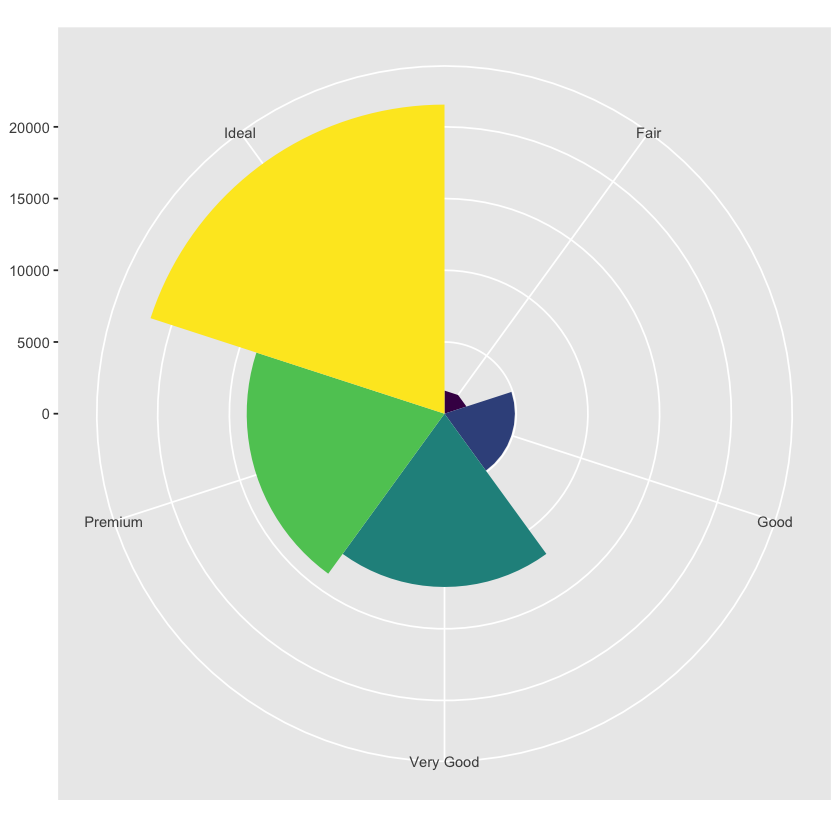

In [186]:
bar <- ggplot(data = diamonds) + 
  geom_bar(
    mapping = aes(x = cut, fill = cut), 
    show.legend = FALSE,
    width = 1
  ) + 
  theme(aspect.ratio = 1) +
  labs(x = NULL, y = NULL)

bar + coord_flip()
bar + coord_polar()

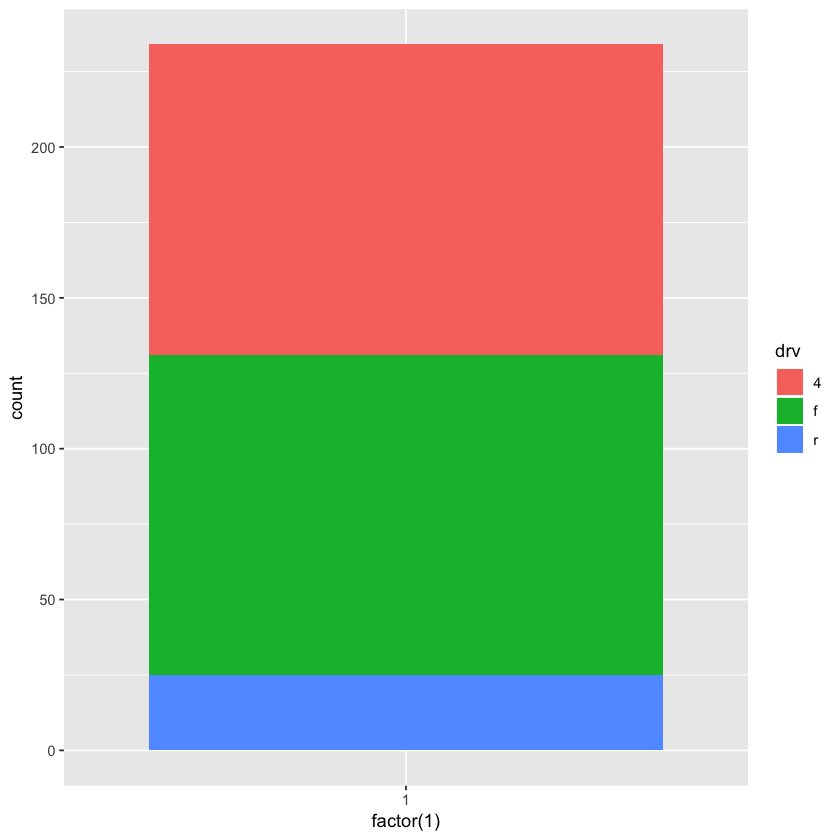

In [183]:
ggplot(mpg, aes(x = factor(1), fill = drv)) +
  geom_bar()

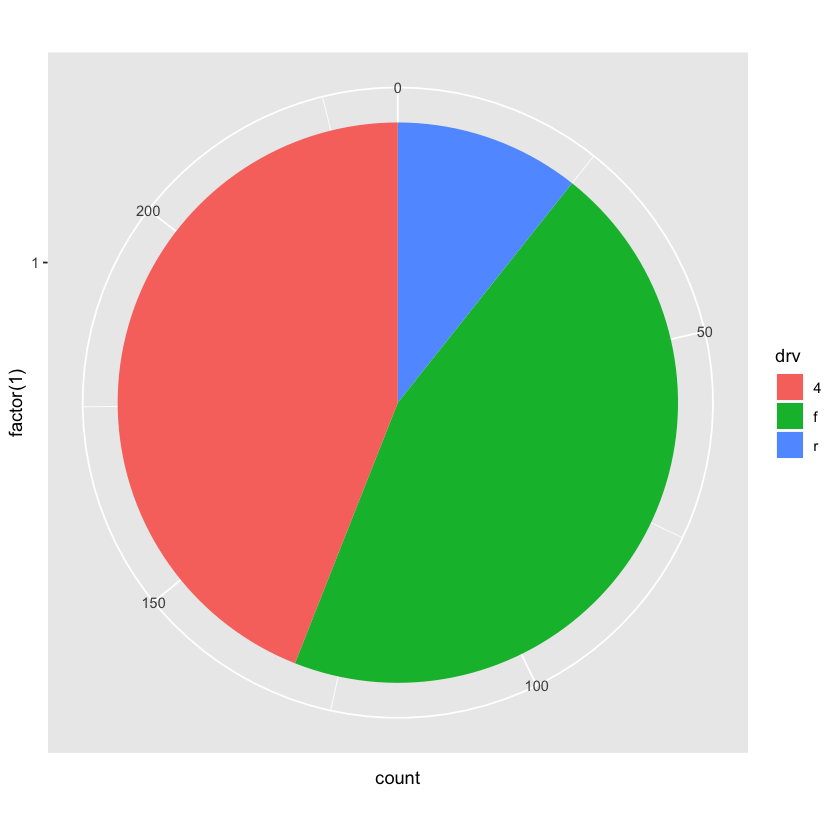

In [188]:
ggplot(mpg, aes(x = factor(1), fill = drv)) +
  geom_bar(width = 1) +
  coord_polar(theta = "y")

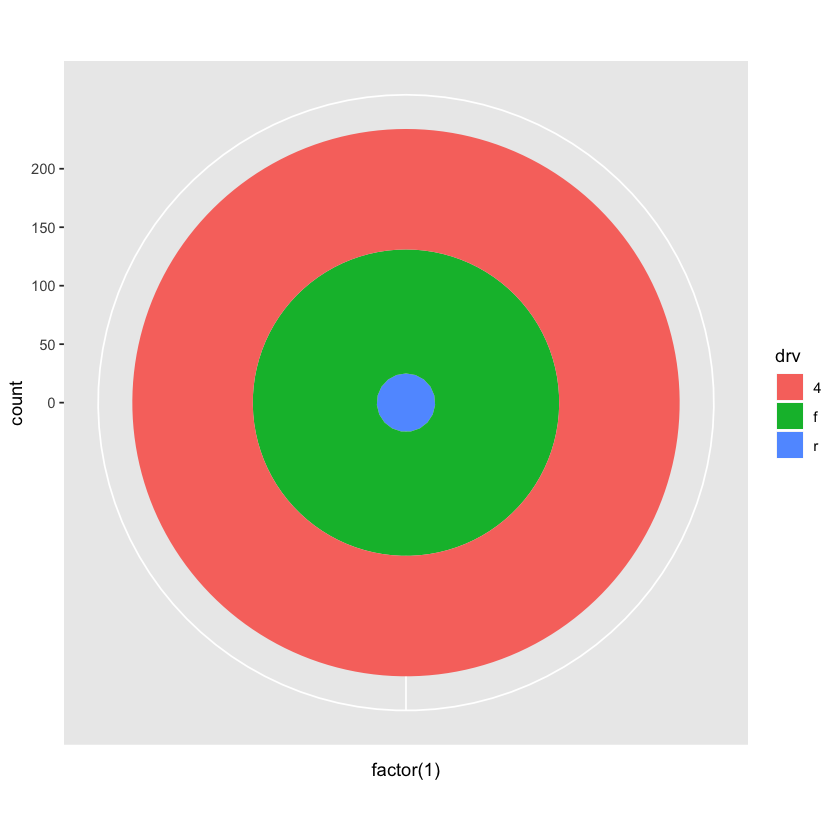

In [189]:
ggplot(mpg, aes(x = factor(1), fill = drv)) +
  geom_bar(width = 1) +
  coord_polar()

In [190]:
?labs()

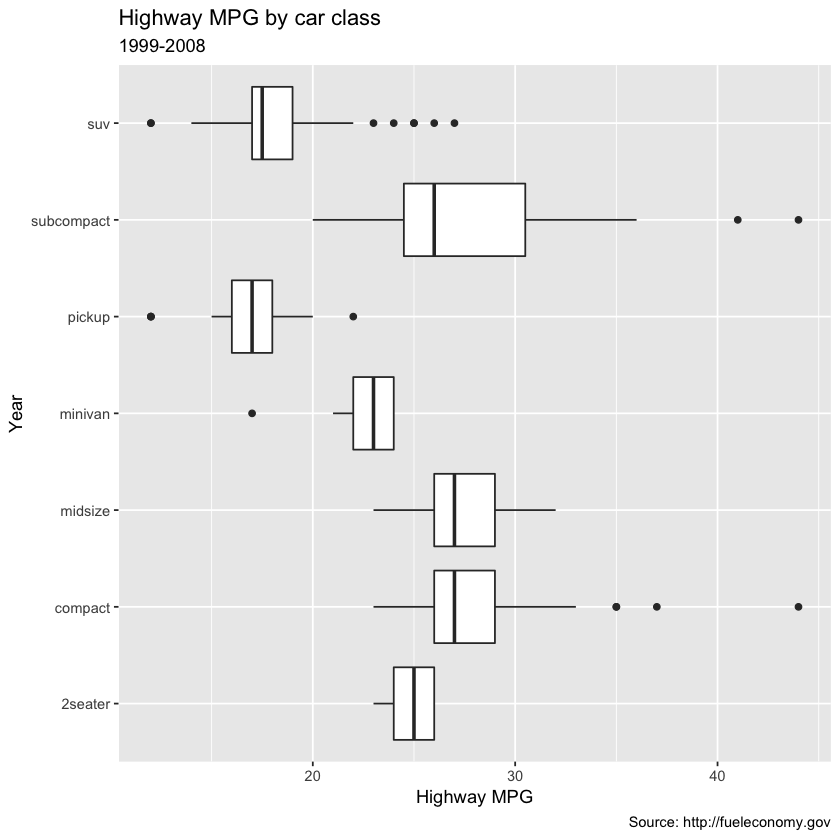

In [191]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot() +
  coord_flip() +
  labs(
    y = "Highway MPG",
    x = "Year",
    title = "Highway MPG by car class",
    subtitle = "1999-2008",
    caption = "Source: http://fueleconomy.gov"
  )

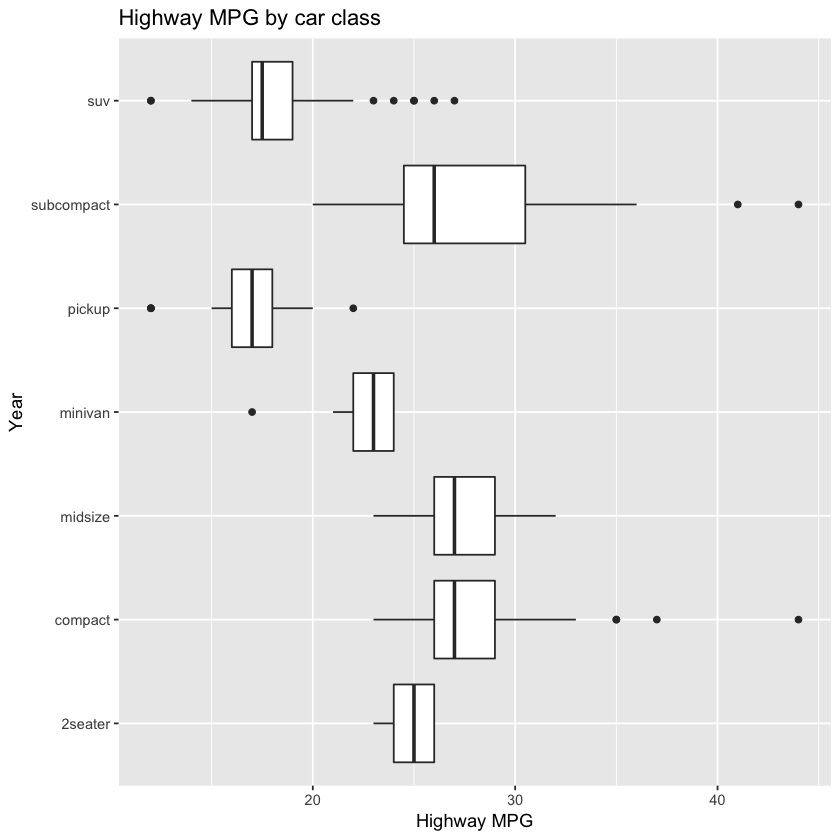

In [192]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot() +
  coord_flip() +
  labs(
    y = "Highway MPG",
    x = "Year",
    title = "Highway MPG by car class"
  )

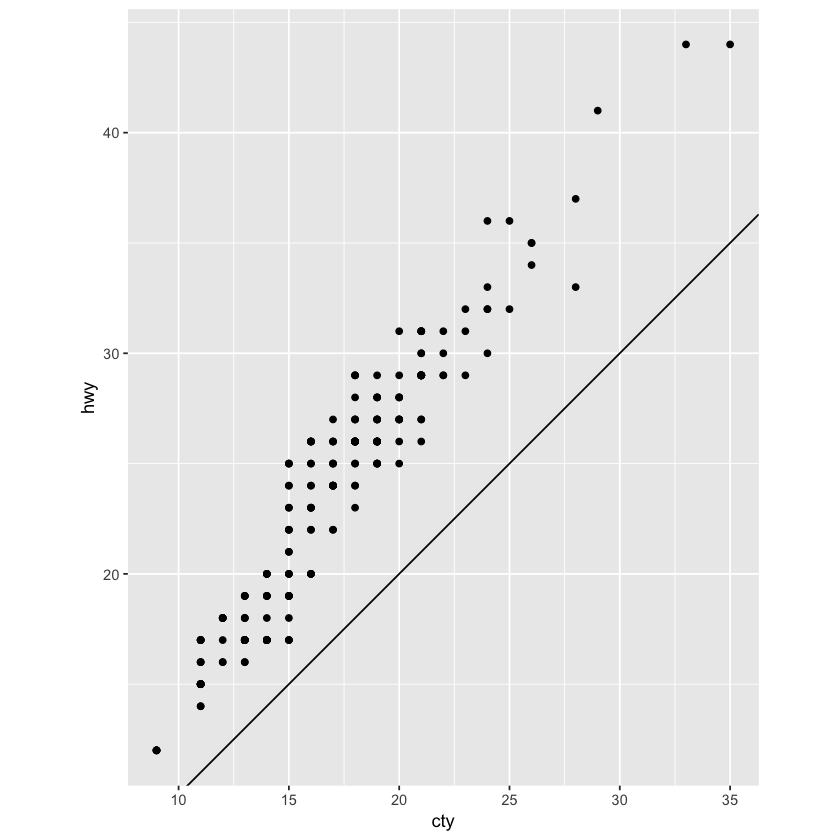

In [193]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point() + 
  geom_abline() +
  coord_fixed()

In [194]:
?coord_fixed

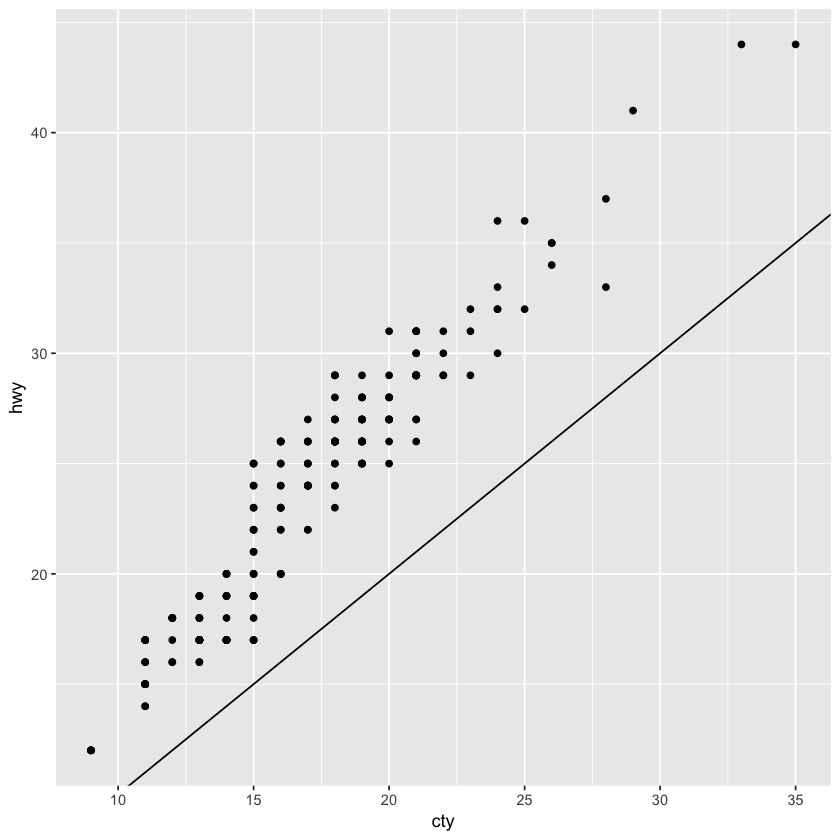

In [196]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy)) +
  geom_point() + 
  geom_abline()

Cleveland, William S. 1993a. “A Model for Studying Display Methods of Statistical Graphics.” Journal of Computational and Graphical Statistics 2 (4). Taylor & Francis: 323–43. https://doi.org/10.1080/10618600.1993.10474616.

Cleveland, William S. 1993b. Visualizing Information. Hobart Press.

Cleveland, William S. 1994. The Elements of Graphing Data. Hobart Press.

Cleveland, William S., Marylyn E. McGill, and Robert McGill. 1988. “The Shape Parameter of a Two-Variable Graph.” Journal of the American Statistical Association 83 (402). [American Statistical Association, Taylor & Francis, Ltd.]: 289–300. https://www.jstor.org/stable/2288843.

Heer, Jeffrey, and Maneesh Agrawala. 2006. “Multi-Scale Banking to 45º.” Ieee Transactions on Visualization and Computer Graphics 12 (5, September/October). https://doi.org/10.1109/TVCG.2006.163.

3.10 The layered grammar of graphics

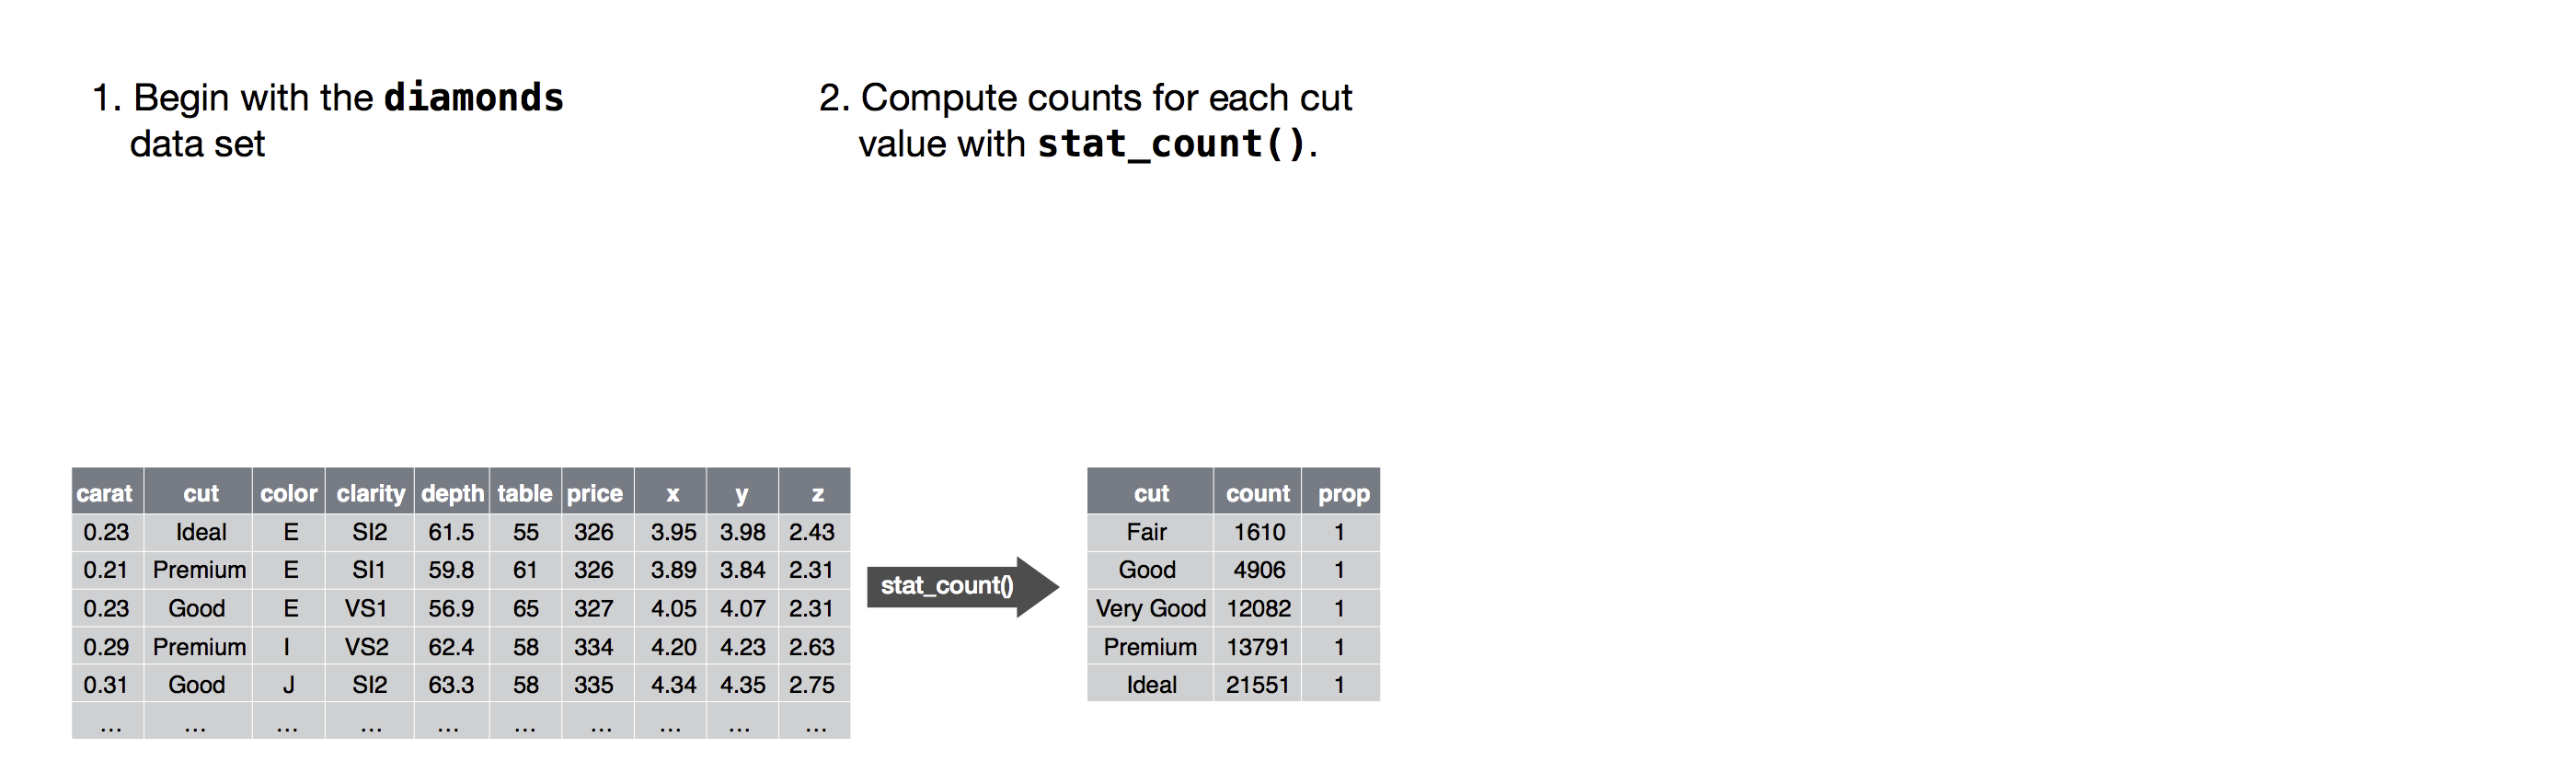

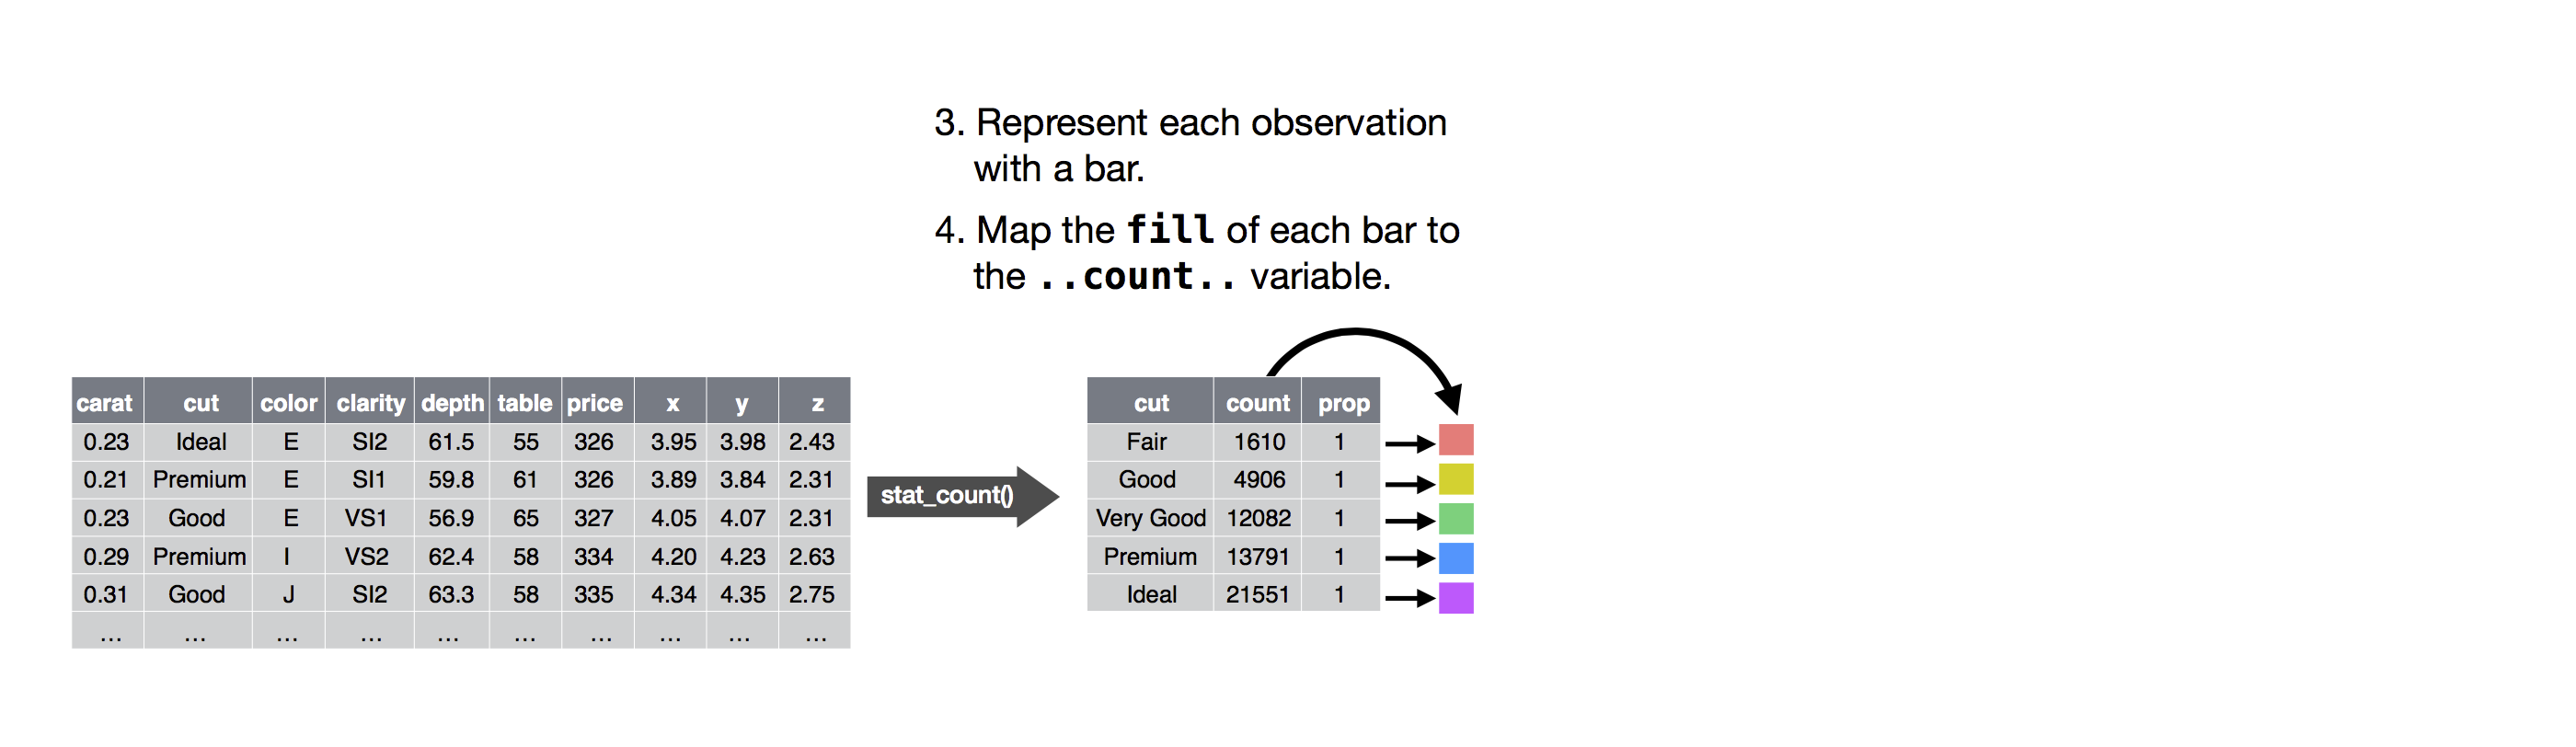

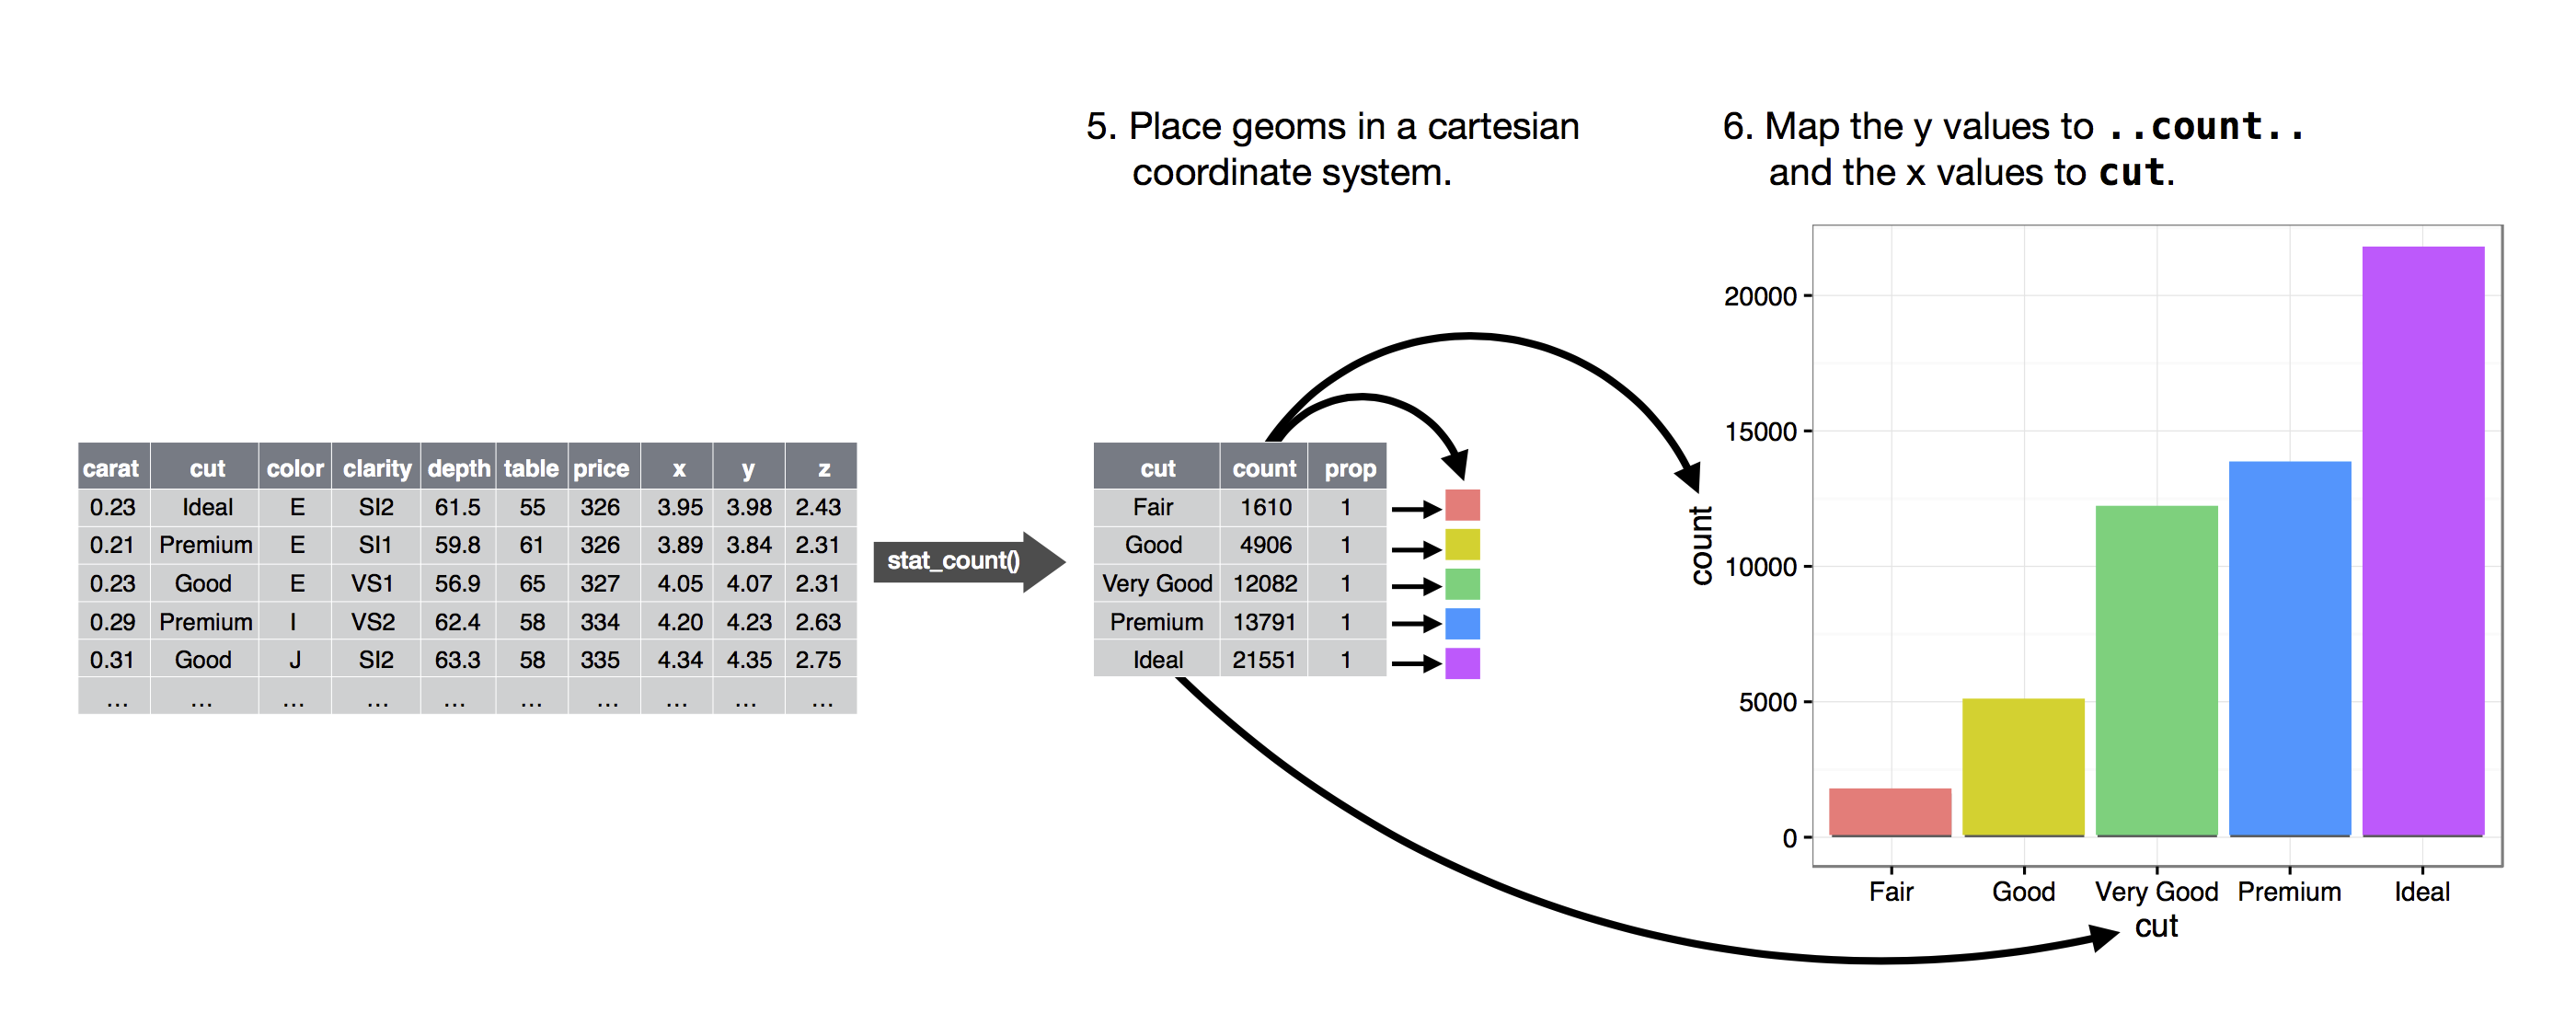